In [243]:
# Import all necessary libraries for the project
import spacy
import pandas as pd
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
from spacy.pipeline import TextCategorizer
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from spacy.tokens import DocBin

# Set the color palette to pink
pink_palette = sns.light_palette("pink", as_cmap=True)

In [244]:
# Load the main .csv file containing the data
df1 = pd.read_csv(r"C:\Users\Anna\Desktop\1 term 2 year\Womens Clothing E-Commerce Reviews.csv")

In [245]:
# Inspect the structure and the first entries of the dataframe
df1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [246]:
# Information about the number, data types and names of columns, missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [247]:
# Unique values in each column
df1.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [248]:
# Number of missing values per column
df1.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [249]:
# Drop columns that are not needed for the project
df1 = df1.drop(columns=['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Positive Feedback Count', 'Division Name',
                 'Department Name', 'Positive Feedback Count', 'Class Name'])

In [250]:
# Delete rows with missing review texts
df1 = df1.dropna(subset=['Review Text'])

In [251]:
# Check that there are no missing values in the dataframe left
df1.isnull().sum()

Review Text        0
Rating             0
Recommended IND    0
dtype: int64

In [252]:
# Rename columns for easier use
df1 = df1.rename(columns={'Review Text': 'text', 'Rating': 'rating', 'Recommended IND': 'recommend'})

In [253]:
# check that all changes have been implemented successfully
df1.head()

,text,rating,recommend
0,Absolutely wonderful - silky and sexy and comfortable,4,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1


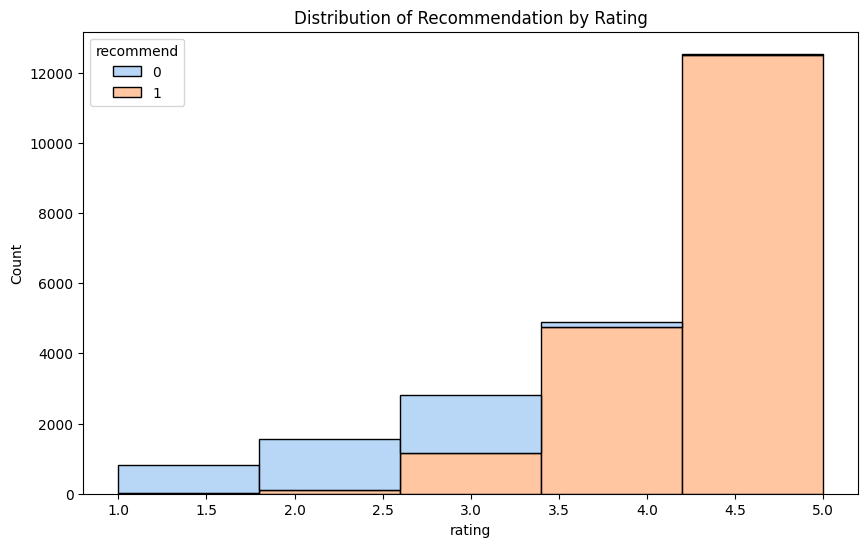

In [254]:
# Plot the distribution of recommendation by rating
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='rating', hue='recommend', multiple='stack', bins=5)
plt.title('Distribution of Recommendation by Rating')
plt.savefig('dist_rec_rating.png', bbox_inches='tight')
plt.show()

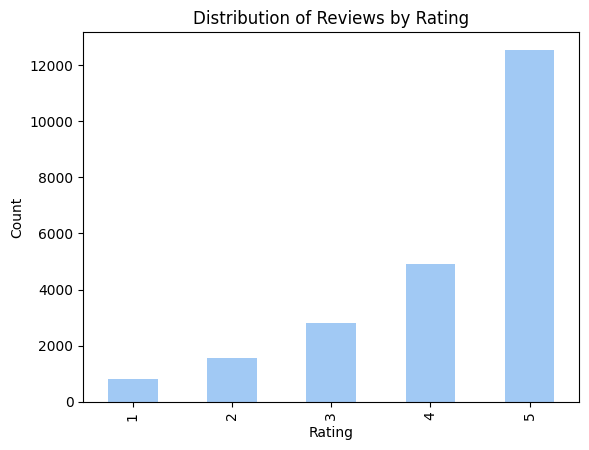

In [256]:
# Visualise distribution of reviews by rating
reviews_by_rating_plot = df1.rating.value_counts().sort_index(ascending=True).plot(kind='bar', title='Distribution of Reviews by Rating',
                                                               xlabel='Rating', ylabel='Count').get_figure().savefig('rating_valuecounts.png')


In [14]:
# Create a new column that will be the target variable for supervised algorithms and call it 'sentiment'
df1['sentiment'] = 0

# If the rating is 4 or 5, the sentiment is positive (1),
# if the rating is 3 and recommend is 1, the sentiment is positive (1),
# in all other cases the sentiment is negative (0)
df1.loc[(df1['rating'].isin([4, 5])) | ((df1['rating'] == 3) & (df1['recommend'] == 1)), 'sentiment'] = 1

In [15]:
# Drop the 'rating' and 'recommend' coulmn, as their essence has been distilled into 'sentiment'
df1 = df1.drop(columns=['rating', 'recommend'])

# Ensure that all changes were implemented correctly
df1.head()

,text,sentiment
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [16]:
# See the updated sentiment distribution
sentiment_counts = df1['sentiment'].value_counts()
sentiment_counts

1    18618
0     4023
Name: sentiment, dtype: int64

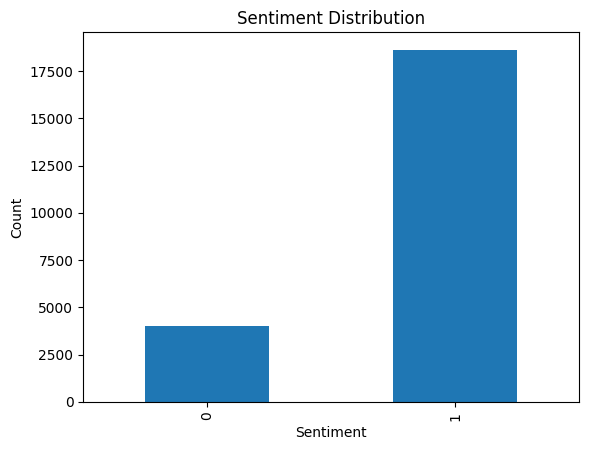

In [17]:
# Visualise the updated sentiment distribution
sentiment_distribution_plot = sentiment_counts.sort_index(ascending=True).plot(kind='bar', title='Sentiment Distribution',
                                        xlabel='Sentiment', ylabel='Count')

In [156]:
# Load extra reviews with negative sentiment from Amazon Clothing Reviews
# Specify the path to the file
file_path = r"C:\Users\Anna\Downloads\Clothing.txt"

# Initialize empty lists to store data
scores = []
texts = []

# Read the file line by line
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize empty dictionary to store information about the current entry that is being processed
current_entry = {}
# Counter for the number of entries
entry_count = 0
for line in lines:
    # Strip the line from whitespaces in the beginning and at the end
    line = line.strip()
    # Check that the line is not empty
    if line:
        # Parse the line and add it to the dictionary
        key, value = line.split(': ', 1)
        current_entry[key] = value
    else:
        # Process the current entry when encountering an empty line that signifies the end of that entry
        score = current_entry.get('review/score', '')
        # Check if the score is 1.0 or 2.0, i.e. the sentiment is negative
        if score in ('1.0', '2.0'):
            # Append the sentiment and the review text to the respective lists
            scores.append(0)
            texts.append(current_entry.get('review/text', ''))
            # Increment the counter
            entry_count += 1

        # Break the loop when the necessary number of entries is reached
        if entry_count >= 48595:
            break

# Create a dataframe from the lists
df2 = pd.DataFrame({'sentiment': scores, 'text': texts})

# Display the dataframe
df2.head()

,sentiment,text
0,0,"These pants were way too big (looked about 2 sizes larger), and they were incredibly stiff. They would have been very uncomfortable for my daughter to wear all day."
1,0,"I have bought dockers for years but these are cut smaller than they usually are. Even with the ""stretch"" waist band they are tight. So much for an ""extra"" inch. Beware. Try these in a store before you buy."
2,0,"I DID NOT GET THE SLACK THAT HAD THE WAISTBAND. I GOT SLACK WITH NO WAISTBAND, SO I SEND THEM BACK AN WAS TRYING TO GE A 42 29 BUT I RECEIVED A E MAIL STATETING THAT THE PRODUCT WAS NO LONGER AVABILITY. SO FAR I'AM NOT SURE WERE MY REFUND WENT. PLEASE LET ME KNOW.TOM ATKINSON"
3,0,"I agree, these are cut small... Buy an inch or two larger than you normally do. The waist band does NOT stretch."
4,0,"I got the shippment quickly. But wrong items was sent. I have to return it to the seller. I got the refund pretty quick, but only for the value of product. I spent about &10 for two way shipping without geting anything."


In [157]:
# Check for duplicates in the dataframes 
common_entries_df1 = df1[df1['text'].isin(df2['text'])]
common_entries_df2 = df2[df2['text'].isin(df1['text'])]

common_entries_df1
common_entries_df2

,sentiment,text


In [158]:
# For transparency, create a column that would indicate which dataframe the entry was originally from
df1['dataset'] = 'Womens Clothing E-Commerce'
df2['dataset'] = 'Amazon Clothing'

In [159]:
# Ensure that all changes were implemented correctly
df1.head()

,text,sentiment,dataset
0,Absolutely wonderful - silky and sexy and comfortable,1,Womens Clothing E-Commerce
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1,Womens Clothing E-Commerce
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0,Womens Clothing E-Commerce
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1,Womens Clothing E-Commerce
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1,Womens Clothing E-Commerce


In [160]:
# Ensure that all changes were implemented correctly
df2.head()

,sentiment,text,dataset
0,0,"These pants were way too big (looked about 2 sizes larger), and they were incredibly stiff. They would have been very uncomfortable for my daughter to wear all day.",Amazon Clothing
1,0,"I have bought dockers for years but these are cut smaller than they usually are. Even with the ""stretch"" waist band they are tight. So much for an ""extra"" inch. Beware. Try these in a store before you buy.",Amazon Clothing
2,0,"I DID NOT GET THE SLACK THAT HAD THE WAISTBAND. I GOT SLACK WITH NO WAISTBAND, SO I SEND THEM BACK AN WAS TRYING TO GE A 42 29 BUT I RECEIVED A E MAIL STATETING THAT THE PRODUCT WAS NO LONGER AVABILITY. SO FAR I'AM NOT SURE WERE MY REFUND WENT. PLEASE LET ME KNOW.TOM ATKINSON",Amazon Clothing
3,0,"I agree, these are cut small... Buy an inch or two larger than you normally do. The waist band does NOT stretch.",Amazon Clothing
4,0,"I got the shippment quickly. But wrong items was sent. I have to return it to the seller. I got the refund pretty quick, but only for the value of product. I spent about &10 for two way shipping without geting anything.",Amazon Clothing


In [161]:
# Concatenate the dataframes
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       71236 non-null  object
 1   sentiment  71236 non-null  int64 
 2   dataset    71236 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [162]:
# Shuffle the entries of a dataset (otherwise Amazon Clothing would be at the end) 
df = df.sample(frac=1).reset_index(drop=True)

In [163]:
# Check the number of unique entries in the constructed dataframe
df.nunique()

text         37422
sentiment        2
dataset          2
dtype: int64

In [164]:
# Check the total number of entries
''' It turns out that the Amazon Clothing dataset contains a significant number of duplicates, so I will alter the 
code above to gather more entries than planned initially to have enough unique negative reviews to balance the classes '''
df.shape

(71236, 3)

In [165]:
# Drop duplicates from the dataframe and see the total number of entries
df = df.drop_duplicates()
df.shape

(37422, 3)

In [166]:
# Check the target feature balance
sentiment_counts_main = df['sentiment'].value_counts()
sentiment_counts_main

0    18810
1    18612
Name: sentiment, dtype: int64

In [167]:
# Load SpaCy's pipeline for English
nlp = spacy.load('en_core_web_lg')

'''
Remove stopwords and non-alphanumeric characters, lemmatize the tokens, add tqdm progress bar
IN: text in string format
OUT: string of processed tokens
''' 
def spacy_preprocess_with_progress(text):
    # Create a doc object
    doc = nlp(text)
    # Keep alphanumeric tokens and remove stopwords
    processed_tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    # Join the tokens with spaces
    return ' '.join(processed_tokens)

tqdm.pandas(desc="Processing text")
# Process the 'text' column of the dataframe and store the result in the 'processed_text' column
df['processed_text'] = df['text'].progress_apply(spacy_preprocess_with_progress)

Processing text: 100%|███████████████████████████████████████████████████████████| 37422/37422 [09:29<00:00, 65.74it/s]


In [170]:
# Split the 'processed_text' and 'sentiment' columns into train and test sets: 90% train, 10% test 
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['sentiment'], test_size=0.1, random_state=16)

In [171]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()
# Train the vectorizer on the training data
X_train_vectorized = vectorizer.fit_transform(X_train)
# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

In [172]:
#Implement logistic regression
logreg = LogisticRegression(random_state=16).fit(X_train_vectorized, y_train)
# Obtain predictions on the test set
predictions_logreg = logreg.predict(X_test_vectorized)

In [173]:
# Check the accuracy of logistic regression
accuracy_logreg = accuracy_score(y_test, predictions_logreg)
print(f'Accuracy: {accuracy_logreg:.2f}')

# See the classification report for logistic regression
report_logreg = classification_report(y_test, predictions_logreg)
print(report_logreg)

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1889
           1       0.91      0.93      0.92      1854

    accuracy                           0.92      3743
   macro avg       0.92      0.92      0.92      3743
weighted avg       0.92      0.92      0.92      3743



In [174]:
# See the confusion matrix for logistic regression
cm_logreg = confusion_matrix(y_test, predictions_logreg)
print(cm_logreg)

[[1717  172]
 [ 132 1722]]


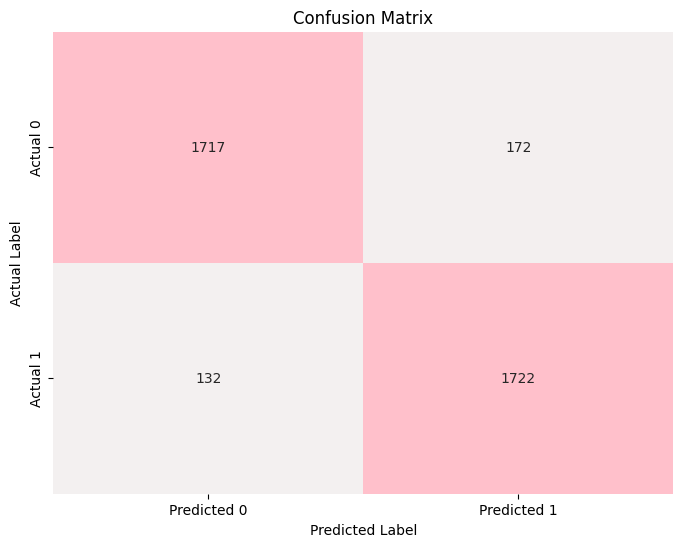

In [175]:

# Convert confusion matrix to a DataFrame for easier plotting
cm_logreg_df = pd.DataFrame(cm_logreg, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_df, annot=True, fmt='d', cmap=pink_palette, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('confusion_matrix_logreg.png', bbox_inches='tight')
plt.show()

In [176]:
# The number of coefficients of the logistic regression corresponds to the number of features, 
# i.e. unique words that were vectorised
logreg_coef = logreg.coef_
logreg_coef.shape

(1, 20908)

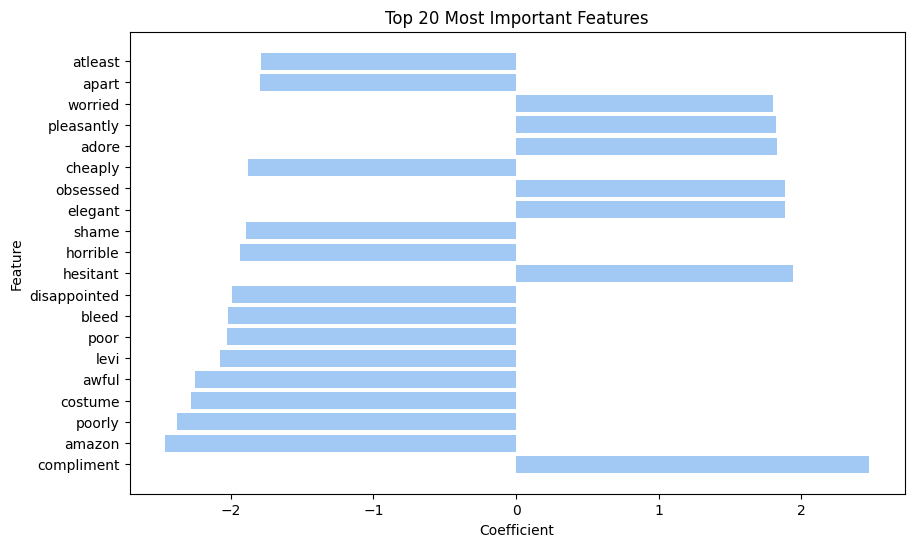

In [177]:
# Get feature names from CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Extract coefficients from logistic regression
logreg_coef = logreg.coef_[0]

# Create a dataframe to associate feature names with their coefficients
logreg_fi = pd.DataFrame({'Feature': feature_names, 'Coefficient': logreg_coef})

# Sort the dataframe by the absolute values of coefficients in descending order
logreg_fi = logreg_fi.sort_values(by=['Coefficient'], key=lambda x: abs(x), ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(10, 6))
plt.barh(logreg_fi['Feature'][:20], logreg_fi['Coefficient'][:20])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.savefig('features_logreg.png', bbox_inches='tight')
plt.show()

In [178]:
# Implement Naive Bayes classifier
nb = MultinomialNB().fit(X_train_vectorized, y_train)
# Obtain predictions on the test set
predictions_nb = nb.predict(X_test_vectorized)

In [179]:
# Check the accuracy of Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, predictions_nb)
print(f'Accuracy: {accuracy_nb:.2f}')

# See the classification report for Naive Bayes classifier
report_nb = classification_report(y_test, predictions_nb)
print(report_nb)

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.96      0.80      0.88      1889
           1       0.83      0.97      0.89      1854

    accuracy                           0.88      3743
   macro avg       0.89      0.89      0.88      3743
weighted avg       0.90      0.88      0.88      3743



In [180]:
# See the confusion matrix for Naive Bayes classifier
cm_nb = confusion_matrix(y_test, predictions_nb)
print(cm_nb)

[[1516  373]
 [  60 1794]]


In [181]:
# Create a dataframe with feature names and their probabilities for the positive class
# Exponentiate to get probabilities from logarithms
nb_fi_positive = pd.DataFrame({'Feature': feature_names, 'Prob_class_1': np.exp(nb.feature_log_prob_[1])})

# Sort the dataframe by probability in descending order
nb_fi_positive = nb_fi_positive.sort_values(by=['Prob_class_1'], ascending=False)
# See the first 20 entries
print(nb_fi_positive[:20])

           Feature  Prob_class_1
5478         dress      0.021139
6846           fit      0.019876
10591         love      0.018996
20175         wear      0.018600
16460         size      0.018485
10517         look      0.014414
3415         color      0.012604
10341         like      0.012374
7889         great      0.011749
16661        small      0.009205
12523        order      0.008423
2497           buy      0.007781
6467        fabric      0.007659
13177      perfect      0.007514
10430       little      0.007202
16815         soft      0.006579
6918    flattering      0.006408
3486   comfortable      0.006073
10502         long      0.005984
18918          try      0.005961


In [182]:
# Create a dataFrame with feature names and their probabilities for the negative class
nb_fi_negative = pd.DataFrame({'Feature': feature_names, 'Prob_class_0': np.exp(nb.feature_log_prob_[0])})

# Sort the dataframe by probability in descending order
nb_fi_negative = nb_fi_negative.sort_values(by=['Prob_class_0'], ascending=False)
# See the first 20 entries
print(nb_fi_negative[:20])

        Feature  Prob_class_0
10341      like      0.013001
10517      look      0.012975
16460      size      0.011751
20175      wear      0.010851
2497        buy      0.010679
6846        fit      0.010014
12523     order      0.009474
16661     small      0.006952
16176     shirt      0.006921
15110    return      0.006921
13994   product      0.006353
14292   quality      0.005878
18918       try      0.005247
7760       good      0.005245
18510      time      0.005188
18352     think      0.005173
5478      dress      0.005093
2126        bra      0.004852
7581        get      0.004770
14215  purchase      0.004711


In [183]:
# Implement gradient boosting on decision trees
model_cb = CatBoostClassifier(random_state=16)

# Create a grid for random search specifying intervals for learning rate and tree depth
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 8, 10, 12]}

# Initialize randomized search
randomized_search_result = model_cb.randomized_search(grid,
                                                   X=X_train_vectorized,
                                                   y=y_train,
                                                   partition_random_seed=0
                                                   )



0:	learn: 0.6836729	test: 0.6833332	best: 0.6833332 (0)	total: 129ms	remaining: 2m 8s
1:	learn: 0.6745323	test: 0.6739889	best: 0.6739889 (1)	total: 224ms	remaining: 1m 51s
2:	learn: 0.6663044	test: 0.6656552	best: 0.6656552 (2)	total: 305ms	remaining: 1m 41s
3:	learn: 0.6587384	test: 0.6579675	best: 0.6579675 (3)	total: 357ms	remaining: 1m 28s
4:	learn: 0.6509610	test: 0.6499479	best: 0.6499479 (4)	total: 457ms	remaining: 1m 30s
5:	learn: 0.6437750	test: 0.6426042	best: 0.6426042 (5)	total: 539ms	remaining: 1m 29s
6:	learn: 0.6359517	test: 0.6345357	best: 0.6345357 (6)	total: 633ms	remaining: 1m 29s
7:	learn: 0.6295526	test: 0.6278514	best: 0.6278514 (7)	total: 732ms	remaining: 1m 30s
8:	learn: 0.6235709	test: 0.6215958	best: 0.6215958 (8)	total: 806ms	remaining: 1m 28s
9:	learn: 0.6180780	test: 0.6158857	best: 0.6158857 (9)	total: 871ms	remaining: 1m 26s
10:	learn: 0.6116222	test: 0.6092818	best: 0.6092818 (10)	total: 940ms	remaining: 1m 24s
11:	learn: 0.6065978	test: 0.6041261	best:

95:	learn: 0.4310851	test: 0.4250193	best: 0.4250193 (95)	total: 7.29s	remaining: 1m 8s
96:	learn: 0.4301251	test: 0.4240256	best: 0.4240256 (96)	total: 7.37s	remaining: 1m 8s
97:	learn: 0.4292539	test: 0.4230611	best: 0.4230611 (97)	total: 7.45s	remaining: 1m 8s
98:	learn: 0.4282988	test: 0.4221294	best: 0.4221294 (98)	total: 7.51s	remaining: 1m 8s
99:	learn: 0.4274382	test: 0.4213287	best: 0.4213287 (99)	total: 7.58s	remaining: 1m 8s
100:	learn: 0.4265608	test: 0.4205259	best: 0.4205259 (100)	total: 7.64s	remaining: 1m 8s
101:	learn: 0.4255430	test: 0.4194870	best: 0.4194870 (101)	total: 7.71s	remaining: 1m 7s
102:	learn: 0.4246914	test: 0.4186916	best: 0.4186916 (102)	total: 7.79s	remaining: 1m 7s
103:	learn: 0.4238927	test: 0.4178533	best: 0.4178533 (103)	total: 7.86s	remaining: 1m 7s
104:	learn: 0.4229415	test: 0.4168886	best: 0.4168886 (104)	total: 7.92s	remaining: 1m 7s
105:	learn: 0.4221780	test: 0.4160876	best: 0.4160876 (105)	total: 7.97s	remaining: 1m 7s
106:	learn: 0.421474

187:	learn: 0.3713126	test: 0.3651457	best: 0.3651457 (187)	total: 13.3s	remaining: 57.6s
188:	learn: 0.3708143	test: 0.3646238	best: 0.3646238 (188)	total: 13.4s	remaining: 57.4s
189:	learn: 0.3704092	test: 0.3642275	best: 0.3642275 (189)	total: 13.4s	remaining: 57.3s
190:	learn: 0.3700076	test: 0.3638457	best: 0.3638457 (190)	total: 13.5s	remaining: 57.2s
191:	learn: 0.3695400	test: 0.3634082	best: 0.3634082 (191)	total: 13.6s	remaining: 57.1s
192:	learn: 0.3688519	test: 0.3626864	best: 0.3626864 (192)	total: 13.6s	remaining: 57.1s
193:	learn: 0.3684116	test: 0.3622620	best: 0.3622620 (193)	total: 13.7s	remaining: 57s
194:	learn: 0.3680296	test: 0.3618298	best: 0.3618298 (194)	total: 13.8s	remaining: 56.8s
195:	learn: 0.3676260	test: 0.3614775	best: 0.3614775 (195)	total: 13.8s	remaining: 56.7s
196:	learn: 0.3670322	test: 0.3609166	best: 0.3609166 (196)	total: 13.9s	remaining: 56.6s
197:	learn: 0.3666498	test: 0.3606159	best: 0.3606159 (197)	total: 14s	remaining: 56.6s
198:	learn: 0.

280:	learn: 0.3383758	test: 0.3334308	best: 0.3334308 (280)	total: 19.6s	remaining: 50.1s
281:	learn: 0.3381606	test: 0.3332320	best: 0.3332320 (281)	total: 19.6s	remaining: 50s
282:	learn: 0.3377406	test: 0.3328012	best: 0.3328012 (282)	total: 19.7s	remaining: 49.9s
283:	learn: 0.3374932	test: 0.3325932	best: 0.3325932 (283)	total: 19.7s	remaining: 49.8s
284:	learn: 0.3372553	test: 0.3323338	best: 0.3323338 (284)	total: 19.8s	remaining: 49.6s
285:	learn: 0.3369981	test: 0.3320244	best: 0.3320244 (285)	total: 19.9s	remaining: 49.6s
286:	learn: 0.3367614	test: 0.3317923	best: 0.3317923 (286)	total: 19.9s	remaining: 49.4s
287:	learn: 0.3364380	test: 0.3314323	best: 0.3314323 (287)	total: 20s	remaining: 49.3s
288:	learn: 0.3361168	test: 0.3311158	best: 0.3311158 (288)	total: 20s	remaining: 49.2s
289:	learn: 0.3358620	test: 0.3308529	best: 0.3308529 (289)	total: 20.1s	remaining: 49.1s
290:	learn: 0.3355938	test: 0.3305685	best: 0.3305685 (290)	total: 20.1s	remaining: 49s
291:	learn: 0.3352

372:	learn: 0.3161005	test: 0.3129778	best: 0.3129778 (372)	total: 25.5s	remaining: 42.9s
373:	learn: 0.3158883	test: 0.3127779	best: 0.3127779 (373)	total: 25.6s	remaining: 42.9s
374:	learn: 0.3156961	test: 0.3126232	best: 0.3126232 (374)	total: 25.7s	remaining: 42.8s
375:	learn: 0.3154669	test: 0.3124286	best: 0.3124286 (375)	total: 25.8s	remaining: 42.7s
376:	learn: 0.3152856	test: 0.3122854	best: 0.3122854 (376)	total: 25.8s	remaining: 42.7s
377:	learn: 0.3149720	test: 0.3119272	best: 0.3119272 (377)	total: 25.9s	remaining: 42.6s
378:	learn: 0.3147787	test: 0.3117438	best: 0.3117438 (378)	total: 25.9s	remaining: 42.5s
379:	learn: 0.3145917	test: 0.3115549	best: 0.3115549 (379)	total: 26s	remaining: 42.4s
380:	learn: 0.3144143	test: 0.3114238	best: 0.3114238 (380)	total: 26.1s	remaining: 42.4s
381:	learn: 0.3141932	test: 0.3112356	best: 0.3112356 (381)	total: 26.2s	remaining: 42.3s
382:	learn: 0.3140329	test: 0.3110802	best: 0.3110802 (382)	total: 26.3s	remaining: 42.3s
383:	learn: 

464:	learn: 0.2993130	test: 0.2982231	best: 0.2982231 (464)	total: 31.6s	remaining: 36.3s
465:	learn: 0.2991575	test: 0.2980766	best: 0.2980766 (465)	total: 31.7s	remaining: 36.3s
466:	learn: 0.2989794	test: 0.2979521	best: 0.2979521 (466)	total: 31.8s	remaining: 36.2s
467:	learn: 0.2988234	test: 0.2977967	best: 0.2977967 (467)	total: 31.8s	remaining: 36.2s
468:	learn: 0.2986519	test: 0.2976726	best: 0.2976726 (468)	total: 31.9s	remaining: 36.1s
469:	learn: 0.2985047	test: 0.2975679	best: 0.2975679 (469)	total: 31.9s	remaining: 36s
470:	learn: 0.2983542	test: 0.2974288	best: 0.2974288 (470)	total: 32s	remaining: 35.9s
471:	learn: 0.2981916	test: 0.2972634	best: 0.2972634 (471)	total: 32s	remaining: 35.8s
472:	learn: 0.2980293	test: 0.2971042	best: 0.2971042 (472)	total: 32.1s	remaining: 35.7s
473:	learn: 0.2978709	test: 0.2969491	best: 0.2969491 (473)	total: 32.1s	remaining: 35.7s
474:	learn: 0.2976818	test: 0.2967957	best: 0.2967957 (474)	total: 32.2s	remaining: 35.6s
475:	learn: 0.29

559:	learn: 0.2853150	test: 0.2863573	best: 0.2863573 (559)	total: 37.2s	remaining: 29.2s
560:	learn: 0.2851863	test: 0.2862453	best: 0.2862453 (560)	total: 37.2s	remaining: 29.1s
561:	learn: 0.2850504	test: 0.2861548	best: 0.2861548 (561)	total: 37.3s	remaining: 29.1s
562:	learn: 0.2849270	test: 0.2860815	best: 0.2860815 (562)	total: 37.3s	remaining: 29s
563:	learn: 0.2847869	test: 0.2859651	best: 0.2859651 (563)	total: 37.4s	remaining: 28.9s
564:	learn: 0.2846810	test: 0.2858742	best: 0.2858742 (564)	total: 37.5s	remaining: 28.9s
565:	learn: 0.2845433	test: 0.2857167	best: 0.2857167 (565)	total: 37.5s	remaining: 28.8s
566:	learn: 0.2844222	test: 0.2856380	best: 0.2856380 (566)	total: 37.6s	remaining: 28.7s
567:	learn: 0.2843013	test: 0.2855471	best: 0.2855471 (567)	total: 37.7s	remaining: 28.7s
568:	learn: 0.2841507	test: 0.2854320	best: 0.2854320 (568)	total: 37.8s	remaining: 28.6s
569:	learn: 0.2840262	test: 0.2853040	best: 0.2853040 (569)	total: 37.8s	remaining: 28.5s
570:	learn: 

653:	learn: 0.2738896	test: 0.2773922	best: 0.2773922 (653)	total: 43.1s	remaining: 22.8s
654:	learn: 0.2736830	test: 0.2772306	best: 0.2772306 (654)	total: 43.2s	remaining: 22.7s
655:	learn: 0.2735799	test: 0.2771842	best: 0.2771842 (655)	total: 43.2s	remaining: 22.7s
656:	learn: 0.2734507	test: 0.2770618	best: 0.2770618 (656)	total: 43.3s	remaining: 22.6s
657:	learn: 0.2733402	test: 0.2769845	best: 0.2769845 (657)	total: 43.3s	remaining: 22.5s
658:	learn: 0.2732415	test: 0.2769043	best: 0.2769043 (658)	total: 43.4s	remaining: 22.5s
659:	learn: 0.2731211	test: 0.2768504	best: 0.2768504 (659)	total: 43.5s	remaining: 22.4s
660:	learn: 0.2730198	test: 0.2767737	best: 0.2767737 (660)	total: 43.6s	remaining: 22.4s
661:	learn: 0.2729236	test: 0.2766980	best: 0.2766980 (661)	total: 43.6s	remaining: 22.3s
662:	learn: 0.2727906	test: 0.2766208	best: 0.2766208 (662)	total: 43.7s	remaining: 22.2s
663:	learn: 0.2726817	test: 0.2765636	best: 0.2765636 (663)	total: 43.8s	remaining: 22.1s
664:	learn

747:	learn: 0.2642490	test: 0.2700310	best: 0.2700310 (747)	total: 48.8s	remaining: 16.5s
748:	learn: 0.2641769	test: 0.2699839	best: 0.2699839 (748)	total: 48.9s	remaining: 16.4s
749:	learn: 0.2640973	test: 0.2699114	best: 0.2699114 (749)	total: 49s	remaining: 16.3s
750:	learn: 0.2640122	test: 0.2698424	best: 0.2698424 (750)	total: 49s	remaining: 16.3s
751:	learn: 0.2639012	test: 0.2697236	best: 0.2697236 (751)	total: 49.1s	remaining: 16.2s
752:	learn: 0.2637980	test: 0.2696277	best: 0.2696277 (752)	total: 49.2s	remaining: 16.1s
753:	learn: 0.2637010	test: 0.2695464	best: 0.2695464 (753)	total: 49.2s	remaining: 16.1s
754:	learn: 0.2636179	test: 0.2694802	best: 0.2694802 (754)	total: 49.3s	remaining: 16s
755:	learn: 0.2635114	test: 0.2693869	best: 0.2693869 (755)	total: 49.3s	remaining: 15.9s
756:	learn: 0.2634206	test: 0.2693190	best: 0.2693190 (756)	total: 49.4s	remaining: 15.9s
757:	learn: 0.2633216	test: 0.2692830	best: 0.2692830 (757)	total: 49.5s	remaining: 15.8s
758:	learn: 0.26

839:	learn: 0.2566055	test: 0.2642450	best: 0.2642450 (839)	total: 54.4s	remaining: 10.4s
840:	learn: 0.2565271	test: 0.2641871	best: 0.2641871 (840)	total: 54.4s	remaining: 10.3s
841:	learn: 0.2564436	test: 0.2640853	best: 0.2640853 (841)	total: 54.5s	remaining: 10.2s
842:	learn: 0.2563685	test: 0.2640525	best: 0.2640525 (842)	total: 54.6s	remaining: 10.2s
843:	learn: 0.2563074	test: 0.2640124	best: 0.2640124 (843)	total: 54.6s	remaining: 10.1s
844:	learn: 0.2562422	test: 0.2639671	best: 0.2639671 (844)	total: 54.7s	remaining: 10s
845:	learn: 0.2561658	test: 0.2638992	best: 0.2638992 (845)	total: 54.8s	remaining: 9.97s
846:	learn: 0.2560962	test: 0.2638581	best: 0.2638581 (846)	total: 54.8s	remaining: 9.9s
847:	learn: 0.2560712	test: 0.2638444	best: 0.2638444 (847)	total: 54.9s	remaining: 9.83s
848:	learn: 0.2560066	test: 0.2637876	best: 0.2637876 (848)	total: 54.9s	remaining: 9.77s
849:	learn: 0.2559299	test: 0.2637149	best: 0.2637149 (849)	total: 55s	remaining: 9.7s
850:	learn: 0.25

931:	learn: 0.2497414	test: 0.2592041	best: 0.2592041 (931)	total: 1m	remaining: 4.4s
932:	learn: 0.2496369	test: 0.2591181	best: 0.2591181 (932)	total: 1m	remaining: 4.33s
933:	learn: 0.2495522	test: 0.2590336	best: 0.2590336 (933)	total: 1m	remaining: 4.27s
934:	learn: 0.2495288	test: 0.2590306	best: 0.2590306 (934)	total: 1m	remaining: 4.21s
935:	learn: 0.2494512	test: 0.2589697	best: 0.2589697 (935)	total: 1m	remaining: 4.14s
936:	learn: 0.2493896	test: 0.2589327	best: 0.2589327 (936)	total: 1m	remaining: 4.08s
937:	learn: 0.2493090	test: 0.2588751	best: 0.2588751 (937)	total: 1m	remaining: 4.01s
938:	learn: 0.2492565	test: 0.2588365	best: 0.2588365 (938)	total: 1m	remaining: 3.95s
939:	learn: 0.2491881	test: 0.2587955	best: 0.2587955 (939)	total: 1m	remaining: 3.88s
940:	learn: 0.2491145	test: 0.2587530	best: 0.2587530 (940)	total: 1m	remaining: 3.82s
941:	learn: 0.2490466	test: 0.2587070	best: 0.2587070 (941)	total: 1m	remaining: 3.75s
942:	learn: 0.2489932	test: 0.2586564	best: 

23:	learn: 0.4453559	test: 0.4397150	best: 0.4397150 (23)	total: 1.83s	remaining: 1m 14s
24:	learn: 0.4412066	test: 0.4356003	best: 0.4356003 (24)	total: 1.89s	remaining: 1m 13s
25:	learn: 0.4380871	test: 0.4325794	best: 0.4325794 (25)	total: 1.96s	remaining: 1m 13s
26:	learn: 0.4348106	test: 0.4295683	best: 0.4295683 (26)	total: 2.02s	remaining: 1m 12s
27:	learn: 0.4318952	test: 0.4265056	best: 0.4265056 (27)	total: 2.1s	remaining: 1m 12s
28:	learn: 0.4285267	test: 0.4229943	best: 0.4229943 (28)	total: 2.17s	remaining: 1m 12s
29:	learn: 0.4260834	test: 0.4205924	best: 0.4205924 (29)	total: 2.27s	remaining: 1m 13s
30:	learn: 0.4228191	test: 0.4174039	best: 0.4174039 (30)	total: 2.34s	remaining: 1m 13s
31:	learn: 0.4201870	test: 0.4144818	best: 0.4144818 (31)	total: 2.43s	remaining: 1m 13s
32:	learn: 0.4173455	test: 0.4115309	best: 0.4115309 (32)	total: 2.52s	remaining: 1m 13s
33:	learn: 0.4152534	test: 0.4094247	best: 0.4094247 (33)	total: 2.56s	remaining: 1m 12s
34:	learn: 0.4121177	t

118:	learn: 0.3093229	test: 0.3061272	best: 0.3061272 (118)	total: 7.98s	remaining: 59.1s
119:	learn: 0.3087376	test: 0.3056769	best: 0.3056769 (119)	total: 8.06s	remaining: 59.1s
120:	learn: 0.3081165	test: 0.3052206	best: 0.3052206 (120)	total: 8.14s	remaining: 59.1s
121:	learn: 0.3075203	test: 0.3046000	best: 0.3046000 (121)	total: 8.21s	remaining: 59.1s
122:	learn: 0.3069040	test: 0.3041159	best: 0.3041159 (122)	total: 8.29s	remaining: 59.1s
123:	learn: 0.3063394	test: 0.3036502	best: 0.3036502 (123)	total: 8.36s	remaining: 59.1s
124:	learn: 0.3057373	test: 0.3031712	best: 0.3031712 (124)	total: 8.43s	remaining: 59s
125:	learn: 0.3052575	test: 0.3028481	best: 0.3028481 (125)	total: 8.51s	remaining: 59s
126:	learn: 0.3046650	test: 0.3023313	best: 0.3023313 (126)	total: 8.58s	remaining: 59s
127:	learn: 0.3040023	test: 0.3017085	best: 0.3017085 (127)	total: 8.66s	remaining: 59s
128:	learn: 0.3035029	test: 0.3012422	best: 0.3012422 (128)	total: 8.75s	remaining: 59.1s
129:	learn: 0.3029

213:	learn: 0.2658150	test: 0.2698298	best: 0.2698298 (213)	total: 14.3s	remaining: 52.4s
214:	learn: 0.2655274	test: 0.2694923	best: 0.2694923 (214)	total: 14.3s	remaining: 52.2s
215:	learn: 0.2652039	test: 0.2692272	best: 0.2692272 (215)	total: 14.4s	remaining: 52.1s
216:	learn: 0.2649089	test: 0.2689847	best: 0.2689847 (216)	total: 14.4s	remaining: 52s
217:	learn: 0.2646737	test: 0.2688258	best: 0.2688258 (217)	total: 14.5s	remaining: 51.9s
218:	learn: 0.2643296	test: 0.2686092	best: 0.2686092 (218)	total: 14.6s	remaining: 52s
219:	learn: 0.2640646	test: 0.2684354	best: 0.2684354 (219)	total: 14.7s	remaining: 51.9s
220:	learn: 0.2636995	test: 0.2681897	best: 0.2681897 (220)	total: 14.7s	remaining: 51.8s
221:	learn: 0.2634434	test: 0.2680269	best: 0.2680269 (221)	total: 14.8s	remaining: 51.8s
222:	learn: 0.2631380	test: 0.2678079	best: 0.2678079 (222)	total: 14.8s	remaining: 51.7s
223:	learn: 0.2628234	test: 0.2677282	best: 0.2677282 (223)	total: 14.9s	remaining: 51.7s
224:	learn: 0.

307:	learn: 0.2426958	test: 0.2538613	best: 0.2538613 (307)	total: 20.7s	remaining: 46.5s
308:	learn: 0.2425123	test: 0.2538269	best: 0.2538269 (308)	total: 20.8s	remaining: 46.5s
309:	learn: 0.2424635	test: 0.2538349	best: 0.2538269 (308)	total: 20.9s	remaining: 46.4s
310:	learn: 0.2422820	test: 0.2536285	best: 0.2536285 (310)	total: 20.9s	remaining: 46.4s
311:	learn: 0.2420841	test: 0.2534936	best: 0.2534936 (311)	total: 21s	remaining: 46.3s
312:	learn: 0.2418846	test: 0.2533506	best: 0.2533506 (312)	total: 21.1s	remaining: 46.3s
313:	learn: 0.2416564	test: 0.2531969	best: 0.2531969 (313)	total: 21.2s	remaining: 46.3s
314:	learn: 0.2414844	test: 0.2530972	best: 0.2530972 (314)	total: 21.3s	remaining: 46.2s
315:	learn: 0.2412821	test: 0.2529767	best: 0.2529767 (315)	total: 21.3s	remaining: 46.2s
316:	learn: 0.2410659	test: 0.2527853	best: 0.2527853 (316)	total: 21.4s	remaining: 46.1s
317:	learn: 0.2410062	test: 0.2527740	best: 0.2527740 (317)	total: 21.5s	remaining: 46.1s
318:	learn: 

399:	learn: 0.2295801	test: 0.2454604	best: 0.2454591 (398)	total: 26s	remaining: 39.1s
400:	learn: 0.2295490	test: 0.2454646	best: 0.2454591 (398)	total: 26.1s	remaining: 39s
401:	learn: 0.2293837	test: 0.2452482	best: 0.2452482 (401)	total: 26.2s	remaining: 38.9s
402:	learn: 0.2292032	test: 0.2451611	best: 0.2451611 (402)	total: 26.2s	remaining: 38.8s
403:	learn: 0.2290234	test: 0.2450148	best: 0.2450148 (403)	total: 26.3s	remaining: 38.7s
404:	learn: 0.2288766	test: 0.2449550	best: 0.2449550 (404)	total: 26.3s	remaining: 38.7s
405:	learn: 0.2286916	test: 0.2448366	best: 0.2448366 (405)	total: 26.4s	remaining: 38.6s
406:	learn: 0.2286612	test: 0.2448355	best: 0.2448355 (406)	total: 26.5s	remaining: 38.5s
407:	learn: 0.2284783	test: 0.2447181	best: 0.2447181 (407)	total: 26.5s	remaining: 38.5s
408:	learn: 0.2284490	test: 0.2447181	best: 0.2447181 (407)	total: 26.6s	remaining: 38.4s
409:	learn: 0.2284208	test: 0.2447237	best: 0.2447181 (407)	total: 26.6s	remaining: 38.3s
410:	learn: 0.

491:	learn: 0.2201977	test: 0.2405977	best: 0.2405867 (488)	total: 31.7s	remaining: 32.7s
492:	learn: 0.2200194	test: 0.2404251	best: 0.2404251 (492)	total: 31.8s	remaining: 32.7s
493:	learn: 0.2198831	test: 0.2403302	best: 0.2403302 (493)	total: 31.9s	remaining: 32.6s
494:	learn: 0.2198466	test: 0.2403421	best: 0.2403302 (493)	total: 31.9s	remaining: 32.6s
495:	learn: 0.2197979	test: 0.2403193	best: 0.2403193 (495)	total: 32s	remaining: 32.5s
496:	learn: 0.2196727	test: 0.2401369	best: 0.2401369 (496)	total: 32.1s	remaining: 32.4s
497:	learn: 0.2195360	test: 0.2400768	best: 0.2400768 (497)	total: 32.1s	remaining: 32.4s
498:	learn: 0.2193755	test: 0.2400005	best: 0.2400005 (498)	total: 32.2s	remaining: 32.3s
499:	learn: 0.2193498	test: 0.2399948	best: 0.2399948 (499)	total: 32.3s	remaining: 32.3s
500:	learn: 0.2192086	test: 0.2399087	best: 0.2399087 (500)	total: 32.3s	remaining: 32.2s
501:	learn: 0.2191852	test: 0.2399082	best: 0.2399082 (501)	total: 32.4s	remaining: 32.1s
502:	learn: 

583:	learn: 0.2126377	test: 0.2364544	best: 0.2364544 (583)	total: 37.6s	remaining: 26.8s
584:	learn: 0.2125176	test: 0.2363658	best: 0.2363658 (584)	total: 37.6s	remaining: 26.7s
585:	learn: 0.2123197	test: 0.2362048	best: 0.2362048 (585)	total: 37.7s	remaining: 26.6s
586:	learn: 0.2121981	test: 0.2361536	best: 0.2361536 (586)	total: 37.8s	remaining: 26.6s
587:	learn: 0.2121030	test: 0.2360804	best: 0.2360804 (587)	total: 37.9s	remaining: 26.5s
588:	learn: 0.2120005	test: 0.2360366	best: 0.2360366 (588)	total: 37.9s	remaining: 26.5s
589:	learn: 0.2119649	test: 0.2360462	best: 0.2360366 (588)	total: 38s	remaining: 26.4s
590:	learn: 0.2119437	test: 0.2360457	best: 0.2360366 (588)	total: 38.1s	remaining: 26.3s
591:	learn: 0.2119237	test: 0.2360442	best: 0.2360366 (588)	total: 38.1s	remaining: 26.3s
592:	learn: 0.2119029	test: 0.2360437	best: 0.2360366 (588)	total: 38.2s	remaining: 26.2s
593:	learn: 0.2118275	test: 0.2360101	best: 0.2360101 (593)	total: 38.2s	remaining: 26.1s
594:	learn: 

679:	learn: 0.2055251	test: 0.2328305	best: 0.2328304 (678)	total: 43.3s	remaining: 20.4s
680:	learn: 0.2054321	test: 0.2327990	best: 0.2327990 (680)	total: 43.4s	remaining: 20.3s
681:	learn: 0.2053269	test: 0.2327051	best: 0.2327051 (681)	total: 43.5s	remaining: 20.3s
682:	learn: 0.2052949	test: 0.2326774	best: 0.2326774 (682)	total: 43.5s	remaining: 20.2s
683:	learn: 0.2052770	test: 0.2326773	best: 0.2326773 (683)	total: 43.6s	remaining: 20.1s
684:	learn: 0.2052485	test: 0.2326885	best: 0.2326773 (683)	total: 43.6s	remaining: 20.1s
685:	learn: 0.2052310	test: 0.2326926	best: 0.2326773 (683)	total: 43.7s	remaining: 20s
686:	learn: 0.2051552	test: 0.2326234	best: 0.2326234 (686)	total: 43.7s	remaining: 19.9s
687:	learn: 0.2049916	test: 0.2325780	best: 0.2325780 (687)	total: 43.8s	remaining: 19.9s
688:	learn: 0.2049735	test: 0.2325779	best: 0.2325779 (688)	total: 43.9s	remaining: 19.8s
689:	learn: 0.2049266	test: 0.2326020	best: 0.2325779 (688)	total: 43.9s	remaining: 19.7s
690:	learn: 

773:	learn: 0.1999892	test: 0.2307740	best: 0.2307740 (773)	total: 49s	remaining: 14.3s
774:	learn: 0.1998800	test: 0.2307654	best: 0.2307654 (774)	total: 49s	remaining: 14.2s
775:	learn: 0.1997934	test: 0.2307614	best: 0.2307614 (775)	total: 49.1s	remaining: 14.2s
776:	learn: 0.1997192	test: 0.2307662	best: 0.2307614 (775)	total: 49.1s	remaining: 14.1s
777:	learn: 0.1996008	test: 0.2307449	best: 0.2307449 (777)	total: 49.2s	remaining: 14s
778:	learn: 0.1995451	test: 0.2307394	best: 0.2307394 (778)	total: 49.2s	remaining: 14s
779:	learn: 0.1994693	test: 0.2306360	best: 0.2306360 (779)	total: 49.3s	remaining: 13.9s
780:	learn: 0.1994404	test: 0.2306321	best: 0.2306321 (780)	total: 49.3s	remaining: 13.8s
781:	learn: 0.1993323	test: 0.2306697	best: 0.2306321 (780)	total: 49.4s	remaining: 13.8s
782:	learn: 0.1993167	test: 0.2306729	best: 0.2306321 (780)	total: 49.5s	remaining: 13.7s
783:	learn: 0.1993000	test: 0.2306729	best: 0.2306321 (780)	total: 49.5s	remaining: 13.6s
784:	learn: 0.1992

866:	learn: 0.1946817	test: 0.2287631	best: 0.2287449 (864)	total: 54.5s	remaining: 8.36s
867:	learn: 0.1945916	test: 0.2287725	best: 0.2287449 (864)	total: 54.5s	remaining: 8.29s
868:	learn: 0.1945783	test: 0.2287724	best: 0.2287449 (864)	total: 54.6s	remaining: 8.23s
869:	learn: 0.1945064	test: 0.2287277	best: 0.2287277 (869)	total: 54.6s	remaining: 8.16s
870:	learn: 0.1944940	test: 0.2287302	best: 0.2287277 (869)	total: 54.7s	remaining: 8.1s
871:	learn: 0.1944798	test: 0.2287596	best: 0.2287277 (869)	total: 54.7s	remaining: 8.04s
872:	learn: 0.1944247	test: 0.2287514	best: 0.2287277 (869)	total: 54.8s	remaining: 7.97s
873:	learn: 0.1944105	test: 0.2287651	best: 0.2287277 (869)	total: 54.8s	remaining: 7.9s
874:	learn: 0.1943834	test: 0.2287701	best: 0.2287277 (869)	total: 54.9s	remaining: 7.84s
875:	learn: 0.1942938	test: 0.2287956	best: 0.2287277 (869)	total: 54.9s	remaining: 7.77s
876:	learn: 0.1941805	test: 0.2287046	best: 0.2287046 (876)	total: 55s	remaining: 7.71s
877:	learn: 0.

961:	learn: 0.1895160	test: 0.2270434	best: 0.2270267 (954)	total: 1m	remaining: 2.39s
962:	learn: 0.1894157	test: 0.2270317	best: 0.2270267 (954)	total: 1m	remaining: 2.33s
963:	learn: 0.1894040	test: 0.2270358	best: 0.2270267 (954)	total: 1m	remaining: 2.27s
964:	learn: 0.1893123	test: 0.2269648	best: 0.2269648 (964)	total: 1m	remaining: 2.2s
965:	learn: 0.1892990	test: 0.2269648	best: 0.2269648 (964)	total: 1m	remaining: 2.14s
966:	learn: 0.1892386	test: 0.2269615	best: 0.2269615 (966)	total: 1m	remaining: 2.08s
967:	learn: 0.1892162	test: 0.2269615	best: 0.2269615 (966)	total: 1m	remaining: 2.01s
968:	learn: 0.1891946	test: 0.2269703	best: 0.2269615 (966)	total: 1m	remaining: 1.95s
969:	learn: 0.1891811	test: 0.2269702	best: 0.2269615 (966)	total: 1m 1s	remaining: 1.89s
970:	learn: 0.1891041	test: 0.2269000	best: 0.2269000 (970)	total: 1m 1s	remaining: 1.82s
971:	learn: 0.1890337	test: 0.2269009	best: 0.2269000 (970)	total: 1m 1s	remaining: 1.76s
972:	learn: 0.1890217	test: 0.22690

54:	learn: 0.4429950	test: 0.4393492	best: 0.4393492 (54)	total: 3.55s	remaining: 1m 1s
55:	learn: 0.4410123	test: 0.4373844	best: 0.4373844 (55)	total: 3.62s	remaining: 1m 1s
56:	learn: 0.4394524	test: 0.4358518	best: 0.4358518 (56)	total: 3.69s	remaining: 1m 1s
57:	learn: 0.4377781	test: 0.4342063	best: 0.4342063 (57)	total: 3.76s	remaining: 1m 1s
58:	learn: 0.4363000	test: 0.4327985	best: 0.4327985 (58)	total: 3.83s	remaining: 1m 1s
59:	learn: 0.4346430	test: 0.4309540	best: 0.4309540 (59)	total: 3.9s	remaining: 1m 1s
60:	learn: 0.4332254	test: 0.4295893	best: 0.4295893 (60)	total: 3.97s	remaining: 1m 1s
61:	learn: 0.4317969	test: 0.4282811	best: 0.4282811 (61)	total: 4.05s	remaining: 1m 1s
62:	learn: 0.4305366	test: 0.4269323	best: 0.4269323 (62)	total: 4.12s	remaining: 1m 1s
63:	learn: 0.4291407	test: 0.4255926	best: 0.4255926 (63)	total: 4.19s	remaining: 1m 1s
64:	learn: 0.4272953	test: 0.4236466	best: 0.4236466 (64)	total: 4.27s	remaining: 1m 1s
65:	learn: 0.4259717	test: 0.4224

148:	learn: 0.3534769	test: 0.3500380	best: 0.3500380 (148)	total: 9.93s	remaining: 56.7s
149:	learn: 0.3530157	test: 0.3496045	best: 0.3496045 (149)	total: 9.99s	remaining: 56.6s
150:	learn: 0.3524588	test: 0.3489994	best: 0.3489994 (150)	total: 10s	remaining: 56.5s
151:	learn: 0.3519188	test: 0.3485133	best: 0.3485133 (151)	total: 10.1s	remaining: 56.4s
152:	learn: 0.3514453	test: 0.3480311	best: 0.3480311 (152)	total: 10.2s	remaining: 56.3s
153:	learn: 0.3509217	test: 0.3475022	best: 0.3475022 (153)	total: 10.2s	remaining: 56.2s
154:	learn: 0.3504233	test: 0.3469923	best: 0.3469923 (154)	total: 10.3s	remaining: 56.1s
155:	learn: 0.3499562	test: 0.3465735	best: 0.3465735 (155)	total: 10.4s	remaining: 56.1s
156:	learn: 0.3494439	test: 0.3461127	best: 0.3461127 (156)	total: 10.4s	remaining: 56s
157:	learn: 0.3489697	test: 0.3456829	best: 0.3456829 (157)	total: 10.5s	remaining: 55.9s
158:	learn: 0.3484680	test: 0.3451730	best: 0.3451730 (158)	total: 10.6s	remaining: 55.8s
159:	learn: 0.

242:	learn: 0.3143868	test: 0.3135797	best: 0.3135797 (242)	total: 16.2s	remaining: 50.4s
243:	learn: 0.3140475	test: 0.3132213	best: 0.3132213 (243)	total: 16.2s	remaining: 50.3s
244:	learn: 0.3137682	test: 0.3129643	best: 0.3129643 (244)	total: 16.3s	remaining: 50.3s
245:	learn: 0.3134293	test: 0.3126145	best: 0.3126145 (245)	total: 16.4s	remaining: 50.2s
246:	learn: 0.3131694	test: 0.3123239	best: 0.3123239 (246)	total: 16.4s	remaining: 50.1s
247:	learn: 0.3128505	test: 0.3120415	best: 0.3120415 (247)	total: 16.5s	remaining: 50.1s
248:	learn: 0.3124935	test: 0.3117318	best: 0.3117318 (248)	total: 16.6s	remaining: 50s
249:	learn: 0.3121221	test: 0.3113542	best: 0.3113542 (249)	total: 16.7s	remaining: 50s
250:	learn: 0.3118121	test: 0.3110577	best: 0.3110577 (250)	total: 16.7s	remaining: 50s
251:	learn: 0.3115267	test: 0.3108273	best: 0.3108273 (251)	total: 16.8s	remaining: 49.9s
252:	learn: 0.3112210	test: 0.3105402	best: 0.3105402 (252)	total: 16.9s	remaining: 49.9s
253:	learn: 0.31

336:	learn: 0.2909176	test: 0.2925972	best: 0.2925972 (336)	total: 22s	remaining: 43.2s
337:	learn: 0.2907189	test: 0.2924342	best: 0.2924342 (337)	total: 22s	remaining: 43.1s
338:	learn: 0.2904874	test: 0.2922422	best: 0.2922422 (338)	total: 22.1s	remaining: 43s
339:	learn: 0.2902831	test: 0.2920335	best: 0.2920335 (339)	total: 22.1s	remaining: 43s
340:	learn: 0.2900589	test: 0.2918203	best: 0.2918203 (340)	total: 22.2s	remaining: 42.9s
341:	learn: 0.2898494	test: 0.2916307	best: 0.2916307 (341)	total: 22.3s	remaining: 42.8s
342:	learn: 0.2896578	test: 0.2914766	best: 0.2914766 (342)	total: 22.3s	remaining: 42.7s
343:	learn: 0.2894531	test: 0.2912840	best: 0.2912840 (343)	total: 22.4s	remaining: 42.7s
344:	learn: 0.2892132	test: 0.2910868	best: 0.2910868 (344)	total: 22.4s	remaining: 42.6s
345:	learn: 0.2889497	test: 0.2908295	best: 0.2908295 (345)	total: 22.5s	remaining: 42.5s
346:	learn: 0.2887462	test: 0.2906349	best: 0.2906349 (346)	total: 22.5s	remaining: 42.4s
347:	learn: 0.2885

428:	learn: 0.2722951	test: 0.2774692	best: 0.2774692 (428)	total: 27.4s	remaining: 36.5s
429:	learn: 0.2721444	test: 0.2773449	best: 0.2773449 (429)	total: 27.5s	remaining: 36.4s
430:	learn: 0.2719568	test: 0.2771829	best: 0.2771829 (430)	total: 27.5s	remaining: 36.4s
431:	learn: 0.2717857	test: 0.2770153	best: 0.2770153 (431)	total: 27.6s	remaining: 36.3s
432:	learn: 0.2716030	test: 0.2768673	best: 0.2768673 (432)	total: 27.7s	remaining: 36.2s
433:	learn: 0.2714411	test: 0.2767706	best: 0.2767706 (433)	total: 27.7s	remaining: 36.2s
434:	learn: 0.2712794	test: 0.2766299	best: 0.2766299 (434)	total: 27.8s	remaining: 36.1s
435:	learn: 0.2711134	test: 0.2765018	best: 0.2765018 (435)	total: 27.8s	remaining: 36s
436:	learn: 0.2709482	test: 0.2763629	best: 0.2763629 (436)	total: 27.9s	remaining: 35.9s
437:	learn: 0.2707930	test: 0.2762585	best: 0.2762585 (437)	total: 28s	remaining: 35.9s
438:	learn: 0.2706352	test: 0.2761446	best: 0.2761446 (438)	total: 28s	remaining: 35.8s
439:	learn: 0.27

522:	learn: 0.2572775	test: 0.2663953	best: 0.2663953 (522)	total: 33.3s	remaining: 30.3s
523:	learn: 0.2571557	test: 0.2662958	best: 0.2662958 (523)	total: 33.3s	remaining: 30.3s
524:	learn: 0.2570365	test: 0.2662308	best: 0.2662308 (524)	total: 33.4s	remaining: 30.2s
525:	learn: 0.2568949	test: 0.2661313	best: 0.2661313 (525)	total: 33.4s	remaining: 30.1s
526:	learn: 0.2567544	test: 0.2659840	best: 0.2659840 (526)	total: 33.5s	remaining: 30.1s
527:	learn: 0.2566332	test: 0.2659298	best: 0.2659298 (527)	total: 33.6s	remaining: 30s
528:	learn: 0.2564715	test: 0.2658143	best: 0.2658143 (528)	total: 33.6s	remaining: 29.9s
529:	learn: 0.2563324	test: 0.2656915	best: 0.2656915 (529)	total: 33.7s	remaining: 29.9s
530:	learn: 0.2562103	test: 0.2656104	best: 0.2656104 (530)	total: 33.7s	remaining: 29.8s
531:	learn: 0.2560793	test: 0.2655157	best: 0.2655157 (531)	total: 33.8s	remaining: 29.7s
532:	learn: 0.2559531	test: 0.2654228	best: 0.2654228 (532)	total: 33.8s	remaining: 29.7s
533:	learn: 

614:	learn: 0.2455725	test: 0.2584209	best: 0.2584209 (614)	total: 38.6s	remaining: 24.2s
615:	learn: 0.2454625	test: 0.2583492	best: 0.2583492 (615)	total: 38.7s	remaining: 24.1s
616:	learn: 0.2454301	test: 0.2583356	best: 0.2583356 (616)	total: 38.7s	remaining: 24s
617:	learn: 0.2452615	test: 0.2581940	best: 0.2581940 (617)	total: 38.8s	remaining: 24s
618:	learn: 0.2451391	test: 0.2581288	best: 0.2581288 (618)	total: 38.8s	remaining: 23.9s
619:	learn: 0.2450450	test: 0.2580728	best: 0.2580728 (619)	total: 38.9s	remaining: 23.8s
620:	learn: 0.2449094	test: 0.2580043	best: 0.2580043 (620)	total: 39s	remaining: 23.8s
621:	learn: 0.2447891	test: 0.2579317	best: 0.2579317 (621)	total: 39s	remaining: 23.7s
622:	learn: 0.2446681	test: 0.2578839	best: 0.2578839 (622)	total: 39.1s	remaining: 23.6s
623:	learn: 0.2445564	test: 0.2577820	best: 0.2577820 (623)	total: 39.1s	remaining: 23.6s
624:	learn: 0.2444507	test: 0.2577468	best: 0.2577468 (624)	total: 39.2s	remaining: 23.5s
625:	learn: 0.2443

706:	learn: 0.2362911	test: 0.2524175	best: 0.2524175 (706)	total: 44s	remaining: 18.2s
707:	learn: 0.2362689	test: 0.2524131	best: 0.2524131 (707)	total: 44s	remaining: 18.2s
708:	learn: 0.2361446	test: 0.2523304	best: 0.2523304 (708)	total: 44.1s	remaining: 18.1s
709:	learn: 0.2360265	test: 0.2522535	best: 0.2522535 (709)	total: 44.1s	remaining: 18s
710:	learn: 0.2359220	test: 0.2522060	best: 0.2522060 (710)	total: 44.2s	remaining: 18s
711:	learn: 0.2358387	test: 0.2521724	best: 0.2521724 (711)	total: 44.2s	remaining: 17.9s
712:	learn: 0.2356605	test: 0.2519881	best: 0.2519881 (712)	total: 44.3s	remaining: 17.8s
713:	learn: 0.2355458	test: 0.2518811	best: 0.2518811 (713)	total: 44.4s	remaining: 17.8s
714:	learn: 0.2354416	test: 0.2518580	best: 0.2518580 (714)	total: 44.4s	remaining: 17.7s
715:	learn: 0.2353560	test: 0.2518227	best: 0.2518227 (715)	total: 44.5s	remaining: 17.6s
716:	learn: 0.2352612	test: 0.2517824	best: 0.2517824 (716)	total: 44.5s	remaining: 17.6s
717:	learn: 0.2351

798:	learn: 0.2283822	test: 0.2476730	best: 0.2476668 (796)	total: 49.3s	remaining: 12.4s
799:	learn: 0.2283033	test: 0.2476258	best: 0.2476258 (799)	total: 49.4s	remaining: 12.3s
800:	learn: 0.2282875	test: 0.2476280	best: 0.2476258 (799)	total: 49.4s	remaining: 12.3s
801:	learn: 0.2282019	test: 0.2475586	best: 0.2475586 (801)	total: 49.5s	remaining: 12.2s
802:	learn: 0.2281073	test: 0.2475342	best: 0.2475342 (802)	total: 49.6s	remaining: 12.2s
803:	learn: 0.2280871	test: 0.2475314	best: 0.2475314 (803)	total: 49.6s	remaining: 12.1s
804:	learn: 0.2280025	test: 0.2474618	best: 0.2474618 (804)	total: 49.7s	remaining: 12s
805:	learn: 0.2279285	test: 0.2474376	best: 0.2474376 (805)	total: 49.7s	remaining: 12s
806:	learn: 0.2278500	test: 0.2473747	best: 0.2473747 (806)	total: 49.8s	remaining: 11.9s
807:	learn: 0.2277576	test: 0.2473223	best: 0.2473223 (807)	total: 49.8s	remaining: 11.8s
808:	learn: 0.2277419	test: 0.2473256	best: 0.2473223 (807)	total: 49.9s	remaining: 11.8s
809:	learn: 0.

890:	learn: 0.2224160	test: 0.2444582	best: 0.2444582 (890)	total: 54.6s	remaining: 6.67s
891:	learn: 0.2223360	test: 0.2444121	best: 0.2444121 (891)	total: 54.6s	remaining: 6.61s
892:	learn: 0.2222684	test: 0.2443807	best: 0.2443807 (892)	total: 54.7s	remaining: 6.55s
893:	learn: 0.2221959	test: 0.2443759	best: 0.2443759 (893)	total: 54.7s	remaining: 6.49s
894:	learn: 0.2221252	test: 0.2443137	best: 0.2443137 (894)	total: 54.8s	remaining: 6.43s
895:	learn: 0.2220568	test: 0.2442521	best: 0.2442521 (895)	total: 54.9s	remaining: 6.37s
896:	learn: 0.2220440	test: 0.2442512	best: 0.2442512 (896)	total: 54.9s	remaining: 6.3s
897:	learn: 0.2220311	test: 0.2442520	best: 0.2442512 (896)	total: 55s	remaining: 6.24s
898:	learn: 0.2219684	test: 0.2442138	best: 0.2442138 (898)	total: 55s	remaining: 6.18s
899:	learn: 0.2218751	test: 0.2441510	best: 0.2441510 (899)	total: 55.1s	remaining: 6.12s
900:	learn: 0.2217694	test: 0.2441107	best: 0.2441107 (900)	total: 55.1s	remaining: 6.06s
901:	learn: 0.2

982:	learn: 0.2167307	test: 0.2415314	best: 0.2415314 (982)	total: 59.8s	remaining: 1.03s
983:	learn: 0.2166596	test: 0.2414644	best: 0.2414644 (983)	total: 59.9s	remaining: 974ms
984:	learn: 0.2165588	test: 0.2413746	best: 0.2413746 (984)	total: 59.9s	remaining: 913ms
985:	learn: 0.2164502	test: 0.2412863	best: 0.2412863 (985)	total: 60s	remaining: 852ms
986:	learn: 0.2163852	test: 0.2412651	best: 0.2412651 (986)	total: 1m	remaining: 791ms
987:	learn: 0.2163255	test: 0.2412499	best: 0.2412499 (987)	total: 1m	remaining: 730ms
988:	learn: 0.2162692	test: 0.2412323	best: 0.2412323 (988)	total: 1m	remaining: 669ms
989:	learn: 0.2162077	test: 0.2411993	best: 0.2411993 (989)	total: 1m	remaining: 608ms
990:	learn: 0.2161350	test: 0.2411713	best: 0.2411713 (990)	total: 1m	remaining: 547ms
991:	learn: 0.2160705	test: 0.2411311	best: 0.2411311 (991)	total: 1m	remaining: 487ms
992:	learn: 0.2159882	test: 0.2411054	best: 0.2411054 (992)	total: 1m	remaining: 426ms
993:	learn: 0.2159161	test: 0.241

78:	learn: 0.3070067	test: 0.3061069	best: 0.3061069 (78)	total: 4.65s	remaining: 54.2s
79:	learn: 0.3059648	test: 0.3050776	best: 0.3050776 (79)	total: 4.71s	remaining: 54.1s
80:	learn: 0.3051308	test: 0.3041680	best: 0.3041680 (80)	total: 4.76s	remaining: 54s
81:	learn: 0.3042919	test: 0.3033206	best: 0.3033206 (81)	total: 4.82s	remaining: 53.9s
82:	learn: 0.3035600	test: 0.3027696	best: 0.3027696 (82)	total: 4.88s	remaining: 53.9s
83:	learn: 0.3028251	test: 0.3020656	best: 0.3020656 (83)	total: 4.93s	remaining: 53.8s
84:	learn: 0.3020115	test: 0.3012738	best: 0.3012738 (84)	total: 4.99s	remaining: 53.7s
85:	learn: 0.3008613	test: 0.3001069	best: 0.3001069 (85)	total: 5.04s	remaining: 53.6s
86:	learn: 0.3001186	test: 0.2994348	best: 0.2994348 (86)	total: 5.1s	remaining: 53.6s
87:	learn: 0.2993811	test: 0.2988625	best: 0.2988625 (87)	total: 5.16s	remaining: 53.5s
88:	learn: 0.2983876	test: 0.2980437	best: 0.2980437 (88)	total: 5.22s	remaining: 53.4s
89:	learn: 0.2976273	test: 0.297452

170:	learn: 0.2501786	test: 0.2603217	best: 0.2603217 (170)	total: 9.95s	remaining: 48.2s
171:	learn: 0.2496719	test: 0.2599204	best: 0.2599204 (171)	total: 10s	remaining: 48.2s
172:	learn: 0.2492051	test: 0.2595609	best: 0.2595609 (172)	total: 10.1s	remaining: 48.1s
173:	learn: 0.2488077	test: 0.2593883	best: 0.2593883 (173)	total: 10.1s	remaining: 48s
174:	learn: 0.2483378	test: 0.2591989	best: 0.2591989 (174)	total: 10.2s	remaining: 48.1s
175:	learn: 0.2479520	test: 0.2591216	best: 0.2591216 (175)	total: 10.3s	remaining: 48s
176:	learn: 0.2475034	test: 0.2587791	best: 0.2587791 (176)	total: 10.3s	remaining: 48s
177:	learn: 0.2470788	test: 0.2583971	best: 0.2583971 (177)	total: 10.4s	remaining: 47.9s
178:	learn: 0.2469593	test: 0.2583688	best: 0.2583688 (178)	total: 10.4s	remaining: 47.8s
179:	learn: 0.2465995	test: 0.2583187	best: 0.2583187 (179)	total: 10.5s	remaining: 47.8s
180:	learn: 0.2462373	test: 0.2579760	best: 0.2579760 (180)	total: 10.5s	remaining: 47.7s
181:	learn: 0.2458

262:	learn: 0.2226021	test: 0.2440732	best: 0.2440732 (262)	total: 15.2s	remaining: 42.7s
263:	learn: 0.2225570	test: 0.2440887	best: 0.2440732 (262)	total: 15.3s	remaining: 42.6s
264:	learn: 0.2221985	test: 0.2438156	best: 0.2438156 (264)	total: 15.3s	remaining: 42.6s
265:	learn: 0.2219525	test: 0.2437434	best: 0.2437434 (265)	total: 15.4s	remaining: 42.5s
266:	learn: 0.2219090	test: 0.2437661	best: 0.2437434 (265)	total: 15.5s	remaining: 42.4s
267:	learn: 0.2218451	test: 0.2437568	best: 0.2437434 (265)	total: 15.5s	remaining: 42.4s
268:	learn: 0.2215347	test: 0.2435319	best: 0.2435319 (268)	total: 15.6s	remaining: 42.3s
269:	learn: 0.2213550	test: 0.2433931	best: 0.2433931 (269)	total: 15.6s	remaining: 42.3s
270:	learn: 0.2213093	test: 0.2434073	best: 0.2433931 (269)	total: 15.7s	remaining: 42.2s
271:	learn: 0.2212642	test: 0.2434070	best: 0.2433931 (269)	total: 15.7s	remaining: 42.1s
272:	learn: 0.2210428	test: 0.2433046	best: 0.2433046 (272)	total: 15.8s	remaining: 42.1s
273:	learn

354:	learn: 0.2069262	test: 0.2357997	best: 0.2357991 (353)	total: 20.4s	remaining: 37.1s
355:	learn: 0.2068766	test: 0.2357895	best: 0.2357895 (355)	total: 20.5s	remaining: 37.1s
356:	learn: 0.2066214	test: 0.2356250	best: 0.2356250 (356)	total: 20.6s	remaining: 37s
357:	learn: 0.2065897	test: 0.2356290	best: 0.2356250 (356)	total: 20.6s	remaining: 37s
358:	learn: 0.2063992	test: 0.2355101	best: 0.2355101 (358)	total: 20.7s	remaining: 36.9s
359:	learn: 0.2062080	test: 0.2354583	best: 0.2354583 (359)	total: 20.7s	remaining: 36.9s
360:	learn: 0.2059557	test: 0.2353637	best: 0.2353637 (360)	total: 20.8s	remaining: 36.8s
361:	learn: 0.2057551	test: 0.2351951	best: 0.2351951 (361)	total: 20.8s	remaining: 36.7s
362:	learn: 0.2057063	test: 0.2351936	best: 0.2351936 (362)	total: 20.9s	remaining: 36.7s
363:	learn: 0.2054890	test: 0.2349353	best: 0.2349353 (363)	total: 20.9s	remaining: 36.6s
364:	learn: 0.2054553	test: 0.2349663	best: 0.2349353 (363)	total: 21s	remaining: 36.5s
365:	learn: 0.20

446:	learn: 0.1956892	test: 0.2307549	best: 0.2307549 (446)	total: 25.6s	remaining: 31.7s
447:	learn: 0.1955541	test: 0.2306833	best: 0.2306833 (447)	total: 25.7s	remaining: 31.7s
448:	learn: 0.1954367	test: 0.2306858	best: 0.2306833 (447)	total: 25.7s	remaining: 31.6s
449:	learn: 0.1953804	test: 0.2306760	best: 0.2306760 (449)	total: 25.8s	remaining: 31.5s
450:	learn: 0.1953540	test: 0.2306766	best: 0.2306760 (449)	total: 25.9s	remaining: 31.5s
451:	learn: 0.1953162	test: 0.2306646	best: 0.2306646 (451)	total: 25.9s	remaining: 31.4s
452:	learn: 0.1952909	test: 0.2306711	best: 0.2306646 (451)	total: 26s	remaining: 31.4s
453:	learn: 0.1951088	test: 0.2307385	best: 0.2306646 (451)	total: 26s	remaining: 31.3s
454:	learn: 0.1949928	test: 0.2306835	best: 0.2306646 (451)	total: 26.1s	remaining: 31.2s
455:	learn: 0.1949667	test: 0.2306836	best: 0.2306646 (451)	total: 26.1s	remaining: 31.2s
456:	learn: 0.1948119	test: 0.2305285	best: 0.2305285 (456)	total: 26.2s	remaining: 31.1s
457:	learn: 0.

538:	learn: 0.1866301	test: 0.2270765	best: 0.2270666 (537)	total: 30.8s	remaining: 26.3s
539:	learn: 0.1864261	test: 0.2269532	best: 0.2269532 (539)	total: 30.9s	remaining: 26.3s
540:	learn: 0.1864003	test: 0.2269531	best: 0.2269531 (540)	total: 30.9s	remaining: 26.2s
541:	learn: 0.1863645	test: 0.2269557	best: 0.2269531 (540)	total: 31s	remaining: 26.2s
542:	learn: 0.1863401	test: 0.2269556	best: 0.2269531 (540)	total: 31s	remaining: 26.1s
543:	learn: 0.1862215	test: 0.2269587	best: 0.2269531 (540)	total: 31.1s	remaining: 26.1s
544:	learn: 0.1861968	test: 0.2269576	best: 0.2269531 (540)	total: 31.1s	remaining: 26s
545:	learn: 0.1860302	test: 0.2268369	best: 0.2268369 (545)	total: 31.2s	remaining: 25.9s
546:	learn: 0.1859787	test: 0.2268158	best: 0.2268158 (546)	total: 31.3s	remaining: 25.9s
547:	learn: 0.1859562	test: 0.2268157	best: 0.2268157 (547)	total: 31.3s	remaining: 25.8s
548:	learn: 0.1858487	test: 0.2268500	best: 0.2268157 (547)	total: 31.4s	remaining: 25.8s
549:	learn: 0.18

630:	learn: 0.1783370	test: 0.2241961	best: 0.2241961 (630)	total: 36s	remaining: 21.1s
631:	learn: 0.1781159	test: 0.2239782	best: 0.2239782 (631)	total: 36.1s	remaining: 21s
632:	learn: 0.1780853	test: 0.2239745	best: 0.2239745 (632)	total: 36.2s	remaining: 21s
633:	learn: 0.1779098	test: 0.2238618	best: 0.2238618 (633)	total: 36.2s	remaining: 20.9s
634:	learn: 0.1778306	test: 0.2238572	best: 0.2238572 (634)	total: 36.3s	remaining: 20.8s
635:	learn: 0.1778112	test: 0.2238572	best: 0.2238572 (635)	total: 36.3s	remaining: 20.8s
636:	learn: 0.1777920	test: 0.2238753	best: 0.2238572 (635)	total: 36.4s	remaining: 20.7s
637:	learn: 0.1776625	test: 0.2239463	best: 0.2238572 (635)	total: 36.4s	remaining: 20.7s
638:	learn: 0.1775662	test: 0.2238806	best: 0.2238572 (635)	total: 36.5s	remaining: 20.6s
639:	learn: 0.1775478	test: 0.2238832	best: 0.2238572 (635)	total: 36.6s	remaining: 20.6s
640:	learn: 0.1774132	test: 0.2237862	best: 0.2237862 (640)	total: 36.6s	remaining: 20.5s
641:	learn: 0.17

722:	learn: 0.1711877	test: 0.2218272	best: 0.2218265 (721)	total: 41.2s	remaining: 15.8s
723:	learn: 0.1711703	test: 0.2218271	best: 0.2218265 (721)	total: 41.3s	remaining: 15.7s
724:	learn: 0.1710819	test: 0.2218112	best: 0.2218112 (724)	total: 41.3s	remaining: 15.7s
725:	learn: 0.1709782	test: 0.2217944	best: 0.2217944 (725)	total: 41.4s	remaining: 15.6s
726:	learn: 0.1709481	test: 0.2217997	best: 0.2217944 (725)	total: 41.4s	remaining: 15.6s
727:	learn: 0.1708399	test: 0.2217820	best: 0.2217820 (727)	total: 41.5s	remaining: 15.5s
728:	learn: 0.1708228	test: 0.2217819	best: 0.2217819 (728)	total: 41.6s	remaining: 15.4s
729:	learn: 0.1706617	test: 0.2218070	best: 0.2217819 (728)	total: 41.6s	remaining: 15.4s
730:	learn: 0.1706147	test: 0.2217967	best: 0.2217819 (728)	total: 41.7s	remaining: 15.3s
731:	learn: 0.1705975	test: 0.2217908	best: 0.2217819 (728)	total: 41.7s	remaining: 15.3s
732:	learn: 0.1705817	test: 0.2218167	best: 0.2217819 (728)	total: 41.8s	remaining: 15.2s
733:	learn

814:	learn: 0.1645402	test: 0.2198113	best: 0.2198053 (813)	total: 46.5s	remaining: 10.5s
815:	learn: 0.1644252	test: 0.2197860	best: 0.2197860 (815)	total: 46.5s	remaining: 10.5s
816:	learn: 0.1644099	test: 0.2197859	best: 0.2197859 (816)	total: 46.6s	remaining: 10.4s
817:	learn: 0.1643027	test: 0.2197535	best: 0.2197535 (817)	total: 46.6s	remaining: 10.4s
818:	learn: 0.1642850	test: 0.2197653	best: 0.2197535 (817)	total: 46.7s	remaining: 10.3s
819:	learn: 0.1642698	test: 0.2197653	best: 0.2197535 (817)	total: 46.7s	remaining: 10.3s
820:	learn: 0.1641625	test: 0.2197353	best: 0.2197353 (820)	total: 46.8s	remaining: 10.2s
821:	learn: 0.1641466	test: 0.2197463	best: 0.2197353 (820)	total: 46.9s	remaining: 10.1s
822:	learn: 0.1640277	test: 0.2197131	best: 0.2197131 (822)	total: 46.9s	remaining: 10.1s
823:	learn: 0.1640127	test: 0.2197125	best: 0.2197125 (823)	total: 47s	remaining: 10s
824:	learn: 0.1639201	test: 0.2197078	best: 0.2197078 (824)	total: 47s	remaining: 9.97s
825:	learn: 0.16

906:	learn: 0.1593784	test: 0.2187346	best: 0.2187063 (899)	total: 51.6s	remaining: 5.29s
907:	learn: 0.1593381	test: 0.2187419	best: 0.2187063 (899)	total: 51.6s	remaining: 5.23s
908:	learn: 0.1592338	test: 0.2187128	best: 0.2187063 (899)	total: 51.7s	remaining: 5.17s
909:	learn: 0.1591218	test: 0.2187024	best: 0.2187024 (909)	total: 51.8s	remaining: 5.12s
910:	learn: 0.1589990	test: 0.2187250	best: 0.2187024 (909)	total: 51.8s	remaining: 5.06s
911:	learn: 0.1589010	test: 0.2186190	best: 0.2186190 (911)	total: 51.9s	remaining: 5s
912:	learn: 0.1587977	test: 0.2185134	best: 0.2185134 (912)	total: 51.9s	remaining: 4.95s
913:	learn: 0.1586881	test: 0.2184342	best: 0.2184342 (913)	total: 52s	remaining: 4.89s
914:	learn: 0.1586665	test: 0.2184403	best: 0.2184342 (913)	total: 52s	remaining: 4.83s
915:	learn: 0.1586435	test: 0.2184365	best: 0.2184342 (913)	total: 52.1s	remaining: 4.78s
916:	learn: 0.1586290	test: 0.2184347	best: 0.2184342 (913)	total: 52.1s	remaining: 4.72s
917:	learn: 0.158

999:	learn: 0.1540320	test: 0.2169218	best: 0.2169218 (998)	total: 56.8s	remaining: 0us

bestTest = 0.2169218345
bestIteration = 998

3:	loss: 0.2169218	best: 0.2169218 (3)	total: 4m 5s	remaining: 6m 8s
0:	learn: 0.6791103	test: 0.6791829	best: 0.6791829 (0)	total: 107ms	remaining: 1m 46s
1:	learn: 0.6642810	test: 0.6641102	best: 0.6641102 (1)	total: 213ms	remaining: 1m 46s
2:	learn: 0.6514328	test: 0.6511415	best: 0.6511415 (2)	total: 315ms	remaining: 1m 44s
3:	learn: 0.6380824	test: 0.6378512	best: 0.6378512 (3)	total: 412ms	remaining: 1m 42s
4:	learn: 0.6271879	test: 0.6270984	best: 0.6270984 (4)	total: 520ms	remaining: 1m 43s
5:	learn: 0.6168820	test: 0.6166611	best: 0.6166611 (5)	total: 620ms	remaining: 1m 42s
6:	learn: 0.6066189	test: 0.6064641	best: 0.6064641 (6)	total: 720ms	remaining: 1m 42s
7:	learn: 0.5968635	test: 0.5964772	best: 0.5964772 (7)	total: 821ms	remaining: 1m 41s
8:	learn: 0.5878087	test: 0.5872312	best: 0.5872312 (8)	total: 921ms	remaining: 1m 41s
9:	learn: 0.57

91:	learn: 0.3676985	test: 0.3680388	best: 0.3680388 (91)	total: 9.33s	remaining: 1m 32s
92:	learn: 0.3667444	test: 0.3672699	best: 0.3672699 (92)	total: 9.43s	remaining: 1m 31s
93:	learn: 0.3657465	test: 0.3662699	best: 0.3662699 (93)	total: 9.53s	remaining: 1m 31s
94:	learn: 0.3648329	test: 0.3653677	best: 0.3653677 (94)	total: 9.63s	remaining: 1m 31s
95:	learn: 0.3638873	test: 0.3643611	best: 0.3643611 (95)	total: 9.74s	remaining: 1m 31s
96:	learn: 0.3627630	test: 0.3632297	best: 0.3632297 (96)	total: 9.83s	remaining: 1m 31s
97:	learn: 0.3616055	test: 0.3620214	best: 0.3620214 (97)	total: 9.93s	remaining: 1m 31s
98:	learn: 0.3607514	test: 0.3612174	best: 0.3612174 (98)	total: 10s	remaining: 1m 31s
99:	learn: 0.3598852	test: 0.3604214	best: 0.3604214 (99)	total: 10.1s	remaining: 1m 31s
100:	learn: 0.3591036	test: 0.3597084	best: 0.3597084 (100)	total: 10.2s	remaining: 1m 30s
101:	learn: 0.3582105	test: 0.3588884	best: 0.3588884 (101)	total: 10.3s	remaining: 1m 30s
102:	learn: 0.35738

182:	learn: 0.3110926	test: 0.3149450	best: 0.3149450 (182)	total: 18.3s	remaining: 1m 21s
183:	learn: 0.3108051	test: 0.3146787	best: 0.3146787 (183)	total: 18.3s	remaining: 1m 21s
184:	learn: 0.3103883	test: 0.3143229	best: 0.3143229 (184)	total: 18.4s	remaining: 1m 21s
185:	learn: 0.3100505	test: 0.3139105	best: 0.3139105 (185)	total: 18.5s	remaining: 1m 21s
186:	learn: 0.3096614	test: 0.3135929	best: 0.3135929 (186)	total: 18.6s	remaining: 1m 20s
187:	learn: 0.3092674	test: 0.3132049	best: 0.3132049 (187)	total: 18.7s	remaining: 1m 20s
188:	learn: 0.3089373	test: 0.3129730	best: 0.3129730 (188)	total: 18.8s	remaining: 1m 20s
189:	learn: 0.3082817	test: 0.3123348	best: 0.3123348 (189)	total: 18.9s	remaining: 1m 20s
190:	learn: 0.3078683	test: 0.3119470	best: 0.3119470 (190)	total: 19s	remaining: 1m 20s
191:	learn: 0.3075255	test: 0.3116419	best: 0.3116419 (191)	total: 19.1s	remaining: 1m 20s
192:	learn: 0.3070848	test: 0.3112471	best: 0.3112471 (192)	total: 19.2s	remaining: 1m 20s
1

274:	learn: 0.2822587	test: 0.2894484	best: 0.2894484 (274)	total: 27.2s	remaining: 1m 11s
275:	learn: 0.2819659	test: 0.2891300	best: 0.2891300 (275)	total: 27.3s	remaining: 1m 11s
276:	learn: 0.2817070	test: 0.2888935	best: 0.2888935 (276)	total: 27.4s	remaining: 1m 11s
277:	learn: 0.2813440	test: 0.2885582	best: 0.2885582 (277)	total: 27.5s	remaining: 1m 11s
278:	learn: 0.2811402	test: 0.2883937	best: 0.2883937 (278)	total: 27.6s	remaining: 1m 11s
279:	learn: 0.2809290	test: 0.2882426	best: 0.2882426 (279)	total: 27.7s	remaining: 1m 11s
280:	learn: 0.2806981	test: 0.2880653	best: 0.2880653 (280)	total: 27.8s	remaining: 1m 11s
281:	learn: 0.2803895	test: 0.2877038	best: 0.2877038 (281)	total: 27.9s	remaining: 1m 11s
282:	learn: 0.2801600	test: 0.2875040	best: 0.2875040 (282)	total: 28s	remaining: 1m 10s
283:	learn: 0.2798589	test: 0.2872478	best: 0.2872478 (283)	total: 28.1s	remaining: 1m 10s
284:	learn: 0.2796025	test: 0.2870392	best: 0.2870392 (284)	total: 28.2s	remaining: 1m 10s
2

367:	learn: 0.2607546	test: 0.2716342	best: 0.2716342 (367)	total: 36.4s	remaining: 1m 2s
368:	learn: 0.2605263	test: 0.2714743	best: 0.2714743 (368)	total: 36.5s	remaining: 1m 2s
369:	learn: 0.2603494	test: 0.2713469	best: 0.2713469 (369)	total: 36.6s	remaining: 1m 2s
370:	learn: 0.2601532	test: 0.2711920	best: 0.2711920 (370)	total: 36.7s	remaining: 1m 2s
371:	learn: 0.2599010	test: 0.2709958	best: 0.2709958 (371)	total: 36.8s	remaining: 1m 2s
372:	learn: 0.2596887	test: 0.2708150	best: 0.2708150 (372)	total: 36.9s	remaining: 1m 2s
373:	learn: 0.2595071	test: 0.2706696	best: 0.2706696 (373)	total: 37s	remaining: 1m 1s
374:	learn: 0.2592929	test: 0.2704641	best: 0.2704641 (374)	total: 37.1s	remaining: 1m 1s
375:	learn: 0.2591174	test: 0.2703353	best: 0.2703353 (375)	total: 37.2s	remaining: 1m 1s
376:	learn: 0.2588714	test: 0.2701672	best: 0.2701672 (376)	total: 37.3s	remaining: 1m 1s
377:	learn: 0.2586681	test: 0.2699873	best: 0.2699873 (377)	total: 37.4s	remaining: 1m 1s
378:	learn: 

459:	learn: 0.2429465	test: 0.2592673	best: 0.2592673 (459)	total: 45.5s	remaining: 53.4s
460:	learn: 0.2427799	test: 0.2591595	best: 0.2591595 (460)	total: 45.5s	remaining: 53.3s
461:	learn: 0.2426278	test: 0.2590853	best: 0.2590853 (461)	total: 45.6s	remaining: 53.2s
462:	learn: 0.2424549	test: 0.2589776	best: 0.2589776 (462)	total: 45.8s	remaining: 53.1s
463:	learn: 0.2423052	test: 0.2588739	best: 0.2588739 (463)	total: 45.8s	remaining: 53s
464:	learn: 0.2421172	test: 0.2587643	best: 0.2587643 (464)	total: 45.9s	remaining: 52.9s
465:	learn: 0.2419394	test: 0.2586743	best: 0.2586743 (465)	total: 46.1s	remaining: 52.8s
466:	learn: 0.2418572	test: 0.2586299	best: 0.2586299 (466)	total: 46.2s	remaining: 52.7s
467:	learn: 0.2417085	test: 0.2585930	best: 0.2585930 (467)	total: 46.2s	remaining: 52.6s
468:	learn: 0.2415308	test: 0.2585276	best: 0.2585276 (468)	total: 46.4s	remaining: 52.5s
469:	learn: 0.2413786	test: 0.2584312	best: 0.2584312 (469)	total: 46.4s	remaining: 52.4s
470:	learn: 

551:	learn: 0.2298593	test: 0.2515408	best: 0.2515408 (551)	total: 54.5s	remaining: 44.2s
552:	learn: 0.2297321	test: 0.2514704	best: 0.2514704 (552)	total: 54.6s	remaining: 44.1s
553:	learn: 0.2296021	test: 0.2514243	best: 0.2514243 (553)	total: 54.7s	remaining: 44s
554:	learn: 0.2294448	test: 0.2513510	best: 0.2513510 (554)	total: 54.8s	remaining: 44s
555:	learn: 0.2293147	test: 0.2512199	best: 0.2512199 (555)	total: 54.9s	remaining: 43.9s
556:	learn: 0.2291274	test: 0.2511078	best: 0.2511078 (556)	total: 55s	remaining: 43.7s
557:	learn: 0.2289885	test: 0.2510400	best: 0.2510400 (557)	total: 55.1s	remaining: 43.7s
558:	learn: 0.2288582	test: 0.2509701	best: 0.2509701 (558)	total: 55.2s	remaining: 43.5s
559:	learn: 0.2287109	test: 0.2509003	best: 0.2509003 (559)	total: 55.3s	remaining: 43.5s
560:	learn: 0.2285026	test: 0.2506925	best: 0.2506925 (560)	total: 55.4s	remaining: 43.4s
561:	learn: 0.2283584	test: 0.2506564	best: 0.2506564 (561)	total: 55.5s	remaining: 43.3s
562:	learn: 0.22

644:	learn: 0.2185426	test: 0.2449670	best: 0.2449670 (644)	total: 1m 3s	remaining: 35s
645:	learn: 0.2184411	test: 0.2449248	best: 0.2449248 (645)	total: 1m 3s	remaining: 34.9s
646:	learn: 0.2183210	test: 0.2448457	best: 0.2448457 (646)	total: 1m 3s	remaining: 34.8s
647:	learn: 0.2183027	test: 0.2448489	best: 0.2448457 (646)	total: 1m 3s	remaining: 34.7s
648:	learn: 0.2181657	test: 0.2447767	best: 0.2447767 (648)	total: 1m 4s	remaining: 34.6s
649:	learn: 0.2180361	test: 0.2447023	best: 0.2447023 (649)	total: 1m 4s	remaining: 34.6s
650:	learn: 0.2178999	test: 0.2445918	best: 0.2445918 (650)	total: 1m 4s	remaining: 34.5s
651:	learn: 0.2177434	test: 0.2444721	best: 0.2444721 (651)	total: 1m 4s	remaining: 34.4s
652:	learn: 0.2176184	test: 0.2444099	best: 0.2444099 (652)	total: 1m 4s	remaining: 34.3s
653:	learn: 0.2176000	test: 0.2444109	best: 0.2444099 (652)	total: 1m 4s	remaining: 34.2s
654:	learn: 0.2174605	test: 0.2443304	best: 0.2443304 (654)	total: 1m 4s	remaining: 34.1s
655:	learn: 

737:	learn: 0.2097121	test: 0.2400516	best: 0.2400486 (735)	total: 1m 12s	remaining: 25.8s
738:	learn: 0.2096173	test: 0.2400206	best: 0.2400206 (738)	total: 1m 12s	remaining: 25.7s
739:	learn: 0.2095335	test: 0.2399784	best: 0.2399784 (739)	total: 1m 12s	remaining: 25.6s
740:	learn: 0.2094202	test: 0.2399143	best: 0.2399143 (740)	total: 1m 13s	remaining: 25.5s
741:	learn: 0.2093864	test: 0.2398920	best: 0.2398920 (741)	total: 1m 13s	remaining: 25.4s
742:	learn: 0.2092656	test: 0.2398446	best: 0.2398446 (742)	total: 1m 13s	remaining: 25.3s
743:	learn: 0.2091832	test: 0.2397930	best: 0.2397930 (743)	total: 1m 13s	remaining: 25.2s
744:	learn: 0.2090365	test: 0.2397428	best: 0.2397428 (744)	total: 1m 13s	remaining: 25.1s
745:	learn: 0.2090143	test: 0.2397449	best: 0.2397428 (744)	total: 1m 13s	remaining: 25s
746:	learn: 0.2089374	test: 0.2396802	best: 0.2396802 (746)	total: 1m 13s	remaining: 24.9s
747:	learn: 0.2089130	test: 0.2396776	best: 0.2396776 (747)	total: 1m 13s	remaining: 24.8s
7

830:	learn: 0.2022590	test: 0.2361306	best: 0.2361306 (830)	total: 1m 21s	remaining: 16.6s
831:	learn: 0.2021459	test: 0.2360549	best: 0.2360549 (831)	total: 1m 21s	remaining: 16.5s
832:	learn: 0.2021258	test: 0.2360513	best: 0.2360513 (832)	total: 1m 22s	remaining: 16.4s
833:	learn: 0.2021118	test: 0.2360589	best: 0.2360513 (832)	total: 1m 22s	remaining: 16.4s
834:	learn: 0.2020376	test: 0.2360229	best: 0.2360229 (834)	total: 1m 22s	remaining: 16.3s
835:	learn: 0.2020239	test: 0.2360229	best: 0.2360229 (835)	total: 1m 22s	remaining: 16.2s
836:	learn: 0.2020103	test: 0.2360229	best: 0.2360229 (836)	total: 1m 22s	remaining: 16.1s
837:	learn: 0.2019288	test: 0.2360316	best: 0.2360229 (836)	total: 1m 22s	remaining: 16s
838:	learn: 0.2018158	test: 0.2360311	best: 0.2360229 (836)	total: 1m 22s	remaining: 15.9s
839:	learn: 0.2017503	test: 0.2359923	best: 0.2359923 (839)	total: 1m 22s	remaining: 15.8s
840:	learn: 0.2016572	test: 0.2359470	best: 0.2359470 (840)	total: 1m 22s	remaining: 15.7s
8

923:	learn: 0.1961927	test: 0.2333101	best: 0.2333101 (923)	total: 1m 30s	remaining: 7.47s
924:	learn: 0.1961808	test: 0.2333101	best: 0.2333101 (924)	total: 1m 30s	remaining: 7.38s
925:	learn: 0.1960791	test: 0.2332141	best: 0.2332141 (925)	total: 1m 31s	remaining: 7.28s
926:	learn: 0.1960672	test: 0.2332154	best: 0.2332141 (925)	total: 1m 31s	remaining: 7.18s
927:	learn: 0.1959642	test: 0.2331505	best: 0.2331505 (927)	total: 1m 31s	remaining: 7.08s
928:	learn: 0.1958596	test: 0.2331136	best: 0.2331136 (928)	total: 1m 31s	remaining: 6.98s
929:	learn: 0.1958476	test: 0.2331136	best: 0.2331136 (929)	total: 1m 31s	remaining: 6.88s
930:	learn: 0.1957342	test: 0.2330764	best: 0.2330764 (930)	total: 1m 31s	remaining: 6.79s
931:	learn: 0.1957224	test: 0.2330855	best: 0.2330764 (930)	total: 1m 31s	remaining: 6.69s
932:	learn: 0.1956417	test: 0.2330467	best: 0.2330467 (932)	total: 1m 31s	remaining: 6.59s
933:	learn: 0.1956297	test: 0.2330510	best: 0.2330467 (932)	total: 1m 31s	remaining: 6.49s

15:	learn: 0.4139496	test: 0.4124217	best: 0.4124217 (15)	total: 1.66s	remaining: 1m 41s
16:	learn: 0.4088489	test: 0.4080084	best: 0.4080084 (16)	total: 1.76s	remaining: 1m 41s
17:	learn: 0.4032140	test: 0.4019132	best: 0.4019132 (17)	total: 1.85s	remaining: 1m 41s
18:	learn: 0.3981710	test: 0.3969958	best: 0.3969958 (18)	total: 1.96s	remaining: 1m 41s
19:	learn: 0.3936938	test: 0.3923453	best: 0.3923453 (19)	total: 2.05s	remaining: 1m 40s
20:	learn: 0.3892544	test: 0.3880219	best: 0.3880219 (20)	total: 2.15s	remaining: 1m 40s
21:	learn: 0.3852774	test: 0.3846408	best: 0.3846408 (21)	total: 2.26s	remaining: 1m 40s
22:	learn: 0.3816401	test: 0.3810086	best: 0.3810086 (22)	total: 2.35s	remaining: 1m 40s
23:	learn: 0.3781448	test: 0.3779489	best: 0.3779489 (23)	total: 2.45s	remaining: 1m 39s
24:	learn: 0.3747743	test: 0.3747888	best: 0.3747888 (24)	total: 2.56s	remaining: 1m 39s
25:	learn: 0.3716981	test: 0.3719178	best: 0.3719178 (25)	total: 2.66s	remaining: 1m 39s
26:	learn: 0.3679785	

109:	learn: 0.2597178	test: 0.2699403	best: 0.2699403 (109)	total: 11s	remaining: 1m 29s
110:	learn: 0.2591038	test: 0.2693527	best: 0.2693527 (110)	total: 11.1s	remaining: 1m 29s
111:	learn: 0.2584384	test: 0.2688711	best: 0.2688711 (111)	total: 11.2s	remaining: 1m 29s
112:	learn: 0.2577115	test: 0.2685168	best: 0.2685168 (112)	total: 11.3s	remaining: 1m 28s
113:	learn: 0.2570155	test: 0.2680957	best: 0.2680957 (113)	total: 11.4s	remaining: 1m 28s
114:	learn: 0.2564641	test: 0.2679355	best: 0.2679355 (114)	total: 11.5s	remaining: 1m 28s
115:	learn: 0.2557563	test: 0.2674117	best: 0.2674117 (115)	total: 11.6s	remaining: 1m 28s
116:	learn: 0.2551525	test: 0.2670187	best: 0.2670187 (116)	total: 11.7s	remaining: 1m 28s
117:	learn: 0.2545336	test: 0.2664599	best: 0.2664599 (117)	total: 11.8s	remaining: 1m 28s
118:	learn: 0.2538152	test: 0.2661317	best: 0.2661317 (118)	total: 11.9s	remaining: 1m 28s
119:	learn: 0.2531310	test: 0.2658231	best: 0.2658231 (119)	total: 12s	remaining: 1m 28s
120

202:	learn: 0.2154111	test: 0.2433326	best: 0.2433275 (201)	total: 20.2s	remaining: 1m 19s
203:	learn: 0.2153527	test: 0.2433439	best: 0.2433275 (201)	total: 20.3s	remaining: 1m 19s
204:	learn: 0.2149962	test: 0.2432239	best: 0.2432239 (204)	total: 20.4s	remaining: 1m 19s
205:	learn: 0.2147181	test: 0.2430483	best: 0.2430483 (205)	total: 20.5s	remaining: 1m 19s
206:	learn: 0.2143026	test: 0.2428817	best: 0.2428817 (206)	total: 20.6s	remaining: 1m 18s
207:	learn: 0.2140174	test: 0.2426646	best: 0.2426646 (207)	total: 20.7s	remaining: 1m 18s
208:	learn: 0.2136918	test: 0.2424719	best: 0.2424719 (208)	total: 20.8s	remaining: 1m 18s
209:	learn: 0.2136366	test: 0.2424910	best: 0.2424719 (208)	total: 20.9s	remaining: 1m 18s
210:	learn: 0.2135791	test: 0.2424986	best: 0.2424719 (208)	total: 21s	remaining: 1m 18s
211:	learn: 0.2132263	test: 0.2423478	best: 0.2423478 (211)	total: 21.1s	remaining: 1m 18s
212:	learn: 0.2131708	test: 0.2423447	best: 0.2423447 (212)	total: 21.2s	remaining: 1m 18s
2

293:	learn: 0.1948713	test: 0.2343086	best: 0.2342991 (292)	total: 29.1s	remaining: 1m 9s
294:	learn: 0.1948320	test: 0.2343111	best: 0.2342991 (292)	total: 29.2s	remaining: 1m 9s
295:	learn: 0.1947942	test: 0.2343283	best: 0.2342991 (292)	total: 29.3s	remaining: 1m 9s
296:	learn: 0.1945039	test: 0.2340867	best: 0.2340867 (296)	total: 29.4s	remaining: 1m 9s
297:	learn: 0.1942998	test: 0.2339856	best: 0.2339856 (297)	total: 29.5s	remaining: 1m 9s
298:	learn: 0.1939228	test: 0.2337750	best: 0.2337750 (298)	total: 29.6s	remaining: 1m 9s
299:	learn: 0.1936551	test: 0.2335502	best: 0.2335502 (299)	total: 29.7s	remaining: 1m 9s
300:	learn: 0.1933440	test: 0.2333091	best: 0.2333091 (300)	total: 29.8s	remaining: 1m 9s
301:	learn: 0.1930420	test: 0.2331717	best: 0.2331717 (301)	total: 29.9s	remaining: 1m 9s
302:	learn: 0.1927914	test: 0.2331008	best: 0.2331008 (302)	total: 30s	remaining: 1m 8s
303:	learn: 0.1927370	test: 0.2331046	best: 0.2331008 (302)	total: 30.1s	remaining: 1m 8s
304:	learn: 

385:	learn: 0.1789493	test: 0.2267323	best: 0.2267323 (385)	total: 38.1s	remaining: 1m
386:	learn: 0.1787396	test: 0.2267022	best: 0.2267022 (386)	total: 38.1s	remaining: 1m
387:	learn: 0.1787101	test: 0.2267005	best: 0.2267005 (387)	total: 38.2s	remaining: 1m
388:	learn: 0.1786803	test: 0.2267167	best: 0.2267005 (387)	total: 38.3s	remaining: 1m
389:	learn: 0.1784857	test: 0.2265880	best: 0.2265880 (389)	total: 38.4s	remaining: 1m
390:	learn: 0.1784562	test: 0.2265880	best: 0.2265880 (389)	total: 38.5s	remaining: 1m
391:	learn: 0.1782152	test: 0.2263980	best: 0.2263980 (391)	total: 38.6s	remaining: 59.9s
392:	learn: 0.1781001	test: 0.2263294	best: 0.2263294 (392)	total: 38.7s	remaining: 59.8s
393:	learn: 0.1778084	test: 0.2261732	best: 0.2261732 (393)	total: 38.8s	remaining: 59.7s
394:	learn: 0.1777754	test: 0.2261733	best: 0.2261732 (393)	total: 38.9s	remaining: 59.6s
395:	learn: 0.1775842	test: 0.2261271	best: 0.2261271 (395)	total: 39s	remaining: 59.5s
396:	learn: 0.1775553	test: 0.

477:	learn: 0.1673124	test: 0.2229862	best: 0.2229670 (472)	total: 47s	remaining: 51.4s
478:	learn: 0.1670980	test: 0.2229427	best: 0.2229427 (478)	total: 47.1s	remaining: 51.3s
479:	learn: 0.1670745	test: 0.2229417	best: 0.2229417 (479)	total: 47.2s	remaining: 51.2s
480:	learn: 0.1670135	test: 0.2229461	best: 0.2229417 (479)	total: 47.3s	remaining: 51.1s
481:	learn: 0.1668043	test: 0.2228873	best: 0.2228873 (481)	total: 47.4s	remaining: 51s
482:	learn: 0.1667805	test: 0.2228867	best: 0.2228867 (482)	total: 47.5s	remaining: 50.9s
483:	learn: 0.1665578	test: 0.2227936	best: 0.2227936 (483)	total: 47.6s	remaining: 50.8s
484:	learn: 0.1664904	test: 0.2227889	best: 0.2227889 (484)	total: 47.7s	remaining: 50.7s
485:	learn: 0.1663326	test: 0.2227198	best: 0.2227198 (485)	total: 47.8s	remaining: 50.6s
486:	learn: 0.1661129	test: 0.2227273	best: 0.2227198 (485)	total: 47.9s	remaining: 50.5s
487:	learn: 0.1660715	test: 0.2227328	best: 0.2227198 (485)	total: 48s	remaining: 50.4s
488:	learn: 0.16

569:	learn: 0.1573765	test: 0.2200735	best: 0.2200462 (567)	total: 56.1s	remaining: 42.3s
570:	learn: 0.1573563	test: 0.2200966	best: 0.2200462 (567)	total: 56.2s	remaining: 42.2s
571:	learn: 0.1572333	test: 0.2199925	best: 0.2199925 (571)	total: 56.3s	remaining: 42.2s
572:	learn: 0.1570321	test: 0.2199610	best: 0.2199610 (572)	total: 56.5s	remaining: 42.1s
573:	learn: 0.1568515	test: 0.2198090	best: 0.2198090 (573)	total: 56.6s	remaining: 42s
574:	learn: 0.1568311	test: 0.2198088	best: 0.2198088 (574)	total: 56.7s	remaining: 41.9s
575:	learn: 0.1568105	test: 0.2198176	best: 0.2198088 (574)	total: 56.8s	remaining: 41.8s
576:	learn: 0.1566728	test: 0.2198119	best: 0.2198088 (574)	total: 57s	remaining: 41.8s
577:	learn: 0.1566401	test: 0.2198094	best: 0.2198088 (574)	total: 57.1s	remaining: 41.7s
578:	learn: 0.1564691	test: 0.2197791	best: 0.2197791 (578)	total: 57.3s	remaining: 41.6s
579:	learn: 0.1564493	test: 0.2197791	best: 0.2197791 (578)	total: 57.4s	remaining: 41.6s
580:	learn: 0.

662:	learn: 0.1484041	test: 0.2167251	best: 0.2167251 (662)	total: 1m 6s	remaining: 33.7s
663:	learn: 0.1482730	test: 0.2168410	best: 0.2167251 (662)	total: 1m 6s	remaining: 33.6s
664:	learn: 0.1482474	test: 0.2168452	best: 0.2167251 (662)	total: 1m 6s	remaining: 33.5s
665:	learn: 0.1482302	test: 0.2168584	best: 0.2167251 (662)	total: 1m 6s	remaining: 33.4s
666:	learn: 0.1480341	test: 0.2168103	best: 0.2167251 (662)	total: 1m 6s	remaining: 33.3s
667:	learn: 0.1479203	test: 0.2166465	best: 0.2166465 (667)	total: 1m 6s	remaining: 33.1s
668:	learn: 0.1479037	test: 0.2166483	best: 0.2166465 (667)	total: 1m 6s	remaining: 33s
669:	learn: 0.1477692	test: 0.2166080	best: 0.2166080 (669)	total: 1m 6s	remaining: 32.9s
670:	learn: 0.1476765	test: 0.2165825	best: 0.2165825 (670)	total: 1m 6s	remaining: 32.9s
671:	learn: 0.1475580	test: 0.2164984	best: 0.2164984 (671)	total: 1m 7s	remaining: 32.8s
672:	learn: 0.1475407	test: 0.2164978	best: 0.2164978 (672)	total: 1m 7s	remaining: 32.7s
673:	learn: 

754:	learn: 0.1410763	test: 0.2153409	best: 0.2153197 (751)	total: 1m 15s	remaining: 24.6s
755:	learn: 0.1409976	test: 0.2153525	best: 0.2153197 (751)	total: 1m 15s	remaining: 24.5s
756:	learn: 0.1408543	test: 0.2152398	best: 0.2152398 (756)	total: 1m 15s	remaining: 24.4s
757:	learn: 0.1408379	test: 0.2152399	best: 0.2152398 (756)	total: 1m 15s	remaining: 24.3s
758:	learn: 0.1408141	test: 0.2152547	best: 0.2152398 (756)	total: 1m 16s	remaining: 24.2s
759:	learn: 0.1406091	test: 0.2151766	best: 0.2151766 (759)	total: 1m 16s	remaining: 24.1s
760:	learn: 0.1405930	test: 0.2151816	best: 0.2151766 (759)	total: 1m 16s	remaining: 24s
761:	learn: 0.1405772	test: 0.2151822	best: 0.2151766 (759)	total: 1m 16s	remaining: 23.9s
762:	learn: 0.1404325	test: 0.2150796	best: 0.2150796 (762)	total: 1m 16s	remaining: 23.8s
763:	learn: 0.1403715	test: 0.2150798	best: 0.2150796 (762)	total: 1m 16s	remaining: 23.7s
764:	learn: 0.1402521	test: 0.2150322	best: 0.2150322 (764)	total: 1m 16s	remaining: 23.6s
7

846:	learn: 0.1343083	test: 0.2133979	best: 0.2133735 (843)	total: 1m 26s	remaining: 15.6s
847:	learn: 0.1342065	test: 0.2133680	best: 0.2133680 (847)	total: 1m 26s	remaining: 15.5s
848:	learn: 0.1340896	test: 0.2133309	best: 0.2133309 (848)	total: 1m 26s	remaining: 15.4s
849:	learn: 0.1340762	test: 0.2133289	best: 0.2133289 (849)	total: 1m 26s	remaining: 15.3s
850:	learn: 0.1339565	test: 0.2132682	best: 0.2132682 (850)	total: 1m 26s	remaining: 15.2s
851:	learn: 0.1339364	test: 0.2132783	best: 0.2132682 (850)	total: 1m 26s	remaining: 15.1s
852:	learn: 0.1339231	test: 0.2132893	best: 0.2132682 (850)	total: 1m 27s	remaining: 15s
853:	learn: 0.1337888	test: 0.2132546	best: 0.2132546 (853)	total: 1m 27s	remaining: 14.9s
854:	learn: 0.1337371	test: 0.2132749	best: 0.2132546 (853)	total: 1m 27s	remaining: 14.8s
855:	learn: 0.1337236	test: 0.2132749	best: 0.2132546 (853)	total: 1m 27s	remaining: 14.7s
856:	learn: 0.1337105	test: 0.2132751	best: 0.2132546 (853)	total: 1m 27s	remaining: 14.6s
8

937:	learn: 0.1284942	test: 0.2117859	best: 0.2117859 (937)	total: 1m 35s	remaining: 6.32s
938:	learn: 0.1284756	test: 0.2117935	best: 0.2117859 (937)	total: 1m 35s	remaining: 6.22s
939:	learn: 0.1284638	test: 0.2118080	best: 0.2117859 (937)	total: 1m 35s	remaining: 6.12s
940:	learn: 0.1282396	test: 0.2117522	best: 0.2117522 (940)	total: 1m 35s	remaining: 6.02s
941:	learn: 0.1282123	test: 0.2117524	best: 0.2117522 (940)	total: 1m 36s	remaining: 5.91s
942:	learn: 0.1281140	test: 0.2116938	best: 0.2116938 (942)	total: 1m 36s	remaining: 5.81s
943:	learn: 0.1281021	test: 0.2116938	best: 0.2116938 (942)	total: 1m 36s	remaining: 5.71s
944:	learn: 0.1279713	test: 0.2116643	best: 0.2116643 (944)	total: 1m 36s	remaining: 5.61s
945:	learn: 0.1278615	test: 0.2116575	best: 0.2116575 (945)	total: 1m 36s	remaining: 5.5s
946:	learn: 0.1278111	test: 0.2116386	best: 0.2116386 (946)	total: 1m 36s	remaining: 5.4s
947:	learn: 0.1276492	test: 0.2116658	best: 0.2116386 (946)	total: 1m 36s	remaining: 5.3s
94

27:	learn: 0.4621002	test: 0.4639868	best: 0.4639868 (27)	total: 8.5s	remaining: 4m 55s
28:	learn: 0.4581209	test: 0.4600306	best: 0.4600306 (28)	total: 8.82s	remaining: 4m 55s
29:	learn: 0.4542650	test: 0.4561352	best: 0.4561352 (29)	total: 9.12s	remaining: 4m 54s
30:	learn: 0.4508822	test: 0.4528344	best: 0.4528344 (30)	total: 9.44s	remaining: 4m 54s
31:	learn: 0.4472522	test: 0.4490658	best: 0.4490658 (31)	total: 9.77s	remaining: 4m 55s
32:	learn: 0.4440656	test: 0.4458889	best: 0.4458889 (32)	total: 10.2s	remaining: 4m 58s
33:	learn: 0.4411105	test: 0.4430098	best: 0.4430098 (33)	total: 10.5s	remaining: 4m 58s
34:	learn: 0.4381110	test: 0.4401852	best: 0.4401852 (34)	total: 10.8s	remaining: 4m 58s
35:	learn: 0.4353906	test: 0.4377687	best: 0.4377687 (35)	total: 11.2s	remaining: 4m 59s
36:	learn: 0.4326555	test: 0.4350883	best: 0.4350883 (36)	total: 11.5s	remaining: 4m 59s
37:	learn: 0.4294754	test: 0.4318529	best: 0.4318529 (37)	total: 11.9s	remaining: 5m
38:	learn: 0.4269173	test:

119:	learn: 0.3236179	test: 0.3299153	best: 0.3299153 (119)	total: 37.7s	remaining: 4m 36s
120:	learn: 0.3229953	test: 0.3293264	best: 0.3293264 (120)	total: 38s	remaining: 4m 36s
121:	learn: 0.3221924	test: 0.3284816	best: 0.3284816 (121)	total: 38.4s	remaining: 4m 36s
122:	learn: 0.3215622	test: 0.3279405	best: 0.3279405 (122)	total: 38.7s	remaining: 4m 35s
123:	learn: 0.3207653	test: 0.3272366	best: 0.3272366 (123)	total: 39s	remaining: 4m 35s
124:	learn: 0.3200832	test: 0.3266308	best: 0.3266308 (124)	total: 39.4s	remaining: 4m 35s
125:	learn: 0.3195007	test: 0.3261885	best: 0.3261885 (125)	total: 39.7s	remaining: 4m 35s
126:	learn: 0.3189435	test: 0.3255837	best: 0.3255837 (126)	total: 40s	remaining: 4m 34s
127:	learn: 0.3184179	test: 0.3252168	best: 0.3252168 (127)	total: 40.3s	remaining: 4m 34s
128:	learn: 0.3178879	test: 0.3247032	best: 0.3247032 (128)	total: 40.7s	remaining: 4m 34s
129:	learn: 0.3172054	test: 0.3241000	best: 0.3241000 (129)	total: 41s	remaining: 4m 34s
130:	le

210:	learn: 0.2818748	test: 0.2921601	best: 0.2921601 (210)	total: 1m 4s	remaining: 4m 1s
211:	learn: 0.2815331	test: 0.2918758	best: 0.2918758 (211)	total: 1m 4s	remaining: 4m
212:	learn: 0.2812196	test: 0.2916132	best: 0.2916132 (212)	total: 1m 5s	remaining: 4m
213:	learn: 0.2808628	test: 0.2913004	best: 0.2913004 (213)	total: 1m 5s	remaining: 4m
214:	learn: 0.2804835	test: 0.2909791	best: 0.2909791 (214)	total: 1m 5s	remaining: 4m
215:	learn: 0.2801789	test: 0.2907616	best: 0.2907616 (215)	total: 1m 6s	remaining: 3m 59s
216:	learn: 0.2798438	test: 0.2904541	best: 0.2904541 (216)	total: 1m 6s	remaining: 3m 59s
217:	learn: 0.2795704	test: 0.2902248	best: 0.2902248 (217)	total: 1m 6s	remaining: 3m 59s
218:	learn: 0.2792402	test: 0.2899304	best: 0.2899304 (218)	total: 1m 6s	remaining: 3m 58s
219:	learn: 0.2789237	test: 0.2896882	best: 0.2896882 (219)	total: 1m 7s	remaining: 3m 58s
220:	learn: 0.2785844	test: 0.2894119	best: 0.2894119 (220)	total: 1m 7s	remaining: 3m 58s
221:	learn: 0.27

300:	learn: 0.2573342	test: 0.2721262	best: 0.2721262 (300)	total: 1m 32s	remaining: 3m 34s
301:	learn: 0.2570886	test: 0.2719236	best: 0.2719236 (301)	total: 1m 32s	remaining: 3m 34s
302:	learn: 0.2568214	test: 0.2717354	best: 0.2717354 (302)	total: 1m 32s	remaining: 3m 33s
303:	learn: 0.2566487	test: 0.2715932	best: 0.2715932 (303)	total: 1m 33s	remaining: 3m 33s
304:	learn: 0.2564743	test: 0.2713964	best: 0.2713964 (304)	total: 1m 33s	remaining: 3m 33s
305:	learn: 0.2562029	test: 0.2712369	best: 0.2712369 (305)	total: 1m 33s	remaining: 3m 32s
306:	learn: 0.2559718	test: 0.2710229	best: 0.2710229 (306)	total: 1m 34s	remaining: 3m 32s
307:	learn: 0.2556970	test: 0.2708532	best: 0.2708532 (307)	total: 1m 34s	remaining: 3m 32s
308:	learn: 0.2555146	test: 0.2707093	best: 0.2707093 (308)	total: 1m 34s	remaining: 3m 31s
309:	learn: 0.2552893	test: 0.2705357	best: 0.2705357 (309)	total: 1m 34s	remaining: 3m 31s
310:	learn: 0.2550679	test: 0.2703972	best: 0.2703972 (310)	total: 1m 35s	remain

390:	learn: 0.2368959	test: 0.2577793	best: 0.2577793 (390)	total: 1m 58s	remaining: 3m 4s
391:	learn: 0.2366963	test: 0.2576717	best: 0.2576717 (391)	total: 1m 58s	remaining: 3m 4s
392:	learn: 0.2364678	test: 0.2575629	best: 0.2575629 (392)	total: 1m 59s	remaining: 3m 3s
393:	learn: 0.2362509	test: 0.2574099	best: 0.2574099 (393)	total: 1m 59s	remaining: 3m 3s
394:	learn: 0.2360016	test: 0.2572377	best: 0.2572377 (394)	total: 1m 59s	remaining: 3m 3s
395:	learn: 0.2358102	test: 0.2571117	best: 0.2571117 (395)	total: 1m 59s	remaining: 3m 2s
396:	learn: 0.2357154	test: 0.2570963	best: 0.2570963 (396)	total: 2m	remaining: 3m 2s
397:	learn: 0.2354493	test: 0.2569905	best: 0.2569905 (397)	total: 2m	remaining: 3m 2s
398:	learn: 0.2352645	test: 0.2568973	best: 0.2568973 (398)	total: 2m	remaining: 3m 1s
399:	learn: 0.2350487	test: 0.2567883	best: 0.2567883 (399)	total: 2m 1s	remaining: 3m 1s
400:	learn: 0.2348424	test: 0.2566696	best: 0.2566696 (400)	total: 2m 1s	remaining: 3m 1s
401:	learn: 0

480:	learn: 0.2193646	test: 0.2480744	best: 0.2480744 (480)	total: 2m 24s	remaining: 2m 35s
481:	learn: 0.2192208	test: 0.2479757	best: 0.2479757 (481)	total: 2m 24s	remaining: 2m 35s
482:	learn: 0.2190077	test: 0.2478523	best: 0.2478523 (482)	total: 2m 25s	remaining: 2m 35s
483:	learn: 0.2188088	test: 0.2477415	best: 0.2477415 (483)	total: 2m 25s	remaining: 2m 34s
484:	learn: 0.2186332	test: 0.2476525	best: 0.2476525 (484)	total: 2m 25s	remaining: 2m 34s
485:	learn: 0.2184052	test: 0.2474349	best: 0.2474349 (485)	total: 2m 25s	remaining: 2m 34s
486:	learn: 0.2182296	test: 0.2473130	best: 0.2473130 (486)	total: 2m 26s	remaining: 2m 33s
487:	learn: 0.2180620	test: 0.2472377	best: 0.2472377 (487)	total: 2m 26s	remaining: 2m 33s
488:	learn: 0.2178938	test: 0.2471452	best: 0.2471452 (488)	total: 2m 26s	remaining: 2m 33s
489:	learn: 0.2177423	test: 0.2470732	best: 0.2470732 (489)	total: 2m 27s	remaining: 2m 33s
490:	learn: 0.2175740	test: 0.2470037	best: 0.2470037 (490)	total: 2m 27s	remain

570:	learn: 0.2059185	test: 0.2410686	best: 0.2410686 (570)	total: 2m 50s	remaining: 2m 7s
571:	learn: 0.2057881	test: 0.2410204	best: 0.2410204 (571)	total: 2m 50s	remaining: 2m 7s
572:	learn: 0.2056690	test: 0.2409649	best: 0.2409649 (572)	total: 2m 50s	remaining: 2m 7s
573:	learn: 0.2055223	test: 0.2408704	best: 0.2408704 (573)	total: 2m 51s	remaining: 2m 7s
574:	learn: 0.2053707	test: 0.2408106	best: 0.2408106 (574)	total: 2m 51s	remaining: 2m 6s
575:	learn: 0.2051694	test: 0.2407291	best: 0.2407291 (575)	total: 2m 51s	remaining: 2m 6s
576:	learn: 0.2051378	test: 0.2407319	best: 0.2407291 (575)	total: 2m 52s	remaining: 2m 6s
577:	learn: 0.2050318	test: 0.2406455	best: 0.2406455 (577)	total: 2m 52s	remaining: 2m 5s
578:	learn: 0.2048730	test: 0.2405543	best: 0.2405543 (578)	total: 2m 52s	remaining: 2m 5s
579:	learn: 0.2047160	test: 0.2405004	best: 0.2405004 (579)	total: 2m 52s	remaining: 2m 5s
580:	learn: 0.2046054	test: 0.2404782	best: 0.2404782 (580)	total: 2m 53s	remaining: 2m 4s

660:	learn: 0.1951798	test: 0.2357505	best: 0.2357505 (660)	total: 3m 16s	remaining: 1m 40s
661:	learn: 0.1951625	test: 0.2357515	best: 0.2357505 (660)	total: 3m 16s	remaining: 1m 40s
662:	learn: 0.1951459	test: 0.2357547	best: 0.2357505 (660)	total: 3m 16s	remaining: 1m 40s
663:	learn: 0.1950197	test: 0.2356681	best: 0.2356681 (663)	total: 3m 17s	remaining: 1m 39s
664:	learn: 0.1950031	test: 0.2356786	best: 0.2356681 (663)	total: 3m 17s	remaining: 1m 39s
665:	learn: 0.1948798	test: 0.2356465	best: 0.2356465 (665)	total: 3m 17s	remaining: 1m 39s
666:	learn: 0.1947500	test: 0.2356134	best: 0.2356134 (666)	total: 3m 17s	remaining: 1m 38s
667:	learn: 0.1947253	test: 0.2356140	best: 0.2356134 (666)	total: 3m 18s	remaining: 1m 38s
668:	learn: 0.1945977	test: 0.2355036	best: 0.2355036 (668)	total: 3m 18s	remaining: 1m 38s
669:	learn: 0.1945812	test: 0.2355053	best: 0.2355036 (668)	total: 3m 18s	remaining: 1m 37s
670:	learn: 0.1945645	test: 0.2355143	best: 0.2355036 (668)	total: 3m 19s	remain

750:	learn: 0.1867908	test: 0.2319892	best: 0.2319892 (750)	total: 3m 42s	remaining: 1m 13s
751:	learn: 0.1867763	test: 0.2319905	best: 0.2319892 (750)	total: 3m 42s	remaining: 1m 13s
752:	learn: 0.1866804	test: 0.2319376	best: 0.2319376 (752)	total: 3m 42s	remaining: 1m 13s
753:	learn: 0.1865551	test: 0.2318738	best: 0.2318738 (753)	total: 3m 43s	remaining: 1m 12s
754:	learn: 0.1864764	test: 0.2318196	best: 0.2318196 (754)	total: 3m 43s	remaining: 1m 12s
755:	learn: 0.1864621	test: 0.2318212	best: 0.2318196 (754)	total: 3m 43s	remaining: 1m 12s
756:	learn: 0.1863037	test: 0.2317746	best: 0.2317746 (756)	total: 3m 43s	remaining: 1m 11s
757:	learn: 0.1862899	test: 0.2317830	best: 0.2317746 (756)	total: 3m 44s	remaining: 1m 11s
758:	learn: 0.1861631	test: 0.2317323	best: 0.2317323 (758)	total: 3m 44s	remaining: 1m 11s
759:	learn: 0.1860369	test: 0.2316822	best: 0.2316822 (759)	total: 3m 44s	remaining: 1m 10s
760:	learn: 0.1858958	test: 0.2316004	best: 0.2316004 (760)	total: 3m 45s	remain

841:	learn: 0.1787255	test: 0.2283188	best: 0.2283188 (841)	total: 4m 8s	remaining: 46.6s
842:	learn: 0.1786533	test: 0.2282953	best: 0.2282953 (842)	total: 4m 8s	remaining: 46.3s
843:	learn: 0.1786407	test: 0.2282976	best: 0.2282953 (842)	total: 4m 8s	remaining: 46s
844:	learn: 0.1785660	test: 0.2282208	best: 0.2282208 (844)	total: 4m 9s	remaining: 45.7s
845:	learn: 0.1784791	test: 0.2281964	best: 0.2281964 (845)	total: 4m 9s	remaining: 45.4s
846:	learn: 0.1784665	test: 0.2281979	best: 0.2281964 (845)	total: 4m 9s	remaining: 45.1s
847:	learn: 0.1783714	test: 0.2281219	best: 0.2281219 (847)	total: 4m 9s	remaining: 44.8s
848:	learn: 0.1782906	test: 0.2280847	best: 0.2280847 (848)	total: 4m 10s	remaining: 44.5s
849:	learn: 0.1781805	test: 0.2280298	best: 0.2280298 (849)	total: 4m 10s	remaining: 44.2s
850:	learn: 0.1781678	test: 0.2280386	best: 0.2280298 (849)	total: 4m 10s	remaining: 43.9s
851:	learn: 0.1780566	test: 0.2279772	best: 0.2279772 (851)	total: 4m 11s	remaining: 43.6s
852:	lea

932:	learn: 0.1723393	test: 0.2256626	best: 0.2256626 (932)	total: 4m 34s	remaining: 19.7s
933:	learn: 0.1722481	test: 0.2256083	best: 0.2256083 (933)	total: 4m 34s	remaining: 19.4s
934:	learn: 0.1722370	test: 0.2256084	best: 0.2256083 (933)	total: 4m 35s	remaining: 19.1s
935:	learn: 0.1722259	test: 0.2256112	best: 0.2256083 (933)	total: 4m 35s	remaining: 18.8s
936:	learn: 0.1721075	test: 0.2255525	best: 0.2255525 (936)	total: 4m 35s	remaining: 18.5s
937:	learn: 0.1720889	test: 0.2255537	best: 0.2255525 (936)	total: 4m 36s	remaining: 18.2s
938:	learn: 0.1720263	test: 0.2255519	best: 0.2255519 (938)	total: 4m 36s	remaining: 18s
939:	learn: 0.1720043	test: 0.2255553	best: 0.2255519 (938)	total: 4m 36s	remaining: 17.7s
940:	learn: 0.1719120	test: 0.2255059	best: 0.2255059 (940)	total: 4m 36s	remaining: 17.4s
941:	learn: 0.1718216	test: 0.2255016	best: 0.2255016 (941)	total: 4m 37s	remaining: 17.1s
942:	learn: 0.1717501	test: 0.2254802	best: 0.2254802 (942)	total: 4m 37s	remaining: 16.8s
9

22:	learn: 0.3603769	test: 0.3647957	best: 0.3647957 (22)	total: 6.61s	remaining: 4m 40s
23:	learn: 0.3556570	test: 0.3598158	best: 0.3598158 (23)	total: 6.89s	remaining: 4m 40s
24:	learn: 0.3521794	test: 0.3562651	best: 0.3562651 (24)	total: 7.17s	remaining: 4m 39s
25:	learn: 0.3485288	test: 0.3529246	best: 0.3529246 (25)	total: 7.46s	remaining: 4m 39s
26:	learn: 0.3449994	test: 0.3494460	best: 0.3494460 (26)	total: 7.74s	remaining: 4m 38s
27:	learn: 0.3417134	test: 0.3464955	best: 0.3464955 (27)	total: 8.02s	remaining: 4m 38s
28:	learn: 0.3392273	test: 0.3440807	best: 0.3440807 (28)	total: 8.31s	remaining: 4m 38s
29:	learn: 0.3360987	test: 0.3409400	best: 0.3409400 (29)	total: 8.6s	remaining: 4m 37s
30:	learn: 0.3335873	test: 0.3382222	best: 0.3382222 (30)	total: 8.87s	remaining: 4m 37s
31:	learn: 0.3308473	test: 0.3356185	best: 0.3356185 (31)	total: 9.16s	remaining: 4m 37s
32:	learn: 0.3281791	test: 0.3332394	best: 0.3332394 (32)	total: 9.51s	remaining: 4m 38s
33:	learn: 0.3260991	t

114:	learn: 0.2385290	test: 0.2588091	best: 0.2588091 (114)	total: 37.4s	remaining: 4m 48s
115:	learn: 0.2377166	test: 0.2582677	best: 0.2582677 (115)	total: 38s	remaining: 4m 49s
116:	learn: 0.2369740	test: 0.2576702	best: 0.2576702 (116)	total: 38.5s	remaining: 4m 50s
117:	learn: 0.2363237	test: 0.2572197	best: 0.2572197 (117)	total: 39s	remaining: 4m 51s
118:	learn: 0.2355553	test: 0.2566531	best: 0.2566531 (118)	total: 39.5s	remaining: 4m 52s
119:	learn: 0.2347677	test: 0.2561714	best: 0.2561714 (119)	total: 40s	remaining: 4m 53s
120:	learn: 0.2340242	test: 0.2557880	best: 0.2557880 (120)	total: 40.6s	remaining: 4m 54s
121:	learn: 0.2332225	test: 0.2553292	best: 0.2553292 (121)	total: 41.1s	remaining: 4m 55s
122:	learn: 0.2325949	test: 0.2550544	best: 0.2550544 (122)	total: 41.7s	remaining: 4m 57s
123:	learn: 0.2319328	test: 0.2544848	best: 0.2544848 (123)	total: 42.2s	remaining: 4m 58s
124:	learn: 0.2312479	test: 0.2541474	best: 0.2541474 (124)	total: 42.7s	remaining: 4m 59s
125:	

205:	learn: 0.1921341	test: 0.2362010	best: 0.2362010 (205)	total: 1m 12s	remaining: 4m 37s
206:	learn: 0.1917291	test: 0.2359890	best: 0.2359890 (206)	total: 1m 12s	remaining: 4m 37s
207:	learn: 0.1916331	test: 0.2359619	best: 0.2359619 (207)	total: 1m 12s	remaining: 4m 36s
208:	learn: 0.1910951	test: 0.2356138	best: 0.2356138 (208)	total: 1m 13s	remaining: 4m 36s
209:	learn: 0.1910373	test: 0.2356358	best: 0.2356138 (208)	total: 1m 13s	remaining: 4m 35s
210:	learn: 0.1907922	test: 0.2355542	best: 0.2355542 (210)	total: 1m 13s	remaining: 4m 35s
211:	learn: 0.1904739	test: 0.2354450	best: 0.2354450 (211)	total: 1m 13s	remaining: 4m 34s
212:	learn: 0.1900321	test: 0.2352658	best: 0.2352658 (212)	total: 1m 14s	remaining: 4m 34s
213:	learn: 0.1899759	test: 0.2352654	best: 0.2352654 (213)	total: 1m 14s	remaining: 4m 33s
214:	learn: 0.1895965	test: 0.2350000	best: 0.2350000 (214)	total: 1m 14s	remaining: 4m 33s
215:	learn: 0.1891059	test: 0.2349316	best: 0.2349316 (215)	total: 1m 15s	remain

295:	learn: 0.1705231	test: 0.2269904	best: 0.2269751 (294)	total: 1m 38s	remaining: 3m 54s
296:	learn: 0.1701466	test: 0.2268127	best: 0.2268127 (296)	total: 1m 38s	remaining: 3m 54s
297:	learn: 0.1701094	test: 0.2268193	best: 0.2268127 (296)	total: 1m 39s	remaining: 3m 53s
298:	learn: 0.1696865	test: 0.2266407	best: 0.2266407 (298)	total: 1m 39s	remaining: 3m 53s
299:	learn: 0.1694252	test: 0.2265749	best: 0.2265749 (299)	total: 1m 39s	remaining: 3m 52s
300:	learn: 0.1691466	test: 0.2263785	best: 0.2263785 (300)	total: 1m 40s	remaining: 3m 52s
301:	learn: 0.1687887	test: 0.2262809	best: 0.2262809 (301)	total: 1m 40s	remaining: 3m 51s
302:	learn: 0.1687524	test: 0.2262914	best: 0.2262809 (301)	total: 1m 40s	remaining: 3m 51s
303:	learn: 0.1684138	test: 0.2261958	best: 0.2261958 (303)	total: 1m 40s	remaining: 3m 51s
304:	learn: 0.1683395	test: 0.2262161	best: 0.2261958 (303)	total: 1m 41s	remaining: 3m 50s
305:	learn: 0.1680323	test: 0.2261620	best: 0.2261620 (305)	total: 1m 41s	remain

385:	learn: 0.1539325	test: 0.2206359	best: 0.2206262 (384)	total: 2m 4s	remaining: 3m 17s
386:	learn: 0.1537440	test: 0.2205342	best: 0.2205342 (386)	total: 2m 4s	remaining: 3m 17s
387:	learn: 0.1535393	test: 0.2204353	best: 0.2204353 (387)	total: 2m 4s	remaining: 3m 17s
388:	learn: 0.1532917	test: 0.2203522	best: 0.2203522 (388)	total: 2m 5s	remaining: 3m 16s
389:	learn: 0.1531225	test: 0.2202195	best: 0.2202195 (389)	total: 2m 5s	remaining: 3m 16s
390:	learn: 0.1528951	test: 0.2203132	best: 0.2202195 (389)	total: 2m 5s	remaining: 3m 15s
391:	learn: 0.1528369	test: 0.2203123	best: 0.2202195 (389)	total: 2m 6s	remaining: 3m 15s
392:	learn: 0.1526768	test: 0.2203122	best: 0.2202195 (389)	total: 2m 6s	remaining: 3m 15s
393:	learn: 0.1524831	test: 0.2203633	best: 0.2202195 (389)	total: 2m 6s	remaining: 3m 14s
394:	learn: 0.1524554	test: 0.2203619	best: 0.2202195 (389)	total: 2m 6s	remaining: 3m 14s
395:	learn: 0.1520560	test: 0.2202240	best: 0.2202195 (389)	total: 2m 7s	remaining: 3m 14s

475:	learn: 0.1407296	test: 0.2174749	best: 0.2174695 (474)	total: 2m 30s	remaining: 2m 45s
476:	learn: 0.1405607	test: 0.2174123	best: 0.2174123 (476)	total: 2m 30s	remaining: 2m 44s
477:	learn: 0.1405111	test: 0.2174147	best: 0.2174123 (476)	total: 2m 30s	remaining: 2m 44s
478:	learn: 0.1403696	test: 0.2173829	best: 0.2173829 (478)	total: 2m 31s	remaining: 2m 44s
479:	learn: 0.1403473	test: 0.2173869	best: 0.2173829 (478)	total: 2m 31s	remaining: 2m 43s
480:	learn: 0.1402475	test: 0.2174177	best: 0.2173829 (478)	total: 2m 31s	remaining: 2m 43s
481:	learn: 0.1400507	test: 0.2173397	best: 0.2173397 (481)	total: 2m 31s	remaining: 2m 43s
482:	learn: 0.1400168	test: 0.2173535	best: 0.2173397 (481)	total: 2m 32s	remaining: 2m 42s
483:	learn: 0.1399752	test: 0.2173565	best: 0.2173397 (481)	total: 2m 32s	remaining: 2m 42s
484:	learn: 0.1397519	test: 0.2172365	best: 0.2172365 (484)	total: 2m 32s	remaining: 2m 42s
485:	learn: 0.1395632	test: 0.2172278	best: 0.2172278 (485)	total: 2m 33s	remain

565:	learn: 0.1304415	test: 0.2145209	best: 0.2145209 (565)	total: 2m 55s	remaining: 2m 14s
566:	learn: 0.1303383	test: 0.2144528	best: 0.2144528 (566)	total: 2m 56s	remaining: 2m 14s
567:	learn: 0.1303198	test: 0.2144589	best: 0.2144528 (566)	total: 2m 56s	remaining: 2m 14s
568:	learn: 0.1301768	test: 0.2144142	best: 0.2144142 (568)	total: 2m 56s	remaining: 2m 13s
569:	learn: 0.1301294	test: 0.2144462	best: 0.2144142 (568)	total: 2m 57s	remaining: 2m 13s
570:	learn: 0.1300434	test: 0.2144750	best: 0.2144142 (568)	total: 2m 57s	remaining: 2m 13s
571:	learn: 0.1300086	test: 0.2144786	best: 0.2144142 (568)	total: 2m 57s	remaining: 2m 12s
572:	learn: 0.1299738	test: 0.2144934	best: 0.2144142 (568)	total: 2m 57s	remaining: 2m 12s
573:	learn: 0.1298503	test: 0.2145139	best: 0.2144142 (568)	total: 2m 58s	remaining: 2m 12s
574:	learn: 0.1298319	test: 0.2145141	best: 0.2144142 (568)	total: 2m 58s	remaining: 2m 11s
575:	learn: 0.1296484	test: 0.2145072	best: 0.2144142 (568)	total: 2m 58s	remain

655:	learn: 0.1225889	test: 0.2130316	best: 0.2130249 (653)	total: 3m 21s	remaining: 1m 45s
656:	learn: 0.1224006	test: 0.2131193	best: 0.2130249 (653)	total: 3m 21s	remaining: 1m 45s
657:	learn: 0.1223836	test: 0.2131194	best: 0.2130249 (653)	total: 3m 22s	remaining: 1m 45s
658:	learn: 0.1222620	test: 0.2130187	best: 0.2130187 (658)	total: 3m 22s	remaining: 1m 44s
659:	learn: 0.1221080	test: 0.2130108	best: 0.2130108 (659)	total: 3m 22s	remaining: 1m 44s
660:	learn: 0.1219970	test: 0.2129394	best: 0.2129394 (660)	total: 3m 23s	remaining: 1m 44s
661:	learn: 0.1217714	test: 0.2127945	best: 0.2127945 (661)	total: 3m 23s	remaining: 1m 43s
662:	learn: 0.1216980	test: 0.2127472	best: 0.2127472 (662)	total: 3m 23s	remaining: 1m 43s
663:	learn: 0.1216376	test: 0.2127353	best: 0.2127353 (663)	total: 3m 23s	remaining: 1m 43s
664:	learn: 0.1215408	test: 0.2126617	best: 0.2126617 (664)	total: 3m 24s	remaining: 1m 42s
665:	learn: 0.1215255	test: 0.2126617	best: 0.2126617 (664)	total: 3m 24s	remain

745:	learn: 0.1148496	test: 0.2105666	best: 0.2105666 (745)	total: 3m 47s	remaining: 1m 17s
746:	learn: 0.1147633	test: 0.2105726	best: 0.2105666 (745)	total: 3m 47s	remaining: 1m 17s
747:	learn: 0.1147174	test: 0.2105288	best: 0.2105288 (747)	total: 3m 48s	remaining: 1m 16s
748:	learn: 0.1145536	test: 0.2105544	best: 0.2105288 (747)	total: 3m 48s	remaining: 1m 16s
749:	learn: 0.1144244	test: 0.2104840	best: 0.2104840 (749)	total: 3m 48s	remaining: 1m 16s
750:	learn: 0.1143958	test: 0.2104723	best: 0.2104723 (750)	total: 3m 49s	remaining: 1m 15s
751:	learn: 0.1143824	test: 0.2104862	best: 0.2104723 (750)	total: 3m 49s	remaining: 1m 15s
752:	learn: 0.1143629	test: 0.2104955	best: 0.2104723 (750)	total: 3m 49s	remaining: 1m 15s
753:	learn: 0.1143494	test: 0.2104965	best: 0.2104723 (750)	total: 3m 49s	remaining: 1m 15s
754:	learn: 0.1141690	test: 0.2104736	best: 0.2104723 (750)	total: 3m 50s	remaining: 1m 14s
755:	learn: 0.1141557	test: 0.2104743	best: 0.2104723 (750)	total: 3m 50s	remain

836:	learn: 0.1080358	test: 0.2093174	best: 0.2093089 (835)	total: 4m 13s	remaining: 49.4s
837:	learn: 0.1080123	test: 0.2093232	best: 0.2093089 (835)	total: 4m 13s	remaining: 49.1s
838:	learn: 0.1079229	test: 0.2093733	best: 0.2093089 (835)	total: 4m 14s	remaining: 48.8s
839:	learn: 0.1079111	test: 0.2093777	best: 0.2093089 (835)	total: 4m 14s	remaining: 48.5s
840:	learn: 0.1077974	test: 0.2094233	best: 0.2093089 (835)	total: 4m 14s	remaining: 48.2s
841:	learn: 0.1076664	test: 0.2094278	best: 0.2093089 (835)	total: 4m 14s	remaining: 47.8s
842:	learn: 0.1076547	test: 0.2094282	best: 0.2093089 (835)	total: 4m 15s	remaining: 47.5s
843:	learn: 0.1075599	test: 0.2094285	best: 0.2093089 (835)	total: 4m 15s	remaining: 47.2s
844:	learn: 0.1075377	test: 0.2094058	best: 0.2093089 (835)	total: 4m 15s	remaining: 46.9s
845:	learn: 0.1074094	test: 0.2094240	best: 0.2093089 (835)	total: 4m 16s	remaining: 46.6s
846:	learn: 0.1073969	test: 0.2094192	best: 0.2093089 (835)	total: 4m 16s	remaining: 46.3s

927:	learn: 0.1021206	test: 0.2083613	best: 0.2083120 (926)	total: 4m 39s	remaining: 21.7s
928:	learn: 0.1020955	test: 0.2083717	best: 0.2083120 (926)	total: 4m 39s	remaining: 21.4s
929:	learn: 0.1020844	test: 0.2083857	best: 0.2083120 (926)	total: 4m 40s	remaining: 21.1s
930:	learn: 0.1020400	test: 0.2083413	best: 0.2083120 (926)	total: 4m 40s	remaining: 20.8s
931:	learn: 0.1019930	test: 0.2083282	best: 0.2083120 (926)	total: 4m 40s	remaining: 20.5s
932:	learn: 0.1018688	test: 0.2083497	best: 0.2083120 (926)	total: 4m 41s	remaining: 20.2s
933:	learn: 0.1018484	test: 0.2083479	best: 0.2083120 (926)	total: 4m 41s	remaining: 19.9s
934:	learn: 0.1018312	test: 0.2083546	best: 0.2083120 (926)	total: 4m 41s	remaining: 19.6s
935:	learn: 0.1017464	test: 0.2083419	best: 0.2083120 (926)	total: 4m 41s	remaining: 19.3s
936:	learn: 0.1016189	test: 0.2082941	best: 0.2082941 (936)	total: 4m 42s	remaining: 19s
937:	learn: 0.1016088	test: 0.2082946	best: 0.2082941 (936)	total: 4m 42s	remaining: 18.7s
9

17:	learn: 0.4985320	test: 0.5022018	best: 0.5022018 (17)	total: 14.9s	remaining: 13m 34s
18:	learn: 0.4920923	test: 0.4962773	best: 0.4962773 (18)	total: 15.9s	remaining: 13m 39s
19:	learn: 0.4852179	test: 0.4893797	best: 0.4893797 (19)	total: 16.8s	remaining: 13m 42s
20:	learn: 0.4795367	test: 0.4836265	best: 0.4836265 (20)	total: 17.7s	remaining: 13m 45s
21:	learn: 0.4739182	test: 0.4778499	best: 0.4778499 (21)	total: 18.6s	remaining: 13m 47s
22:	learn: 0.4686042	test: 0.4731445	best: 0.4731445 (22)	total: 19.6s	remaining: 13m 50s
23:	learn: 0.4634358	test: 0.4679476	best: 0.4679476 (23)	total: 20.5s	remaining: 13m 53s
24:	learn: 0.4588521	test: 0.4638672	best: 0.4638672 (24)	total: 21.4s	remaining: 13m 56s
25:	learn: 0.4548288	test: 0.4600365	best: 0.4600365 (25)	total: 22.4s	remaining: 13m 58s
26:	learn: 0.4505259	test: 0.4563824	best: 0.4563824 (26)	total: 23.3s	remaining: 14m
27:	learn: 0.4465575	test: 0.4525377	best: 0.4525377 (27)	total: 24.3s	remaining: 14m 2s
28:	learn: 0.44

108:	learn: 0.3135414	test: 0.3260361	best: 0.3260361 (108)	total: 1m 37s	remaining: 13m 19s
109:	learn: 0.3128747	test: 0.3254350	best: 0.3254350 (109)	total: 1m 38s	remaining: 13m 18s
110:	learn: 0.3120318	test: 0.3248245	best: 0.3248245 (110)	total: 1m 39s	remaining: 13m 18s
111:	learn: 0.3114260	test: 0.3242283	best: 0.3242283 (111)	total: 1m 40s	remaining: 13m 17s
112:	learn: 0.3105438	test: 0.3232524	best: 0.3232524 (112)	total: 1m 41s	remaining: 13m 16s
113:	learn: 0.3098002	test: 0.3225020	best: 0.3225020 (113)	total: 1m 42s	remaining: 13m 16s
114:	learn: 0.3092379	test: 0.3220553	best: 0.3220553 (114)	total: 1m 43s	remaining: 13m 15s
115:	learn: 0.3085645	test: 0.3214813	best: 0.3214813 (115)	total: 1m 44s	remaining: 13m 14s
116:	learn: 0.3081042	test: 0.3210474	best: 0.3210474 (116)	total: 1m 44s	remaining: 13m 8s
117:	learn: 0.3074013	test: 0.3203901	best: 0.3203901 (117)	total: 1m 45s	remaining: 13m 7s
118:	learn: 0.3068103	test: 0.3198002	best: 0.3198002 (118)	total: 1m 46

197:	learn: 0.2703209	test: 0.2882533	best: 0.2882533 (197)	total: 2m 53s	remaining: 11m 44s
198:	learn: 0.2698190	test: 0.2878760	best: 0.2878760 (198)	total: 2m 54s	remaining: 11m 43s
199:	learn: 0.2695334	test: 0.2876620	best: 0.2876620 (199)	total: 2m 55s	remaining: 11m 42s
200:	learn: 0.2692384	test: 0.2874557	best: 0.2874557 (200)	total: 2m 56s	remaining: 11m 42s
201:	learn: 0.2690220	test: 0.2872503	best: 0.2872503 (201)	total: 2m 57s	remaining: 11m 41s
202:	learn: 0.2687016	test: 0.2869594	best: 0.2869594 (202)	total: 2m 58s	remaining: 11m 40s
203:	learn: 0.2684201	test: 0.2866962	best: 0.2866962 (203)	total: 2m 59s	remaining: 11m 40s
204:	learn: 0.2681617	test: 0.2864175	best: 0.2864175 (204)	total: 3m	remaining: 11m 39s
205:	learn: 0.2679189	test: 0.2862272	best: 0.2862272 (205)	total: 3m 1s	remaining: 11m 39s
206:	learn: 0.2675340	test: 0.2859132	best: 0.2859132 (206)	total: 3m 2s	remaining: 11m 40s
207:	learn: 0.2672299	test: 0.2856031	best: 0.2856031 (207)	total: 3m 3s	rem

286:	learn: 0.2461841	test: 0.2689415	best: 0.2689415 (286)	total: 4m 10s	remaining: 10m 21s
287:	learn: 0.2458831	test: 0.2687545	best: 0.2687545 (287)	total: 4m 11s	remaining: 10m 20s
288:	learn: 0.2455507	test: 0.2685304	best: 0.2685304 (288)	total: 4m 12s	remaining: 10m 20s
289:	learn: 0.2453272	test: 0.2683516	best: 0.2683516 (289)	total: 4m 12s	remaining: 10m 19s
290:	learn: 0.2450846	test: 0.2681757	best: 0.2681757 (290)	total: 4m 13s	remaining: 10m 18s
291:	learn: 0.2448129	test: 0.2680632	best: 0.2680632 (291)	total: 4m 14s	remaining: 10m 17s
292:	learn: 0.2445072	test: 0.2678407	best: 0.2678407 (292)	total: 4m 15s	remaining: 10m 17s
293:	learn: 0.2442543	test: 0.2676519	best: 0.2676519 (293)	total: 4m 16s	remaining: 10m 16s
294:	learn: 0.2439998	test: 0.2674929	best: 0.2674929 (294)	total: 4m 17s	remaining: 10m 15s
295:	learn: 0.2438178	test: 0.2673568	best: 0.2673568 (295)	total: 4m 18s	remaining: 10m 14s
296:	learn: 0.2435405	test: 0.2671493	best: 0.2671493 (296)	total: 4m 

376:	learn: 0.2231133	test: 0.2537178	best: 0.2537178 (376)	total: 5m 33s	remaining: 9m 11s
377:	learn: 0.2229021	test: 0.2535631	best: 0.2535631 (377)	total: 5m 34s	remaining: 9m 10s
378:	learn: 0.2227131	test: 0.2534717	best: 0.2534717 (378)	total: 5m 35s	remaining: 9m 9s
379:	learn: 0.2224813	test: 0.2533318	best: 0.2533318 (379)	total: 5m 36s	remaining: 9m 8s
380:	learn: 0.2224028	test: 0.2533209	best: 0.2533209 (380)	total: 5m 37s	remaining: 9m 8s
381:	learn: 0.2221718	test: 0.2531495	best: 0.2531495 (381)	total: 5m 38s	remaining: 9m 7s
382:	learn: 0.2221314	test: 0.2531409	best: 0.2531409 (382)	total: 5m 39s	remaining: 9m 6s
383:	learn: 0.2218487	test: 0.2530243	best: 0.2530243 (383)	total: 5m 40s	remaining: 9m 5s
384:	learn: 0.2215619	test: 0.2529022	best: 0.2529022 (384)	total: 5m 41s	remaining: 9m 4s
385:	learn: 0.2213535	test: 0.2527974	best: 0.2527974 (385)	total: 5m 42s	remaining: 9m 4s
386:	learn: 0.2210444	test: 0.2527142	best: 0.2527142 (386)	total: 5m 42s	remaining: 9m 

466:	learn: 0.2034893	test: 0.2443153	best: 0.2443153 (466)	total: 6m 58s	remaining: 7m 57s
467:	learn: 0.2033114	test: 0.2442589	best: 0.2442589 (467)	total: 6m 59s	remaining: 7m 56s
468:	learn: 0.2031985	test: 0.2441920	best: 0.2441920 (468)	total: 6m 59s	remaining: 7m 55s
469:	learn: 0.2030171	test: 0.2440945	best: 0.2440945 (469)	total: 7m	remaining: 7m 54s
470:	learn: 0.2027806	test: 0.2439626	best: 0.2439626 (470)	total: 7m 1s	remaining: 7m 53s
471:	learn: 0.2025812	test: 0.2439028	best: 0.2439028 (471)	total: 7m 2s	remaining: 7m 52s
472:	learn: 0.2025515	test: 0.2439045	best: 0.2439028 (471)	total: 7m 3s	remaining: 7m 52s
473:	learn: 0.2023810	test: 0.2438383	best: 0.2438383 (473)	total: 7m 4s	remaining: 7m 51s
474:	learn: 0.2021443	test: 0.2436949	best: 0.2436949 (474)	total: 7m 5s	remaining: 7m 50s
475:	learn: 0.2019116	test: 0.2436235	best: 0.2436235 (475)	total: 7m 6s	remaining: 7m 49s
476:	learn: 0.2016238	test: 0.2435673	best: 0.2435673 (476)	total: 7m 7s	remaining: 7m 48s

556:	learn: 0.1892312	test: 0.2376632	best: 0.2376632 (556)	total: 8m 21s	remaining: 6m 39s
557:	learn: 0.1890158	test: 0.2375558	best: 0.2375558 (557)	total: 8m 22s	remaining: 6m 38s
558:	learn: 0.1888591	test: 0.2374660	best: 0.2374660 (558)	total: 8m 23s	remaining: 6m 37s
559:	learn: 0.1886598	test: 0.2374309	best: 0.2374309 (559)	total: 8m 24s	remaining: 6m 36s
560:	learn: 0.1884670	test: 0.2373636	best: 0.2373636 (560)	total: 8m 25s	remaining: 6m 35s
561:	learn: 0.1882682	test: 0.2372798	best: 0.2372798 (561)	total: 8m 26s	remaining: 6m 34s
562:	learn: 0.1881282	test: 0.2371763	best: 0.2371763 (562)	total: 8m 27s	remaining: 6m 33s
563:	learn: 0.1879428	test: 0.2370820	best: 0.2370820 (563)	total: 8m 28s	remaining: 6m 32s
564:	learn: 0.1877444	test: 0.2369925	best: 0.2369925 (564)	total: 8m 29s	remaining: 6m 32s
565:	learn: 0.1875610	test: 0.2368173	best: 0.2368173 (565)	total: 8m 30s	remaining: 6m 31s
566:	learn: 0.1874310	test: 0.2367542	best: 0.2367542 (566)	total: 8m 31s	remain

646:	learn: 0.1766839	test: 0.2326101	best: 0.2326101 (646)	total: 9m 45s	remaining: 5m 19s
647:	learn: 0.1766672	test: 0.2326117	best: 0.2326101 (646)	total: 9m 46s	remaining: 5m 18s
648:	learn: 0.1766506	test: 0.2326176	best: 0.2326101 (646)	total: 9m 47s	remaining: 5m 17s
649:	learn: 0.1765678	test: 0.2325715	best: 0.2325715 (649)	total: 9m 47s	remaining: 5m 16s
650:	learn: 0.1764198	test: 0.2324723	best: 0.2324723 (650)	total: 9m 48s	remaining: 5m 15s
651:	learn: 0.1762764	test: 0.2323935	best: 0.2323935 (651)	total: 9m 49s	remaining: 5m 14s
652:	learn: 0.1761720	test: 0.2323624	best: 0.2323624 (652)	total: 9m 50s	remaining: 5m 13s
653:	learn: 0.1760070	test: 0.2322975	best: 0.2322975 (653)	total: 9m 51s	remaining: 5m 13s
654:	learn: 0.1759122	test: 0.2322727	best: 0.2322727 (654)	total: 9m 52s	remaining: 5m 12s
655:	learn: 0.1758959	test: 0.2322727	best: 0.2322727 (655)	total: 9m 53s	remaining: 5m 11s
656:	learn: 0.1758798	test: 0.2322748	best: 0.2322727 (655)	total: 9m 54s	remain

735:	learn: 0.1676315	test: 0.2290462	best: 0.2290462 (735)	total: 11m 9s	remaining: 4m
736:	learn: 0.1676174	test: 0.2290462	best: 0.2290462 (736)	total: 11m 10s	remaining: 3m 59s
737:	learn: 0.1675125	test: 0.2289886	best: 0.2289886 (737)	total: 11m 11s	remaining: 3m 58s
738:	learn: 0.1673874	test: 0.2289447	best: 0.2289447 (738)	total: 11m 12s	remaining: 3m 57s
739:	learn: 0.1672801	test: 0.2288767	best: 0.2288767 (739)	total: 11m 13s	remaining: 3m 56s
740:	learn: 0.1672663	test: 0.2288824	best: 0.2288767 (739)	total: 11m 14s	remaining: 3m 55s
741:	learn: 0.1671186	test: 0.2288420	best: 0.2288420 (741)	total: 11m 15s	remaining: 3m 54s
742:	learn: 0.1670138	test: 0.2287568	best: 0.2287568 (742)	total: 11m 16s	remaining: 3m 53s
743:	learn: 0.1669796	test: 0.2287472	best: 0.2287472 (743)	total: 11m 17s	remaining: 3m 53s
744:	learn: 0.1668348	test: 0.2287198	best: 0.2287198 (744)	total: 11m 18s	remaining: 3m 52s
745:	learn: 0.1668215	test: 0.2287209	best: 0.2287198 (744)	total: 11m 19s	

824:	learn: 0.1605561	test: 0.2262063	best: 0.2262045 (823)	total: 12m 35s	remaining: 2m 40s
825:	learn: 0.1604603	test: 0.2261557	best: 0.2261557 (825)	total: 12m 36s	remaining: 2m 39s
826:	learn: 0.1604480	test: 0.2261568	best: 0.2261557 (825)	total: 12m 38s	remaining: 2m 38s
827:	learn: 0.1604263	test: 0.2261553	best: 0.2261553 (827)	total: 12m 39s	remaining: 2m 37s
828:	learn: 0.1604140	test: 0.2261553	best: 0.2261553 (827)	total: 12m 40s	remaining: 2m 36s
829:	learn: 0.1602906	test: 0.2260882	best: 0.2260882 (829)	total: 12m 41s	remaining: 2m 35s
830:	learn: 0.1601841	test: 0.2260799	best: 0.2260799 (830)	total: 12m 41s	remaining: 2m 34s
831:	learn: 0.1601720	test: 0.2260799	best: 0.2260799 (831)	total: 12m 42s	remaining: 2m 34s
832:	learn: 0.1601110	test: 0.2260742	best: 0.2260742 (832)	total: 12m 43s	remaining: 2m 33s
833:	learn: 0.1600987	test: 0.2260743	best: 0.2260742 (832)	total: 12m 44s	remaining: 2m 32s
834:	learn: 0.1599447	test: 0.2260273	best: 0.2260273 (834)	total: 12m

913:	learn: 0.1532068	test: 0.2234580	best: 0.2234529 (911)	total: 14m	remaining: 1m 19s
914:	learn: 0.1531958	test: 0.2234580	best: 0.2234529 (911)	total: 14m 1s	remaining: 1m 18s
915:	learn: 0.1531778	test: 0.2234571	best: 0.2234529 (911)	total: 14m 2s	remaining: 1m 17s
916:	learn: 0.1530800	test: 0.2234491	best: 0.2234491 (916)	total: 14m 3s	remaining: 1m 16s
917:	learn: 0.1529919	test: 0.2234078	best: 0.2234078 (917)	total: 14m 4s	remaining: 1m 15s
918:	learn: 0.1529114	test: 0.2233503	best: 0.2233503 (918)	total: 14m 5s	remaining: 1m 14s
919:	learn: 0.1528304	test: 0.2232828	best: 0.2232828 (919)	total: 14m 6s	remaining: 1m 13s
920:	learn: 0.1527121	test: 0.2231440	best: 0.2231440 (920)	total: 14m 7s	remaining: 1m 12s
921:	learn: 0.1526105	test: 0.2230890	best: 0.2230890 (921)	total: 14m 7s	remaining: 1m 11s
922:	learn: 0.1525994	test: 0.2230897	best: 0.2230890 (921)	total: 14m 8s	remaining: 1m 10s
923:	learn: 0.1525885	test: 0.2230919	best: 0.2230890 (921)	total: 14m 9s	remaining

2:	learn: 0.5592584	test: 0.5606539	best: 0.5606539 (2)	total: 2.41s	remaining: 13m 21s
3:	learn: 0.5296879	test: 0.5321209	best: 0.5321209 (3)	total: 3.35s	remaining: 13m 53s
4:	learn: 0.5036847	test: 0.5075610	best: 0.5075610 (4)	total: 4.28s	remaining: 14m 10s
5:	learn: 0.4823361	test: 0.4867966	best: 0.4867966 (5)	total: 5.23s	remaining: 14m 26s
6:	learn: 0.4660522	test: 0.4706903	best: 0.4706903 (6)	total: 6.18s	remaining: 14m 36s
7:	learn: 0.4499868	test: 0.4551784	best: 0.4551784 (7)	total: 7.11s	remaining: 14m 41s
8:	learn: 0.4381237	test: 0.4441210	best: 0.4441210 (8)	total: 8.05s	remaining: 14m 46s
9:	learn: 0.4275903	test: 0.4341062	best: 0.4341062 (9)	total: 8.99s	remaining: 14m 50s
10:	learn: 0.4169161	test: 0.4231931	best: 0.4231931 (10)	total: 9.92s	remaining: 14m 52s
11:	learn: 0.4073021	test: 0.4134647	best: 0.4134647 (11)	total: 10.8s	remaining: 14m 53s
12:	learn: 0.3985115	test: 0.4055735	best: 0.4055735 (12)	total: 11.8s	remaining: 14m 54s
13:	learn: 0.3914705	test:

94:	learn: 0.2385927	test: 0.2639494	best: 0.2639494 (94)	total: 1m 22s	remaining: 13m 2s
95:	learn: 0.2375753	test: 0.2632465	best: 0.2632465 (95)	total: 1m 23s	remaining: 13m 2s
96:	learn: 0.2368686	test: 0.2626487	best: 0.2626487 (96)	total: 1m 24s	remaining: 13m 2s
97:	learn: 0.2361659	test: 0.2620500	best: 0.2620500 (97)	total: 1m 24s	remaining: 13m 2s
98:	learn: 0.2352222	test: 0.2614618	best: 0.2614618 (98)	total: 1m 25s	remaining: 13m 1s
99:	learn: 0.2342308	test: 0.2607647	best: 0.2607647 (99)	total: 1m 26s	remaining: 13m 1s
100:	learn: 0.2332683	test: 0.2601336	best: 0.2601336 (100)	total: 1m 27s	remaining: 13m 1s
101:	learn: 0.2322884	test: 0.2595149	best: 0.2595149 (101)	total: 1m 28s	remaining: 13m
102:	learn: 0.2315251	test: 0.2591036	best: 0.2591036 (102)	total: 1m 29s	remaining: 13m
103:	learn: 0.2306436	test: 0.2584716	best: 0.2584716 (103)	total: 1m 30s	remaining: 13m
104:	learn: 0.2299250	test: 0.2580710	best: 0.2580710 (104)	total: 1m 31s	remaining: 12m 59s
105:	lea

183:	learn: 0.1813340	test: 0.2349660	best: 0.2349515 (182)	total: 2m 45s	remaining: 12m 14s
184:	learn: 0.1812739	test: 0.2349660	best: 0.2349515 (182)	total: 2m 46s	remaining: 12m 13s
185:	learn: 0.1807110	test: 0.2347721	best: 0.2347721 (185)	total: 2m 47s	remaining: 12m 13s
186:	learn: 0.1806505	test: 0.2347742	best: 0.2347721 (185)	total: 2m 48s	remaining: 12m 12s
187:	learn: 0.1800778	test: 0.2344128	best: 0.2344128 (187)	total: 2m 49s	remaining: 12m 11s
188:	learn: 0.1795356	test: 0.2341812	best: 0.2341812 (188)	total: 2m 50s	remaining: 12m 10s
189:	learn: 0.1789531	test: 0.2339023	best: 0.2339023 (189)	total: 2m 51s	remaining: 12m 10s
190:	learn: 0.1785209	test: 0.2336487	best: 0.2336487 (190)	total: 2m 52s	remaining: 12m 9s
191:	learn: 0.1783879	test: 0.2336343	best: 0.2336343 (191)	total: 2m 53s	remaining: 12m 8s
192:	learn: 0.1783308	test: 0.2336376	best: 0.2336343 (191)	total: 2m 54s	remaining: 12m 7s
193:	learn: 0.1782731	test: 0.2336590	best: 0.2336343 (191)	total: 2m 55s

272:	learn: 0.1552018	test: 0.2254675	best: 0.2254675 (272)	total: 4m 9s	remaining: 11m 3s
273:	learn: 0.1548382	test: 0.2252717	best: 0.2252717 (273)	total: 4m 10s	remaining: 11m 2s
274:	learn: 0.1547797	test: 0.2252797	best: 0.2252717 (273)	total: 4m 11s	remaining: 11m 1s
275:	learn: 0.1543488	test: 0.2250258	best: 0.2250258 (275)	total: 4m 11s	remaining: 11m
276:	learn: 0.1543056	test: 0.2250434	best: 0.2250258 (275)	total: 4m 12s	remaining: 11m
277:	learn: 0.1540668	test: 0.2249485	best: 0.2249485 (277)	total: 4m 13s	remaining: 10m 59s
278:	learn: 0.1538985	test: 0.2248399	best: 0.2248399 (278)	total: 4m 14s	remaining: 10m 58s
279:	learn: 0.1535564	test: 0.2247453	best: 0.2247453 (279)	total: 4m 15s	remaining: 10m 57s
280:	learn: 0.1532163	test: 0.2245327	best: 0.2245327 (280)	total: 4m 16s	remaining: 10m 56s
281:	learn: 0.1526094	test: 0.2242072	best: 0.2242072 (281)	total: 4m 17s	remaining: 10m 55s
282:	learn: 0.1525511	test: 0.2242084	best: 0.2242072 (281)	total: 4m 18s	remainin

361:	learn: 0.1366490	test: 0.2194269	best: 0.2194218 (360)	total: 5m 32s	remaining: 9m 45s
362:	learn: 0.1361078	test: 0.2192817	best: 0.2192817 (362)	total: 5m 33s	remaining: 9m 44s
363:	learn: 0.1360580	test: 0.2192669	best: 0.2192669 (363)	total: 5m 33s	remaining: 9m 43s
364:	learn: 0.1358041	test: 0.2192243	best: 0.2192243 (364)	total: 5m 34s	remaining: 9m 42s
365:	learn: 0.1357613	test: 0.2192582	best: 0.2192243 (364)	total: 5m 35s	remaining: 9m 41s
366:	learn: 0.1354309	test: 0.2190977	best: 0.2190977 (366)	total: 5m 36s	remaining: 9m 40s
367:	learn: 0.1354026	test: 0.2190935	best: 0.2190935 (367)	total: 5m 37s	remaining: 9m 39s
368:	learn: 0.1353672	test: 0.2191015	best: 0.2190935 (367)	total: 5m 38s	remaining: 9m 38s
369:	learn: 0.1353401	test: 0.2191015	best: 0.2190935 (367)	total: 5m 39s	remaining: 9m 37s
370:	learn: 0.1351039	test: 0.2191076	best: 0.2190935 (367)	total: 5m 40s	remaining: 9m 37s
371:	learn: 0.1347070	test: 0.2189827	best: 0.2189827 (371)	total: 5m 41s	remain

451:	learn: 0.1206303	test: 0.2155429	best: 0.2155429 (451)	total: 6m 55s	remaining: 8m 24s
452:	learn: 0.1205812	test: 0.2155733	best: 0.2155429 (451)	total: 6m 56s	remaining: 8m 23s
453:	learn: 0.1205121	test: 0.2155596	best: 0.2155429 (451)	total: 6m 57s	remaining: 8m 22s
454:	learn: 0.1203604	test: 0.2154974	best: 0.2154974 (454)	total: 6m 58s	remaining: 8m 21s
455:	learn: 0.1201252	test: 0.2154191	best: 0.2154191 (455)	total: 6m 59s	remaining: 8m 20s
456:	learn: 0.1200634	test: 0.2153956	best: 0.2153956 (456)	total: 7m	remaining: 8m 20s
457:	learn: 0.1200260	test: 0.2154104	best: 0.2153956 (456)	total: 7m 1s	remaining: 8m 19s
458:	learn: 0.1197174	test: 0.2152689	best: 0.2152689 (458)	total: 7m 2s	remaining: 8m 18s
459:	learn: 0.1196961	test: 0.2152885	best: 0.2152689 (458)	total: 7m 3s	remaining: 8m 17s
460:	learn: 0.1194624	test: 0.2151890	best: 0.2151890 (460)	total: 7m 4s	remaining: 8m 16s
461:	learn: 0.1192874	test: 0.2151983	best: 0.2151890 (460)	total: 7m 5s	remaining: 8m 1

541:	learn: 0.1103748	test: 0.2129911	best: 0.2129911 (541)	total: 8m 20s	remaining: 7m 2s
542:	learn: 0.1103575	test: 0.2129914	best: 0.2129911 (541)	total: 8m 21s	remaining: 7m 1s
543:	learn: 0.1102009	test: 0.2128193	best: 0.2128193 (543)	total: 8m 21s	remaining: 7m
544:	learn: 0.1101670	test: 0.2128321	best: 0.2128193 (543)	total: 8m 22s	remaining: 6m 59s
545:	learn: 0.1101177	test: 0.2128281	best: 0.2128193 (543)	total: 8m 23s	remaining: 6m 58s
546:	learn: 0.1100019	test: 0.2128880	best: 0.2128193 (543)	total: 8m 24s	remaining: 6m 57s
547:	learn: 0.1098803	test: 0.2128078	best: 0.2128078 (547)	total: 8m 25s	remaining: 6m 57s
548:	learn: 0.1096903	test: 0.2127950	best: 0.2127950 (548)	total: 8m 26s	remaining: 6m 56s
549:	learn: 0.1095216	test: 0.2127064	best: 0.2127064 (549)	total: 8m 27s	remaining: 6m 55s
550:	learn: 0.1095044	test: 0.2127229	best: 0.2127064 (549)	total: 8m 28s	remaining: 6m 54s
551:	learn: 0.1092204	test: 0.2126171	best: 0.2126171 (551)	total: 8m 29s	remaining: 6

631:	learn: 0.1011426	test: 0.2106303	best: 0.2106303 (631)	total: 9m 43s	remaining: 5m 39s
632:	learn: 0.1011285	test: 0.2106307	best: 0.2106303 (631)	total: 9m 44s	remaining: 5m 38s
633:	learn: 0.1009554	test: 0.2105624	best: 0.2105624 (633)	total: 9m 45s	remaining: 5m 37s
634:	learn: 0.1009286	test: 0.2105929	best: 0.2105624 (633)	total: 9m 46s	remaining: 5m 37s
635:	learn: 0.1009043	test: 0.2106054	best: 0.2105624 (633)	total: 9m 47s	remaining: 5m 36s
636:	learn: 0.1008903	test: 0.2105932	best: 0.2105624 (633)	total: 9m 48s	remaining: 5m 35s
637:	learn: 0.1008764	test: 0.2105929	best: 0.2105624 (633)	total: 9m 49s	remaining: 5m 34s
638:	learn: 0.1007328	test: 0.2104558	best: 0.2104558 (638)	total: 9m 50s	remaining: 5m 33s
639:	learn: 0.1007037	test: 0.2104522	best: 0.2104522 (639)	total: 9m 50s	remaining: 5m 32s
640:	learn: 0.1005460	test: 0.2104371	best: 0.2104371 (640)	total: 9m 51s	remaining: 5m 31s
641:	learn: 0.1005323	test: 0.2104349	best: 0.2104349 (641)	total: 9m 52s	remain

720:	learn: 0.0937644	test: 0.2087565	best: 0.2087565 (720)	total: 11m 6s	remaining: 4m 17s
721:	learn: 0.0937523	test: 0.2087608	best: 0.2087565 (720)	total: 11m 7s	remaining: 4m 17s
722:	learn: 0.0936035	test: 0.2087372	best: 0.2087372 (722)	total: 11m 8s	remaining: 4m 16s
723:	learn: 0.0935055	test: 0.2086594	best: 0.2086594 (723)	total: 11m 9s	remaining: 4m 15s
724:	learn: 0.0934933	test: 0.2086620	best: 0.2086594 (723)	total: 11m 10s	remaining: 4m 14s
725:	learn: 0.0934584	test: 0.2086367	best: 0.2086367 (725)	total: 11m 11s	remaining: 4m 13s
726:	learn: 0.0934466	test: 0.2086353	best: 0.2086353 (726)	total: 11m 12s	remaining: 4m 12s
727:	learn: 0.0934350	test: 0.2086359	best: 0.2086353 (726)	total: 11m 13s	remaining: 4m 11s
728:	learn: 0.0933048	test: 0.2086333	best: 0.2086333 (728)	total: 11m 14s	remaining: 4m 10s
729:	learn: 0.0932713	test: 0.2086143	best: 0.2086143 (729)	total: 11m 15s	remaining: 4m 9s
730:	learn: 0.0932491	test: 0.2086200	best: 0.2086143 (729)	total: 11m 15s	

809:	learn: 0.0870973	test: 0.2079141	best: 0.2077181 (789)	total: 12m 31s	remaining: 2m 56s
810:	learn: 0.0870104	test: 0.2078973	best: 0.2077181 (789)	total: 12m 32s	remaining: 2m 55s
811:	learn: 0.0869838	test: 0.2078948	best: 0.2077181 (789)	total: 12m 33s	remaining: 2m 54s
812:	learn: 0.0868640	test: 0.2079266	best: 0.2077181 (789)	total: 12m 34s	remaining: 2m 53s
813:	learn: 0.0867829	test: 0.2079065	best: 0.2077181 (789)	total: 12m 35s	remaining: 2m 52s
814:	learn: 0.0867720	test: 0.2079069	best: 0.2077181 (789)	total: 12m 36s	remaining: 2m 51s
815:	learn: 0.0866315	test: 0.2078193	best: 0.2077181 (789)	total: 12m 37s	remaining: 2m 50s
816:	learn: 0.0866108	test: 0.2078242	best: 0.2077181 (789)	total: 12m 38s	remaining: 2m 49s
817:	learn: 0.0865165	test: 0.2077147	best: 0.2077147 (817)	total: 12m 39s	remaining: 2m 49s
818:	learn: 0.0864952	test: 0.2077061	best: 0.2077061 (818)	total: 12m 40s	remaining: 2m 48s
819:	learn: 0.0864806	test: 0.2077184	best: 0.2077061 (818)	total: 12m

898:	learn: 0.0817056	test: 0.2068918	best: 0.2067613 (873)	total: 13m 56s	remaining: 1m 33s
899:	learn: 0.0815818	test: 0.2069215	best: 0.2067613 (873)	total: 13m 57s	remaining: 1m 33s
900:	learn: 0.0815729	test: 0.2069320	best: 0.2067613 (873)	total: 13m 57s	remaining: 1m 32s
901:	learn: 0.0815126	test: 0.2069106	best: 0.2067613 (873)	total: 13m 58s	remaining: 1m 31s
902:	learn: 0.0814998	test: 0.2069107	best: 0.2067613 (873)	total: 13m 59s	remaining: 1m 30s
903:	learn: 0.0814910	test: 0.2069124	best: 0.2067613 (873)	total: 14m	remaining: 1m 29s
904:	learn: 0.0813893	test: 0.2068450	best: 0.2067613 (873)	total: 14m 1s	remaining: 1m 28s
905:	learn: 0.0813396	test: 0.2068624	best: 0.2067613 (873)	total: 14m 2s	remaining: 1m 27s
906:	learn: 0.0813309	test: 0.2068639	best: 0.2067613 (873)	total: 14m 3s	remaining: 1m 26s
907:	learn: 0.0812478	test: 0.2068117	best: 0.2067613 (873)	total: 14m 4s	remaining: 1m 25s
908:	learn: 0.0811391	test: 0.2068155	best: 0.2067613 (873)	total: 14m 5s	rema

988:	learn: 0.0766651	test: 0.2059310	best: 0.2058230 (974)	total: 15m 21s	remaining: 10.3s
989:	learn: 0.0766052	test: 0.2059143	best: 0.2058230 (974)	total: 15m 22s	remaining: 9.32s
990:	learn: 0.0765971	test: 0.2059142	best: 0.2058230 (974)	total: 15m 23s	remaining: 8.39s
991:	learn: 0.0764620	test: 0.2058239	best: 0.2058230 (974)	total: 15m 24s	remaining: 7.46s
992:	learn: 0.0763877	test: 0.2057715	best: 0.2057715 (992)	total: 15m 25s	remaining: 6.52s
993:	learn: 0.0763657	test: 0.2057726	best: 0.2057715 (992)	total: 15m 26s	remaining: 5.59s
994:	learn: 0.0763196	test: 0.2057886	best: 0.2057715 (992)	total: 15m 27s	remaining: 4.66s
995:	learn: 0.0762839	test: 0.2057605	best: 0.2057605 (995)	total: 15m 28s	remaining: 3.73s
996:	learn: 0.0762182	test: 0.2057583	best: 0.2057583 (996)	total: 15m 29s	remaining: 2.79s
997:	learn: 0.0761249	test: 0.2057816	best: 0.2057583 (996)	total: 15m 30s	remaining: 1.86s
998:	learn: 0.0760687	test: 0.2057885	best: 0.2057583 (996)	total: 15m 31s	remai

78:	learn: 0.2448279	test: 0.2818508	best: 0.2818508 (78)	total: 1m	remaining: 11m 46s
79:	learn: 0.2438945	test: 0.2813225	best: 0.2813225 (79)	total: 1m 1s	remaining: 11m 44s
80:	learn: 0.2429983	test: 0.2804746	best: 0.2804746 (80)	total: 1m 2s	remaining: 11m 43s
81:	learn: 0.2422928	test: 0.2799827	best: 0.2799827 (81)	total: 1m 2s	remaining: 11m 43s
82:	learn: 0.2415457	test: 0.2793158	best: 0.2793158 (82)	total: 1m 3s	remaining: 11m 43s
83:	learn: 0.2408831	test: 0.2790394	best: 0.2790394 (83)	total: 1m 4s	remaining: 11m 43s
84:	learn: 0.2403374	test: 0.2785017	best: 0.2785017 (84)	total: 1m 5s	remaining: 11m 43s
85:	learn: 0.2393158	test: 0.2779188	best: 0.2779188 (85)	total: 1m 6s	remaining: 11m 43s
86:	learn: 0.2385789	test: 0.2773893	best: 0.2773893 (86)	total: 1m 6s	remaining: 11m 42s
87:	learn: 0.2378077	test: 0.2767078	best: 0.2767078 (87)	total: 1m 7s	remaining: 11m 41s
88:	learn: 0.2371559	test: 0.2761479	best: 0.2761479 (88)	total: 1m 8s	remaining: 11m 40s
89:	learn: 0.

168:	learn: 0.1795440	test: 0.2513267	best: 0.2513267 (168)	total: 2m 9s	remaining: 10m 38s
169:	learn: 0.1789418	test: 0.2510819	best: 0.2510819 (169)	total: 2m 10s	remaining: 10m 38s
170:	learn: 0.1788704	test: 0.2510694	best: 0.2510694 (170)	total: 2m 11s	remaining: 10m 37s
171:	learn: 0.1787942	test: 0.2510768	best: 0.2510694 (170)	total: 2m 12s	remaining: 10m 36s
172:	learn: 0.1781395	test: 0.2508887	best: 0.2508887 (172)	total: 2m 12s	remaining: 10m 35s
173:	learn: 0.1774023	test: 0.2506393	best: 0.2506393 (173)	total: 2m 13s	remaining: 10m 34s
174:	learn: 0.1772412	test: 0.2506754	best: 0.2506393 (173)	total: 2m 14s	remaining: 10m 33s
175:	learn: 0.1763868	test: 0.2505057	best: 0.2505057 (175)	total: 2m 15s	remaining: 10m 32s
176:	learn: 0.1763198	test: 0.2504938	best: 0.2504938 (176)	total: 2m 15s	remaining: 10m 31s
177:	learn: 0.1758160	test: 0.2502754	best: 0.2502754 (177)	total: 2m 16s	remaining: 10m 30s
178:	learn: 0.1751659	test: 0.2501760	best: 0.2501760 (178)	total: 2m 1

257:	learn: 0.1481575	test: 0.2404757	best: 0.2404757 (257)	total: 3m 24s	remaining: 9m 47s
258:	learn: 0.1481138	test: 0.2404943	best: 0.2404757 (257)	total: 3m 25s	remaining: 9m 46s
259:	learn: 0.1480350	test: 0.2404647	best: 0.2404647 (259)	total: 3m 25s	remaining: 9m 45s
260:	learn: 0.1476511	test: 0.2403023	best: 0.2403023 (260)	total: 3m 26s	remaining: 9m 44s
261:	learn: 0.1472619	test: 0.2401506	best: 0.2401506 (261)	total: 3m 27s	remaining: 9m 43s
262:	learn: 0.1472173	test: 0.2401531	best: 0.2401506 (261)	total: 3m 28s	remaining: 9m 43s
263:	learn: 0.1471745	test: 0.2401440	best: 0.2401440 (263)	total: 3m 28s	remaining: 9m 42s
264:	learn: 0.1468166	test: 0.2400508	best: 0.2400508 (264)	total: 3m 29s	remaining: 9m 41s
265:	learn: 0.1467733	test: 0.2400642	best: 0.2400508 (264)	total: 3m 30s	remaining: 9m 40s
266:	learn: 0.1467318	test: 0.2400503	best: 0.2400503 (266)	total: 3m 31s	remaining: 9m 39s
267:	learn: 0.1463257	test: 0.2398640	best: 0.2398640 (267)	total: 3m 32s	remain

347:	learn: 0.1286494	test: 0.2349600	best: 0.2349261 (346)	total: 4m 36s	remaining: 8m 38s
348:	learn: 0.1286169	test: 0.2349590	best: 0.2349261 (346)	total: 4m 37s	remaining: 8m 37s
349:	learn: 0.1285861	test: 0.2349640	best: 0.2349261 (346)	total: 4m 38s	remaining: 8m 36s
350:	learn: 0.1282556	test: 0.2348737	best: 0.2348737 (350)	total: 4m 39s	remaining: 8m 36s
351:	learn: 0.1280263	test: 0.2349039	best: 0.2348737 (350)	total: 4m 39s	remaining: 8m 35s
352:	learn: 0.1277137	test: 0.2347604	best: 0.2347604 (352)	total: 4m 40s	remaining: 8m 34s
353:	learn: 0.1274603	test: 0.2346647	best: 0.2346647 (353)	total: 4m 41s	remaining: 8m 33s
354:	learn: 0.1271706	test: 0.2345084	best: 0.2345084 (354)	total: 4m 42s	remaining: 8m 32s
355:	learn: 0.1268626	test: 0.2344195	best: 0.2344195 (355)	total: 4m 43s	remaining: 8m 32s
356:	learn: 0.1268318	test: 0.2344223	best: 0.2344195 (355)	total: 4m 44s	remaining: 8m 31s
357:	learn: 0.1265161	test: 0.2343091	best: 0.2343091 (357)	total: 4m 44s	remain

437:	learn: 0.1136827	test: 0.2311157	best: 0.2311149 (436)	total: 5m 52s	remaining: 7m 31s
438:	learn: 0.1134659	test: 0.2310563	best: 0.2310563 (438)	total: 5m 52s	remaining: 7m 31s
439:	learn: 0.1132383	test: 0.2309437	best: 0.2309437 (439)	total: 5m 53s	remaining: 7m 30s
440:	learn: 0.1131950	test: 0.2309503	best: 0.2309437 (439)	total: 5m 54s	remaining: 7m 29s
441:	learn: 0.1129004	test: 0.2307431	best: 0.2307431 (441)	total: 5m 55s	remaining: 7m 28s
442:	learn: 0.1128772	test: 0.2307507	best: 0.2307431 (441)	total: 5m 56s	remaining: 7m 28s
443:	learn: 0.1126930	test: 0.2305987	best: 0.2305987 (443)	total: 5m 57s	remaining: 7m 27s
444:	learn: 0.1126470	test: 0.2305928	best: 0.2305928 (444)	total: 5m 58s	remaining: 7m 26s
445:	learn: 0.1126237	test: 0.2305932	best: 0.2305928 (444)	total: 5m 58s	remaining: 7m 25s
446:	learn: 0.1125523	test: 0.2305828	best: 0.2305828 (446)	total: 5m 59s	remaining: 7m 25s
447:	learn: 0.1123914	test: 0.2304763	best: 0.2304763 (447)	total: 6m	remaining:

527:	learn: 0.1025083	test: 0.2282341	best: 0.2282341 (527)	total: 7m 3s	remaining: 6m 18s
528:	learn: 0.1024899	test: 0.2282342	best: 0.2282341 (527)	total: 7m 4s	remaining: 6m 17s
529:	learn: 0.1024103	test: 0.2281992	best: 0.2281992 (529)	total: 7m 4s	remaining: 6m 16s
530:	learn: 0.1023922	test: 0.2282097	best: 0.2281992 (529)	total: 7m 5s	remaining: 6m 15s
531:	learn: 0.1023227	test: 0.2282297	best: 0.2281992 (529)	total: 7m 6s	remaining: 6m 14s
532:	learn: 0.1020585	test: 0.2282607	best: 0.2281992 (529)	total: 7m 7s	remaining: 6m 14s
533:	learn: 0.1018809	test: 0.2282401	best: 0.2281992 (529)	total: 7m 8s	remaining: 6m 13s
534:	learn: 0.1018626	test: 0.2282353	best: 0.2281992 (529)	total: 7m 8s	remaining: 6m 12s
535:	learn: 0.1016700	test: 0.2282610	best: 0.2281992 (529)	total: 7m 9s	remaining: 6m 11s
536:	learn: 0.1016522	test: 0.2282607	best: 0.2281992 (529)	total: 7m 10s	remaining: 6m 11s
537:	learn: 0.1014101	test: 0.2283070	best: 0.2281992 (529)	total: 7m 11s	remaining: 6m 1

617:	learn: 0.0924632	test: 0.2266253	best: 0.2266148 (616)	total: 8m 16s	remaining: 5m 6s
618:	learn: 0.0924467	test: 0.2266219	best: 0.2266148 (616)	total: 8m 16s	remaining: 5m 5s
619:	learn: 0.0923100	test: 0.2266376	best: 0.2266148 (616)	total: 8m 17s	remaining: 5m 5s
620:	learn: 0.0920910	test: 0.2267135	best: 0.2266148 (616)	total: 8m 18s	remaining: 5m 4s
621:	learn: 0.0920389	test: 0.2267183	best: 0.2266148 (616)	total: 8m 19s	remaining: 5m 3s
622:	learn: 0.0918658	test: 0.2267327	best: 0.2266148 (616)	total: 8m 20s	remaining: 5m 2s
623:	learn: 0.0916208	test: 0.2267678	best: 0.2266148 (616)	total: 8m 20s	remaining: 5m 1s
624:	learn: 0.0916051	test: 0.2267673	best: 0.2266148 (616)	total: 8m 21s	remaining: 5m
625:	learn: 0.0914133	test: 0.2267589	best: 0.2266148 (616)	total: 8m 22s	remaining: 5m
626:	learn: 0.0913981	test: 0.2267631	best: 0.2266148 (616)	total: 8m 23s	remaining: 4m 59s
627:	learn: 0.0912135	test: 0.2267090	best: 0.2266148 (616)	total: 8m 23s	remaining: 4m 58s
628

707:	learn: 0.0839393	test: 0.2256792	best: 0.2256735 (705)	total: 9m 28s	remaining: 3m 54s
708:	learn: 0.0838883	test: 0.2256760	best: 0.2256735 (705)	total: 9m 29s	remaining: 3m 53s
709:	learn: 0.0837575	test: 0.2256530	best: 0.2256530 (709)	total: 9m 30s	remaining: 3m 53s
710:	learn: 0.0837446	test: 0.2256550	best: 0.2256530 (709)	total: 9m 31s	remaining: 3m 52s
711:	learn: 0.0836292	test: 0.2256589	best: 0.2256530 (709)	total: 9m 31s	remaining: 3m 51s
712:	learn: 0.0836082	test: 0.2256522	best: 0.2256522 (712)	total: 9m 32s	remaining: 3m 50s
713:	learn: 0.0834974	test: 0.2257242	best: 0.2256522 (712)	total: 9m 33s	remaining: 3m 49s
714:	learn: 0.0834756	test: 0.2257336	best: 0.2256522 (712)	total: 9m 34s	remaining: 3m 48s
715:	learn: 0.0833909	test: 0.2257057	best: 0.2256522 (712)	total: 9m 35s	remaining: 3m 48s
716:	learn: 0.0832721	test: 0.2256387	best: 0.2256387 (716)	total: 9m 35s	remaining: 3m 47s
717:	learn: 0.0831996	test: 0.2256411	best: 0.2256387 (716)	total: 9m 36s	remain

796:	learn: 0.0773408	test: 0.2251070	best: 0.2250811 (791)	total: 10m 38s	remaining: 2m 42s
797:	learn: 0.0773304	test: 0.2251023	best: 0.2250811 (791)	total: 10m 39s	remaining: 2m 41s
798:	learn: 0.0773097	test: 0.2251033	best: 0.2250811 (791)	total: 10m 40s	remaining: 2m 41s
799:	learn: 0.0772873	test: 0.2251016	best: 0.2250811 (791)	total: 10m 40s	remaining: 2m 40s
800:	learn: 0.0772015	test: 0.2250960	best: 0.2250811 (791)	total: 10m 41s	remaining: 2m 39s
801:	learn: 0.0770600	test: 0.2249989	best: 0.2249989 (801)	total: 10m 42s	remaining: 2m 38s
802:	learn: 0.0769199	test: 0.2249928	best: 0.2249928 (802)	total: 10m 43s	remaining: 2m 37s
803:	learn: 0.0768891	test: 0.2249614	best: 0.2249614 (803)	total: 10m 43s	remaining: 2m 36s
804:	learn: 0.0768647	test: 0.2249777	best: 0.2249614 (803)	total: 10m 44s	remaining: 2m 36s
805:	learn: 0.0767463	test: 0.2248762	best: 0.2248762 (805)	total: 10m 45s	remaining: 2m 35s
806:	learn: 0.0766523	test: 0.2249244	best: 0.2248762 (805)	total: 10m

885:	learn: 0.0722137	test: 0.2241015	best: 0.2241015 (885)	total: 11m 47s	remaining: 1m 31s
886:	learn: 0.0722048	test: 0.2241094	best: 0.2241015 (885)	total: 11m 48s	remaining: 1m 30s
887:	learn: 0.0720864	test: 0.2240935	best: 0.2240935 (887)	total: 11m 49s	remaining: 1m 29s
888:	learn: 0.0720777	test: 0.2240959	best: 0.2240935 (887)	total: 11m 50s	remaining: 1m 28s
889:	learn: 0.0719699	test: 0.2240936	best: 0.2240935 (887)	total: 11m 50s	remaining: 1m 27s
890:	learn: 0.0718115	test: 0.2241246	best: 0.2240935 (887)	total: 11m 51s	remaining: 1m 27s
891:	learn: 0.0717749	test: 0.2241367	best: 0.2240935 (887)	total: 11m 52s	remaining: 1m 26s
892:	learn: 0.0717460	test: 0.2241192	best: 0.2240935 (887)	total: 11m 53s	remaining: 1m 25s
893:	learn: 0.0717373	test: 0.2241186	best: 0.2240935 (887)	total: 11m 54s	remaining: 1m 24s
894:	learn: 0.0716616	test: 0.2240640	best: 0.2240640 (894)	total: 11m 54s	remaining: 1m 23s
895:	learn: 0.0716529	test: 0.2240695	best: 0.2240640 (894)	total: 11m

974:	learn: 0.0674074	test: 0.2235476	best: 0.2234775 (959)	total: 12m 58s	remaining: 20s
975:	learn: 0.0673234	test: 0.2235081	best: 0.2234775 (959)	total: 12m 58s	remaining: 19.2s
976:	learn: 0.0673154	test: 0.2235062	best: 0.2234775 (959)	total: 12m 59s	remaining: 18.4s
977:	learn: 0.0672778	test: 0.2235287	best: 0.2234775 (959)	total: 13m	remaining: 17.6s
978:	learn: 0.0671796	test: 0.2235225	best: 0.2234775 (959)	total: 13m 1s	remaining: 16.8s
979:	learn: 0.0671240	test: 0.2234865	best: 0.2234775 (959)	total: 13m 1s	remaining: 16s
980:	learn: 0.0670180	test: 0.2234829	best: 0.2234775 (959)	total: 13m 2s	remaining: 15.2s
981:	learn: 0.0669733	test: 0.2235065	best: 0.2234775 (959)	total: 13m 3s	remaining: 14.4s
982:	learn: 0.0669657	test: 0.2235049	best: 0.2234775 (959)	total: 13m 4s	remaining: 13.6s
983:	learn: 0.0668677	test: 0.2234910	best: 0.2234775 (959)	total: 13m 5s	remaining: 12.8s
984:	learn: 0.0668501	test: 0.2234850	best: 0.2234775 (959)	total: 13m 5s	remaining: 12s
985:	

65:	learn: 0.2593382	test: 0.2942411	best: 0.2942411 (65)	total: 51s	remaining: 12m 2s
66:	learn: 0.2581980	test: 0.2934145	best: 0.2934145 (66)	total: 51.8s	remaining: 12m 1s
67:	learn: 0.2567116	test: 0.2923424	best: 0.2923424 (67)	total: 52.7s	remaining: 12m 2s
68:	learn: 0.2559764	test: 0.2916307	best: 0.2916307 (68)	total: 53.5s	remaining: 12m 1s
69:	learn: 0.2548555	test: 0.2910245	best: 0.2910245 (69)	total: 54.4s	remaining: 12m 2s
70:	learn: 0.2536232	test: 0.2905459	best: 0.2905459 (70)	total: 55.2s	remaining: 12m 1s
71:	learn: 0.2526767	test: 0.2897390	best: 0.2897390 (71)	total: 56.1s	remaining: 12m 2s
72:	learn: 0.2518529	test: 0.2891661	best: 0.2891661 (72)	total: 57s	remaining: 12m 3s
73:	learn: 0.2511018	test: 0.2885771	best: 0.2885771 (73)	total: 57.7s	remaining: 12m 2s
74:	learn: 0.2499077	test: 0.2879870	best: 0.2879870 (74)	total: 58.5s	remaining: 12m 1s
75:	learn: 0.2492424	test: 0.2874380	best: 0.2874380 (75)	total: 59.3s	remaining: 12m
76:	learn: 0.2485495	test: 0

155:	learn: 0.1895469	test: 0.2556500	best: 0.2556243 (154)	total: 1m 59s	remaining: 10m 44s
156:	learn: 0.1889895	test: 0.2553517	best: 0.2553517 (156)	total: 1m 59s	remaining: 10m 43s
157:	learn: 0.1883168	test: 0.2552208	best: 0.2552208 (157)	total: 2m	remaining: 10m 42s
158:	learn: 0.1876771	test: 0.2548958	best: 0.2548958 (158)	total: 2m 1s	remaining: 10m 41s
159:	learn: 0.1876002	test: 0.2548951	best: 0.2548951 (159)	total: 2m 2s	remaining: 10m 41s
160:	learn: 0.1869119	test: 0.2546853	best: 0.2546853 (160)	total: 2m 2s	remaining: 10m 40s
161:	learn: 0.1862848	test: 0.2546289	best: 0.2546289 (161)	total: 2m 3s	remaining: 10m 39s
162:	learn: 0.1861747	test: 0.2546149	best: 0.2546149 (162)	total: 2m 4s	remaining: 10m 38s
163:	learn: 0.1855084	test: 0.2545006	best: 0.2545006 (163)	total: 2m 5s	remaining: 10m 37s
164:	learn: 0.1848693	test: 0.2542834	best: 0.2542834 (164)	total: 2m 5s	remaining: 10m 36s
165:	learn: 0.1841521	test: 0.2540003	best: 0.2540003 (165)	total: 2m 6s	remainin

244:	learn: 0.1538633	test: 0.2435322	best: 0.2435322 (244)	total: 3m 6s	remaining: 9m 35s
245:	learn: 0.1535947	test: 0.2434192	best: 0.2434192 (245)	total: 3m 7s	remaining: 9m 34s
246:	learn: 0.1532752	test: 0.2434105	best: 0.2434105 (246)	total: 3m 8s	remaining: 9m 33s
247:	learn: 0.1528990	test: 0.2432818	best: 0.2432818 (247)	total: 3m 8s	remaining: 9m 32s
248:	learn: 0.1523858	test: 0.2430547	best: 0.2430547 (248)	total: 3m 9s	remaining: 9m 31s
249:	learn: 0.1523390	test: 0.2430659	best: 0.2430547 (248)	total: 3m 10s	remaining: 9m 31s
250:	learn: 0.1520483	test: 0.2429083	best: 0.2429083 (250)	total: 3m 11s	remaining: 9m 30s
251:	learn: 0.1517358	test: 0.2427349	best: 0.2427349 (251)	total: 3m 11s	remaining: 9m 29s
252:	learn: 0.1513763	test: 0.2424673	best: 0.2424673 (252)	total: 3m 12s	remaining: 9m 28s
253:	learn: 0.1513316	test: 0.2424636	best: 0.2424636 (253)	total: 3m 13s	remaining: 9m 27s
254:	learn: 0.1512882	test: 0.2424917	best: 0.2424636 (253)	total: 3m 14s	remaining: 

334:	learn: 0.1330369	test: 0.2381164	best: 0.2381158 (333)	total: 4m 16s	remaining: 8m 30s
335:	learn: 0.1326698	test: 0.2381155	best: 0.2381155 (335)	total: 4m 17s	remaining: 8m 29s
336:	learn: 0.1322235	test: 0.2380648	best: 0.2380648 (336)	total: 4m 18s	remaining: 8m 28s
337:	learn: 0.1319999	test: 0.2379373	best: 0.2379373 (337)	total: 4m 19s	remaining: 8m 27s
338:	learn: 0.1316190	test: 0.2378817	best: 0.2378817 (338)	total: 4m 19s	remaining: 8m 26s
339:	learn: 0.1312806	test: 0.2377197	best: 0.2377197 (339)	total: 4m 20s	remaining: 8m 26s
340:	learn: 0.1312490	test: 0.2377130	best: 0.2377130 (340)	total: 4m 21s	remaining: 8m 25s
341:	learn: 0.1310154	test: 0.2376509	best: 0.2376509 (341)	total: 4m 22s	remaining: 8m 24s
342:	learn: 0.1306727	test: 0.2375521	best: 0.2375521 (342)	total: 4m 23s	remaining: 8m 23s
343:	learn: 0.1306172	test: 0.2375137	best: 0.2375137 (343)	total: 4m 23s	remaining: 8m 23s
344:	learn: 0.1302468	test: 0.2373861	best: 0.2373861 (344)	total: 4m 24s	remain

424:	learn: 0.1168760	test: 0.2337299	best: 0.2337299 (424)	total: 5m 26s	remaining: 7m 22s
425:	learn: 0.1168324	test: 0.2337059	best: 0.2337059 (425)	total: 5m 27s	remaining: 7m 21s
426:	learn: 0.1166187	test: 0.2336297	best: 0.2336297 (426)	total: 5m 28s	remaining: 7m 20s
427:	learn: 0.1163946	test: 0.2335313	best: 0.2335313 (427)	total: 5m 29s	remaining: 7m 20s
428:	learn: 0.1163537	test: 0.2335354	best: 0.2335313 (427)	total: 5m 30s	remaining: 7m 19s
429:	learn: 0.1163300	test: 0.2335376	best: 0.2335313 (427)	total: 5m 30s	remaining: 7m 18s
430:	learn: 0.1161114	test: 0.2334950	best: 0.2334950 (430)	total: 5m 31s	remaining: 7m 17s
431:	learn: 0.1160582	test: 0.2335014	best: 0.2334950 (430)	total: 5m 32s	remaining: 7m 16s
432:	learn: 0.1158477	test: 0.2333884	best: 0.2333884 (432)	total: 5m 33s	remaining: 7m 16s
433:	learn: 0.1155645	test: 0.2332847	best: 0.2332847 (433)	total: 5m 33s	remaining: 7m 15s
434:	learn: 0.1153021	test: 0.2332729	best: 0.2332729 (434)	total: 5m 34s	remain

514:	learn: 0.1053900	test: 0.2309578	best: 0.2309558 (513)	total: 6m 37s	remaining: 6m 14s
515:	learn: 0.1052402	test: 0.2308561	best: 0.2308561 (515)	total: 6m 37s	remaining: 6m 13s
516:	learn: 0.1052215	test: 0.2308565	best: 0.2308561 (515)	total: 6m 38s	remaining: 6m 12s
517:	learn: 0.1050226	test: 0.2308053	best: 0.2308053 (517)	total: 6m 39s	remaining: 6m 11s
518:	learn: 0.1049062	test: 0.2307060	best: 0.2307060 (518)	total: 6m 40s	remaining: 6m 10s
519:	learn: 0.1046157	test: 0.2306986	best: 0.2306986 (519)	total: 6m 41s	remaining: 6m 10s
520:	learn: 0.1045606	test: 0.2306856	best: 0.2306856 (520)	total: 6m 41s	remaining: 6m 9s
521:	learn: 0.1045218	test: 0.2306890	best: 0.2306856 (520)	total: 6m 42s	remaining: 6m 8s
522:	learn: 0.1045032	test: 0.2306959	best: 0.2306856 (520)	total: 6m 43s	remaining: 6m 8s
523:	learn: 0.1044850	test: 0.2306988	best: 0.2306856 (520)	total: 6m 44s	remaining: 6m 7s
524:	learn: 0.1044658	test: 0.2306988	best: 0.2306856 (520)	total: 6m 45s	remaining:

604:	learn: 0.0956643	test: 0.2290280	best: 0.2289355 (601)	total: 7m 46s	remaining: 5m 4s
605:	learn: 0.0956487	test: 0.2290288	best: 0.2289355 (601)	total: 7m 46s	remaining: 5m 3s
606:	learn: 0.0955752	test: 0.2289779	best: 0.2289355 (601)	total: 7m 48s	remaining: 5m 3s
607:	learn: 0.0955597	test: 0.2289774	best: 0.2289355 (601)	total: 7m 48s	remaining: 5m 2s
608:	learn: 0.0955318	test: 0.2289974	best: 0.2289355 (601)	total: 7m 49s	remaining: 5m 1s
609:	learn: 0.0953710	test: 0.2290166	best: 0.2289355 (601)	total: 7m 50s	remaining: 5m
610:	learn: 0.0953557	test: 0.2290430	best: 0.2289355 (601)	total: 7m 51s	remaining: 5m
611:	learn: 0.0952089	test: 0.2290585	best: 0.2289355 (601)	total: 7m 51s	remaining: 4m 59s
612:	learn: 0.0950488	test: 0.2290447	best: 0.2289355 (601)	total: 7m 52s	remaining: 4m 58s
613:	learn: 0.0950336	test: 0.2290506	best: 0.2289355 (601)	total: 7m 53s	remaining: 4m 57s
614:	learn: 0.0949090	test: 0.2289967	best: 0.2289355 (601)	total: 7m 54s	remaining: 4m 56s
6

694:	learn: 0.0876141	test: 0.2280621	best: 0.2280422 (686)	total: 8m 56s	remaining: 3m 55s
695:	learn: 0.0874476	test: 0.2280600	best: 0.2280422 (686)	total: 8m 57s	remaining: 3m 54s
696:	learn: 0.0874245	test: 0.2280653	best: 0.2280422 (686)	total: 8m 58s	remaining: 3m 54s
697:	learn: 0.0873271	test: 0.2280967	best: 0.2280422 (686)	total: 8m 59s	remaining: 3m 53s
698:	learn: 0.0872321	test: 0.2280991	best: 0.2280422 (686)	total: 9m	remaining: 3m 52s
699:	learn: 0.0871194	test: 0.2280718	best: 0.2280422 (686)	total: 9m	remaining: 3m 51s
700:	learn: 0.0869427	test: 0.2279540	best: 0.2279540 (700)	total: 9m 1s	remaining: 3m 51s
701:	learn: 0.0869212	test: 0.2279634	best: 0.2279540 (700)	total: 9m 2s	remaining: 3m 50s
702:	learn: 0.0869081	test: 0.2279672	best: 0.2279540 (700)	total: 9m 3s	remaining: 3m 49s
703:	learn: 0.0867750	test: 0.2279659	best: 0.2279540 (700)	total: 9m 4s	remaining: 3m 48s
704:	learn: 0.0866727	test: 0.2279207	best: 0.2279207 (704)	total: 9m 4s	remaining: 3m 48s
7

784:	learn: 0.0808874	test: 0.2274078	best: 0.2274078 (784)	total: 10m 7s	remaining: 2m 46s
785:	learn: 0.0807766	test: 0.2273342	best: 0.2273342 (785)	total: 10m 8s	remaining: 2m 45s
786:	learn: 0.0806884	test: 0.2272908	best: 0.2272908 (786)	total: 10m 8s	remaining: 2m 44s
787:	learn: 0.0806774	test: 0.2272923	best: 0.2272908 (786)	total: 10m 9s	remaining: 2m 44s
788:	learn: 0.0805844	test: 0.2271843	best: 0.2271843 (788)	total: 10m 10s	remaining: 2m 43s
789:	learn: 0.0805736	test: 0.2271769	best: 0.2271769 (789)	total: 10m 11s	remaining: 2m 42s
790:	learn: 0.0804188	test: 0.2271219	best: 0.2271219 (790)	total: 10m 11s	remaining: 2m 41s
791:	learn: 0.0803093	test: 0.2271313	best: 0.2271219 (790)	total: 10m 12s	remaining: 2m 40s
792:	learn: 0.0802985	test: 0.2271310	best: 0.2271219 (790)	total: 10m 13s	remaining: 2m 40s
793:	learn: 0.0802285	test: 0.2270795	best: 0.2270795 (793)	total: 10m 14s	remaining: 2m 39s
794:	learn: 0.0800784	test: 0.2270505	best: 0.2270505 (794)	total: 10m 14s

873:	learn: 0.0755223	test: 0.2265885	best: 0.2265785 (871)	total: 11m 13s	remaining: 1m 37s
874:	learn: 0.0754452	test: 0.2265440	best: 0.2265440 (874)	total: 11m 14s	remaining: 1m 36s
875:	learn: 0.0754359	test: 0.2265346	best: 0.2265346 (875)	total: 11m 15s	remaining: 1m 35s
876:	learn: 0.0752476	test: 0.2264906	best: 0.2264906 (876)	total: 11m 15s	remaining: 1m 34s
877:	learn: 0.0752326	test: 0.2265007	best: 0.2264906 (876)	total: 11m 16s	remaining: 1m 34s
878:	learn: 0.0752234	test: 0.2264999	best: 0.2264906 (876)	total: 11m 17s	remaining: 1m 33s
879:	learn: 0.0751402	test: 0.2264887	best: 0.2264887 (879)	total: 11m 18s	remaining: 1m 32s
880:	learn: 0.0751307	test: 0.2264885	best: 0.2264885 (880)	total: 11m 18s	remaining: 1m 31s
881:	learn: 0.0749975	test: 0.2264302	best: 0.2264302 (881)	total: 11m 19s	remaining: 1m 30s
882:	learn: 0.0748481	test: 0.2265412	best: 0.2264302 (881)	total: 11m 20s	remaining: 1m 30s
883:	learn: 0.0748260	test: 0.2265477	best: 0.2264302 (881)	total: 11m

963:	learn: 0.0698054	test: 0.2264543	best: 0.2263343 (930)	total: 12m 20s	remaining: 27.6s
964:	learn: 0.0697903	test: 0.2264527	best: 0.2263343 (930)	total: 12m 20s	remaining: 26.9s
965:	learn: 0.0697823	test: 0.2264539	best: 0.2263343 (930)	total: 12m 21s	remaining: 26.1s
966:	learn: 0.0696789	test: 0.2264390	best: 0.2263343 (930)	total: 12m 22s	remaining: 25.3s
967:	learn: 0.0696303	test: 0.2264474	best: 0.2263343 (930)	total: 12m 23s	remaining: 24.6s
968:	learn: 0.0696223	test: 0.2264484	best: 0.2263343 (930)	total: 12m 23s	remaining: 23.8s
969:	learn: 0.0696104	test: 0.2264563	best: 0.2263343 (930)	total: 12m 24s	remaining: 23s
970:	learn: 0.0695951	test: 0.2264600	best: 0.2263343 (930)	total: 12m 25s	remaining: 22.3s
971:	learn: 0.0695392	test: 0.2264397	best: 0.2263343 (930)	total: 12m 26s	remaining: 21.5s
972:	learn: 0.0695305	test: 0.2264416	best: 0.2263343 (930)	total: 12m 26s	remaining: 20.7s
973:	learn: 0.0694752	test: 0.2264706	best: 0.2263343 (930)	total: 12m 27s	remaini

54:	learn: 0.2765844	test: 0.2971810	best: 0.2971810 (54)	total: 42s	remaining: 12m 1s
55:	learn: 0.2748054	test: 0.2956091	best: 0.2956091 (55)	total: 42.8s	remaining: 12m 1s
56:	learn: 0.2730677	test: 0.2945315	best: 0.2945315 (56)	total: 43.6s	remaining: 12m 1s
57:	learn: 0.2718396	test: 0.2936360	best: 0.2936360 (57)	total: 44.4s	remaining: 12m 1s
58:	learn: 0.2706240	test: 0.2926823	best: 0.2926823 (58)	total: 45.2s	remaining: 12m
59:	learn: 0.2693907	test: 0.2915179	best: 0.2915179 (59)	total: 45.9s	remaining: 11m 59s
60:	learn: 0.2684241	test: 0.2908680	best: 0.2908680 (60)	total: 46.7s	remaining: 11m 58s
61:	learn: 0.2671518	test: 0.2898015	best: 0.2898015 (61)	total: 47.4s	remaining: 11m 57s
62:	learn: 0.2662368	test: 0.2889906	best: 0.2889906 (62)	total: 48.2s	remaining: 11m 56s
63:	learn: 0.2654862	test: 0.2882268	best: 0.2882268 (63)	total: 48.9s	remaining: 11m 55s
64:	learn: 0.2643963	test: 0.2873576	best: 0.2873576 (64)	total: 49.7s	remaining: 11m 54s
65:	learn: 0.2636323

144:	learn: 0.1988558	test: 0.2496151	best: 0.2496151 (144)	total: 1m 49s	remaining: 10m 46s
145:	learn: 0.1984240	test: 0.2494203	best: 0.2494203 (145)	total: 1m 50s	remaining: 10m 45s
146:	learn: 0.1977663	test: 0.2489071	best: 0.2489071 (146)	total: 1m 51s	remaining: 10m 44s
147:	learn: 0.1970712	test: 0.2484389	best: 0.2484389 (147)	total: 1m 51s	remaining: 10m 43s
148:	learn: 0.1963576	test: 0.2481998	best: 0.2481998 (148)	total: 1m 52s	remaining: 10m 43s
149:	learn: 0.1959070	test: 0.2480688	best: 0.2480688 (149)	total: 1m 53s	remaining: 10m 42s
150:	learn: 0.1958210	test: 0.2480749	best: 0.2480688 (149)	total: 1m 54s	remaining: 10m 41s
151:	learn: 0.1951190	test: 0.2477839	best: 0.2477839 (151)	total: 1m 54s	remaining: 10m 40s
152:	learn: 0.1945310	test: 0.2475148	best: 0.2475148 (152)	total: 1m 55s	remaining: 10m 39s
153:	learn: 0.1938715	test: 0.2471854	best: 0.2471854 (153)	total: 1m 56s	remaining: 10m 39s
154:	learn: 0.1932206	test: 0.2467319	best: 0.2467319 (154)	total: 1m 

233:	learn: 0.1604247	test: 0.2342563	best: 0.2342563 (233)	total: 2m 59s	remaining: 9m 49s
234:	learn: 0.1603751	test: 0.2342708	best: 0.2342563 (233)	total: 3m	remaining: 9m 48s
235:	learn: 0.1599700	test: 0.2341181	best: 0.2341181 (235)	total: 3m 1s	remaining: 9m 47s
236:	learn: 0.1595867	test: 0.2339525	best: 0.2339525 (236)	total: 3m 2s	remaining: 9m 46s
237:	learn: 0.1591607	test: 0.2338052	best: 0.2338052 (237)	total: 3m 2s	remaining: 9m 45s
238:	learn: 0.1590877	test: 0.2338173	best: 0.2338052 (237)	total: 3m 3s	remaining: 9m 44s
239:	learn: 0.1590390	test: 0.2338221	best: 0.2338052 (237)	total: 3m 4s	remaining: 9m 43s
240:	learn: 0.1589765	test: 0.2338078	best: 0.2338052 (237)	total: 3m 5s	remaining: 9m 43s
241:	learn: 0.1585950	test: 0.2335683	best: 0.2335683 (241)	total: 3m 5s	remaining: 9m 42s
242:	learn: 0.1584151	test: 0.2334881	best: 0.2334881 (242)	total: 3m 6s	remaining: 9m 41s
243:	learn: 0.1579473	test: 0.2334072	best: 0.2334072 (243)	total: 3m 7s	remaining: 9m 40s
2

323:	learn: 0.1382563	test: 0.2279300	best: 0.2279300 (323)	total: 4m 8s	remaining: 8m 39s
324:	learn: 0.1382222	test: 0.2279285	best: 0.2279285 (324)	total: 4m 9s	remaining: 8m 38s
325:	learn: 0.1379308	test: 0.2278487	best: 0.2278487 (325)	total: 4m 10s	remaining: 8m 38s
326:	learn: 0.1376159	test: 0.2277967	best: 0.2277967 (326)	total: 4m 11s	remaining: 8m 37s
327:	learn: 0.1373188	test: 0.2276796	best: 0.2276796 (327)	total: 4m 12s	remaining: 8m 36s
328:	learn: 0.1372847	test: 0.2276800	best: 0.2276796 (327)	total: 4m 12s	remaining: 8m 35s
329:	learn: 0.1368897	test: 0.2276510	best: 0.2276510 (329)	total: 4m 13s	remaining: 8m 35s
330:	learn: 0.1368196	test: 0.2276821	best: 0.2276510 (329)	total: 4m 14s	remaining: 8m 34s
331:	learn: 0.1367871	test: 0.2276822	best: 0.2276510 (329)	total: 4m 15s	remaining: 8m 33s
332:	learn: 0.1365328	test: 0.2275587	best: 0.2275587 (332)	total: 4m 16s	remaining: 8m 33s
333:	learn: 0.1364980	test: 0.2275715	best: 0.2275587 (332)	total: 4m 17s	remainin

413:	learn: 0.1226253	test: 0.2239713	best: 0.2239713 (413)	total: 5m 19s	remaining: 7m 31s
414:	learn: 0.1223248	test: 0.2238940	best: 0.2238940 (414)	total: 5m 19s	remaining: 7m 31s
415:	learn: 0.1221424	test: 0.2239025	best: 0.2238940 (414)	total: 5m 20s	remaining: 7m 30s
416:	learn: 0.1218873	test: 0.2238864	best: 0.2238864 (416)	total: 5m 21s	remaining: 7m 29s
417:	learn: 0.1218614	test: 0.2238904	best: 0.2238864 (416)	total: 5m 22s	remaining: 7m 28s
418:	learn: 0.1214847	test: 0.2238935	best: 0.2238864 (416)	total: 5m 23s	remaining: 7m 28s
419:	learn: 0.1214591	test: 0.2239032	best: 0.2238864 (416)	total: 5m 24s	remaining: 7m 27s
420:	learn: 0.1214339	test: 0.2238966	best: 0.2238864 (416)	total: 5m 24s	remaining: 7m 26s
421:	learn: 0.1212120	test: 0.2237617	best: 0.2237617 (421)	total: 5m 25s	remaining: 7m 26s
422:	learn: 0.1211300	test: 0.2237494	best: 0.2237494 (422)	total: 5m 26s	remaining: 7m 25s
423:	learn: 0.1211048	test: 0.2237577	best: 0.2237494 (422)	total: 5m 27s	remain

503:	learn: 0.1099194	test: 0.2206238	best: 0.2206238 (503)	total: 6m 30s	remaining: 6m 24s
504:	learn: 0.1098867	test: 0.2206236	best: 0.2206236 (504)	total: 6m 31s	remaining: 6m 24s
505:	learn: 0.1097319	test: 0.2205712	best: 0.2205712 (505)	total: 6m 32s	remaining: 6m 23s
506:	learn: 0.1097115	test: 0.2205769	best: 0.2205712 (505)	total: 6m 33s	remaining: 6m 22s
507:	learn: 0.1096668	test: 0.2205713	best: 0.2205712 (505)	total: 6m 34s	remaining: 6m 21s
508:	learn: 0.1094001	test: 0.2205645	best: 0.2205645 (508)	total: 6m 35s	remaining: 6m 21s
509:	learn: 0.1093802	test: 0.2205734	best: 0.2205645 (508)	total: 6m 35s	remaining: 6m 20s
510:	learn: 0.1091209	test: 0.2206302	best: 0.2205645 (508)	total: 6m 36s	remaining: 6m 19s
511:	learn: 0.1089295	test: 0.2206249	best: 0.2205645 (508)	total: 6m 37s	remaining: 6m 18s
512:	learn: 0.1088335	test: 0.2205683	best: 0.2205645 (508)	total: 6m 38s	remaining: 6m 18s
513:	learn: 0.1086770	test: 0.2205045	best: 0.2205045 (513)	total: 6m 39s	remain

593:	learn: 0.0998813	test: 0.2186968	best: 0.2186968 (593)	total: 7m 42s	remaining: 5m 15s
594:	learn: 0.0996840	test: 0.2185642	best: 0.2185642 (594)	total: 7m 43s	remaining: 5m 15s
595:	learn: 0.0996474	test: 0.2185594	best: 0.2185594 (595)	total: 7m 43s	remaining: 5m 14s
596:	learn: 0.0994671	test: 0.2185187	best: 0.2185187 (596)	total: 7m 44s	remaining: 5m 13s
597:	learn: 0.0994501	test: 0.2185191	best: 0.2185187 (596)	total: 7m 45s	remaining: 5m 12s
598:	learn: 0.0993555	test: 0.2185769	best: 0.2185187 (596)	total: 7m 46s	remaining: 5m 12s
599:	learn: 0.0992185	test: 0.2185439	best: 0.2185187 (596)	total: 7m 46s	remaining: 5m 11s
600:	learn: 0.0991206	test: 0.2184472	best: 0.2184472 (600)	total: 7m 47s	remaining: 5m 10s
601:	learn: 0.0991041	test: 0.2184480	best: 0.2184472 (600)	total: 7m 48s	remaining: 5m 9s
602:	learn: 0.0990793	test: 0.2184417	best: 0.2184417 (602)	total: 7m 49s	remaining: 5m 8s
603:	learn: 0.0990509	test: 0.2184443	best: 0.2184417 (602)	total: 7m 50s	remainin

683:	learn: 0.0916214	test: 0.2165403	best: 0.2165403 (683)	total: 8m 57s	remaining: 4m 8s
684:	learn: 0.0916077	test: 0.2165384	best: 0.2165384 (684)	total: 8m 58s	remaining: 4m 7s
685:	learn: 0.0914656	test: 0.2165632	best: 0.2165384 (684)	total: 8m 59s	remaining: 4m 6s
686:	learn: 0.0914523	test: 0.2165591	best: 0.2165384 (684)	total: 9m	remaining: 4m 6s
687:	learn: 0.0913423	test: 0.2164972	best: 0.2164972 (687)	total: 9m	remaining: 4m 5s
688:	learn: 0.0912655	test: 0.2164614	best: 0.2164614 (688)	total: 9m 1s	remaining: 4m 4s
689:	learn: 0.0910954	test: 0.2165066	best: 0.2164614 (688)	total: 9m 2s	remaining: 4m 3s
690:	learn: 0.0910617	test: 0.2165192	best: 0.2164614 (688)	total: 9m 3s	remaining: 4m 3s
691:	learn: 0.0910333	test: 0.2165218	best: 0.2164614 (688)	total: 9m 4s	remaining: 4m 2s
692:	learn: 0.0910199	test: 0.2165274	best: 0.2164614 (688)	total: 9m 5s	remaining: 4m 1s
693:	learn: 0.0909267	test: 0.2164497	best: 0.2164497 (693)	total: 9m 6s	remaining: 4m
694:	learn: 0.09

773:	learn: 0.0841492	test: 0.2151995	best: 0.2151995 (773)	total: 10m 11s	remaining: 2m 58s
774:	learn: 0.0841202	test: 0.2152020	best: 0.2151995 (773)	total: 10m 11s	remaining: 2m 57s
775:	learn: 0.0840302	test: 0.2151786	best: 0.2151786 (775)	total: 10m 12s	remaining: 2m 56s
776:	learn: 0.0840184	test: 0.2151781	best: 0.2151781 (776)	total: 10m 13s	remaining: 2m 56s
777:	learn: 0.0839207	test: 0.2151290	best: 0.2151290 (777)	total: 10m 14s	remaining: 2m 55s
778:	learn: 0.0839093	test: 0.2151299	best: 0.2151290 (777)	total: 10m 15s	remaining: 2m 54s
779:	learn: 0.0837970	test: 0.2151107	best: 0.2151107 (779)	total: 10m 16s	remaining: 2m 53s
780:	learn: 0.0837786	test: 0.2151104	best: 0.2151104 (780)	total: 10m 16s	remaining: 2m 53s
781:	learn: 0.0837501	test: 0.2150992	best: 0.2150992 (781)	total: 10m 17s	remaining: 2m 52s
782:	learn: 0.0837171	test: 0.2151046	best: 0.2150992 (781)	total: 10m 18s	remaining: 2m 51s
783:	learn: 0.0836424	test: 0.2151069	best: 0.2150992 (781)	total: 10m

862:	learn: 0.0782468	test: 0.2139473	best: 0.2139473 (862)	total: 11m 20s	remaining: 1m 48s
863:	learn: 0.0780772	test: 0.2138968	best: 0.2138968 (863)	total: 11m 21s	remaining: 1m 47s
864:	learn: 0.0780594	test: 0.2138925	best: 0.2138925 (864)	total: 11m 22s	remaining: 1m 46s
865:	learn: 0.0779610	test: 0.2139114	best: 0.2138925 (864)	total: 11m 23s	remaining: 1m 45s
866:	learn: 0.0779107	test: 0.2138982	best: 0.2138925 (864)	total: 11m 24s	remaining: 1m 44s
867:	learn: 0.0778954	test: 0.2139024	best: 0.2138925 (864)	total: 11m 25s	remaining: 1m 44s
868:	learn: 0.0778177	test: 0.2138878	best: 0.2138878 (868)	total: 11m 25s	remaining: 1m 43s
869:	learn: 0.0778081	test: 0.2138872	best: 0.2138872 (869)	total: 11m 26s	remaining: 1m 42s
870:	learn: 0.0777110	test: 0.2138751	best: 0.2138751 (870)	total: 11m 27s	remaining: 1m 41s
871:	learn: 0.0776938	test: 0.2138771	best: 0.2138751 (870)	total: 11m 28s	remaining: 1m 41s
872:	learn: 0.0776783	test: 0.2138806	best: 0.2138751 (870)	total: 11m

951:	learn: 0.0730000	test: 0.2132119	best: 0.2131531 (923)	total: 12m 30s	remaining: 37.9s
952:	learn: 0.0729916	test: 0.2132097	best: 0.2131531 (923)	total: 12m 31s	remaining: 37.1s
953:	learn: 0.0729206	test: 0.2131933	best: 0.2131531 (923)	total: 12m 32s	remaining: 36.3s
954:	learn: 0.0729123	test: 0.2131960	best: 0.2131531 (923)	total: 12m 33s	remaining: 35.5s
955:	learn: 0.0728258	test: 0.2131639	best: 0.2131531 (923)	total: 12m 33s	remaining: 34.7s
956:	learn: 0.0728032	test: 0.2131527	best: 0.2131527 (956)	total: 12m 34s	remaining: 33.9s
957:	learn: 0.0727340	test: 0.2131088	best: 0.2131088 (957)	total: 12m 35s	remaining: 33.1s
958:	learn: 0.0726423	test: 0.2130956	best: 0.2130956 (958)	total: 12m 36s	remaining: 32.3s
959:	learn: 0.0725282	test: 0.2130677	best: 0.2130677 (959)	total: 12m 37s	remaining: 31.5s
960:	learn: 0.0724428	test: 0.2130204	best: 0.2130204 (960)	total: 12m 37s	remaining: 30.8s
961:	learn: 0.0723632	test: 0.2129486	best: 0.2129486 (961)	total: 12m 38s	remai

In [184]:
# After randomized serach the model is already trained
# Obtain predictions on the test set
predictions_сb = model_cb.predict(X_test_vectorized)

In [185]:
# Check the accuracy of gradient boosting on decision trees
accuracy_cb = accuracy_score(y_test, predictions_сb)
print(f'Accuracy: {accuracy_cb:.2f}')

# See the classification report for gradient boosting on decision trees
report_cb = classification_report(y_test, predictions_сb)
print(report_cb)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1889
           1       0.90      0.93      0.91      1854

    accuracy                           0.91      3743
   macro avg       0.91      0.91      0.91      3743
weighted avg       0.91      0.91      0.91      3743



In [186]:
# See the confusion matrix for gradient boosting on decision trees
cm_cb = confusion_matrix(y_test, predictions_сb)
print(cm_cb)

[[1693  196]
 [ 132 1722]]


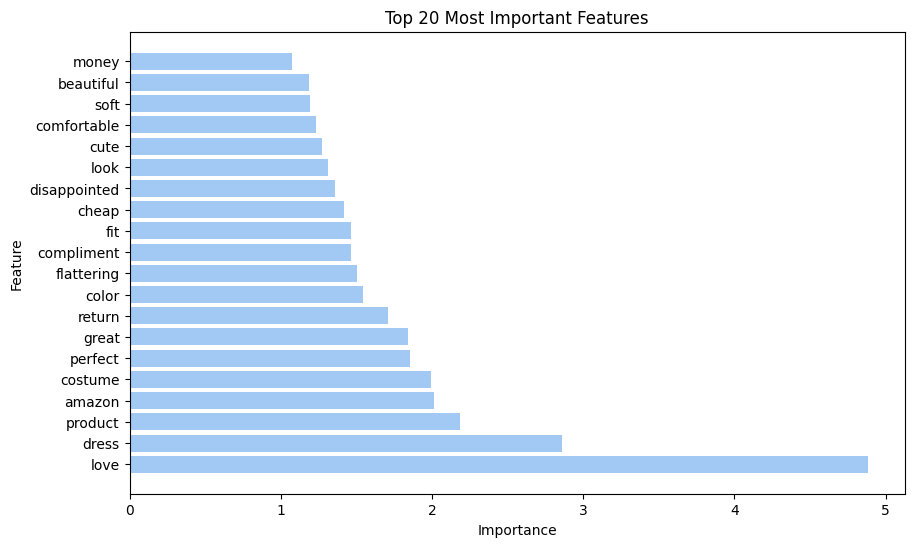

In [189]:
# Extract feature importances from the model
feature_importances_cb = model_cb.feature_importances_

# Create a dataframe with feature names and importances
cb_fi = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_cb})

# Sort the dataframe by importance in descending order
cb_fi = cb_fi.sort_values(by='Importance', ascending=False)

# Plot 20 most important features
plt.figure(figsize=(10, 6))
plt.barh(cb_fi['Feature'][:20], cb_fi['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.savefig('feat_imp_cb.png', bbox_inches='tight')
plt.show()

In [188]:
# Implement gradient boosting on decision trees with default parameters
default_cb = CatBoostClassifier(random_state=42).fit(X_train_vectorized, y_train)
# Obtain predictions on the test set
default_cb_preds = default_cb.predict(X_test_vectorized)

Learning rate set to 0.04625
0:	learn: 0.6739361	total: 72.7ms	remaining: 1m 12s
1:	learn: 0.6550698	total: 144ms	remaining: 1m 11s
2:	learn: 0.6381592	total: 225ms	remaining: 1m 14s
3:	learn: 0.6243176	total: 293ms	remaining: 1m 12s
4:	learn: 0.6118868	total: 358ms	remaining: 1m 11s
5:	learn: 0.6001579	total: 422ms	remaining: 1m 9s
6:	learn: 0.5896216	total: 490ms	remaining: 1m 9s
7:	learn: 0.5799192	total: 560ms	remaining: 1m 9s
8:	learn: 0.5707060	total: 631ms	remaining: 1m 9s
9:	learn: 0.5617212	total: 708ms	remaining: 1m 10s
10:	learn: 0.5538922	total: 778ms	remaining: 1m 9s
11:	learn: 0.5465970	total: 847ms	remaining: 1m 9s
12:	learn: 0.5385387	total: 914ms	remaining: 1m 9s
13:	learn: 0.5294740	total: 985ms	remaining: 1m 9s
14:	learn: 0.5236165	total: 1.06s	remaining: 1m 9s
15:	learn: 0.5173892	total: 1.13s	remaining: 1m 9s
16:	learn: 0.5111734	total: 1.19s	remaining: 1m 9s
17:	learn: 0.5048902	total: 1.27s	remaining: 1m 9s
18:	learn: 0.5000145	total: 1.34s	remaining: 1m 9s
19:	l

162:	learn: 0.3103706	total: 10.9s	remaining: 55.8s
163:	learn: 0.3099619	total: 10.9s	remaining: 55.7s
164:	learn: 0.3095427	total: 11s	remaining: 55.6s
165:	learn: 0.3089691	total: 11.1s	remaining: 55.5s
166:	learn: 0.3085588	total: 11.1s	remaining: 55.5s
167:	learn: 0.3081835	total: 11.2s	remaining: 55.4s
168:	learn: 0.3077513	total: 11.2s	remaining: 55.3s
169:	learn: 0.3073492	total: 11.3s	remaining: 55.2s
170:	learn: 0.3067378	total: 11.4s	remaining: 55.1s
171:	learn: 0.3062960	total: 11.4s	remaining: 55s
172:	learn: 0.3056399	total: 11.5s	remaining: 54.9s
173:	learn: 0.3053286	total: 11.5s	remaining: 54.8s
174:	learn: 0.3049095	total: 11.6s	remaining: 54.7s
175:	learn: 0.3045470	total: 11.7s	remaining: 54.7s
176:	learn: 0.3041525	total: 11.7s	remaining: 54.6s
177:	learn: 0.3037383	total: 11.8s	remaining: 54.5s
178:	learn: 0.3034101	total: 11.9s	remaining: 54.4s
179:	learn: 0.3030119	total: 11.9s	remaining: 54.3s
180:	learn: 0.3023854	total: 12s	remaining: 54.2s
181:	learn: 0.3020

323:	learn: 0.2608235	total: 21.1s	remaining: 44.1s
324:	learn: 0.2606145	total: 21.2s	remaining: 44s
325:	learn: 0.2604109	total: 21.3s	remaining: 44s
326:	learn: 0.2601876	total: 21.3s	remaining: 43.9s
327:	learn: 0.2599776	total: 21.4s	remaining: 43.8s
328:	learn: 0.2597557	total: 21.4s	remaining: 43.7s
329:	learn: 0.2594668	total: 21.5s	remaining: 43.7s
330:	learn: 0.2592520	total: 21.6s	remaining: 43.6s
331:	learn: 0.2590307	total: 21.6s	remaining: 43.5s
332:	learn: 0.2588167	total: 21.7s	remaining: 43.4s
333:	learn: 0.2585979	total: 21.7s	remaining: 43.4s
334:	learn: 0.2583752	total: 21.8s	remaining: 43.3s
335:	learn: 0.2581842	total: 21.9s	remaining: 43.2s
336:	learn: 0.2579366	total: 21.9s	remaining: 43.2s
337:	learn: 0.2577433	total: 22s	remaining: 43.1s
338:	learn: 0.2575271	total: 22.1s	remaining: 43.1s
339:	learn: 0.2573295	total: 22.1s	remaining: 43s
340:	learn: 0.2570524	total: 22.2s	remaining: 42.9s
341:	learn: 0.2567683	total: 22.3s	remaining: 42.9s
342:	learn: 0.256561

483:	learn: 0.2332048	total: 31.5s	remaining: 33.6s
484:	learn: 0.2331026	total: 31.6s	remaining: 33.5s
485:	learn: 0.2329674	total: 31.6s	remaining: 33.4s
486:	learn: 0.2328232	total: 31.7s	remaining: 33.4s
487:	learn: 0.2326670	total: 31.7s	remaining: 33.3s
488:	learn: 0.2324949	total: 31.8s	remaining: 33.2s
489:	learn: 0.2323348	total: 31.9s	remaining: 33.2s
490:	learn: 0.2321775	total: 31.9s	remaining: 33.1s
491:	learn: 0.2320726	total: 32s	remaining: 33s
492:	learn: 0.2319423	total: 32.1s	remaining: 33s
493:	learn: 0.2317953	total: 32.1s	remaining: 32.9s
494:	learn: 0.2316609	total: 32.2s	remaining: 32.8s
495:	learn: 0.2316273	total: 32.2s	remaining: 32.8s
496:	learn: 0.2315090	total: 32.3s	remaining: 32.7s
497:	learn: 0.2313435	total: 32.4s	remaining: 32.6s
498:	learn: 0.2312170	total: 32.4s	remaining: 32.6s
499:	learn: 0.2310700	total: 32.5s	remaining: 32.5s
500:	learn: 0.2309422	total: 32.6s	remaining: 32.4s
501:	learn: 0.2308252	total: 32.6s	remaining: 32.4s
502:	learn: 0.2307

644:	learn: 0.2164932	total: 42s	remaining: 23.1s
645:	learn: 0.2164673	total: 42.1s	remaining: 23.1s
646:	learn: 0.2163523	total: 42.1s	remaining: 23s
647:	learn: 0.2163360	total: 42.2s	remaining: 22.9s
648:	learn: 0.2162051	total: 42.3s	remaining: 22.9s
649:	learn: 0.2161122	total: 42.3s	remaining: 22.8s
650:	learn: 0.2160481	total: 42.4s	remaining: 22.7s
651:	learn: 0.2159572	total: 42.4s	remaining: 22.7s
652:	learn: 0.2158503	total: 42.5s	remaining: 22.6s
653:	learn: 0.2158352	total: 42.6s	remaining: 22.5s
654:	learn: 0.2158196	total: 42.6s	remaining: 22.5s
655:	learn: 0.2157300	total: 42.7s	remaining: 22.4s
656:	learn: 0.2157141	total: 42.8s	remaining: 22.3s
657:	learn: 0.2156134	total: 42.8s	remaining: 22.3s
658:	learn: 0.2154906	total: 42.9s	remaining: 22.2s
659:	learn: 0.2154684	total: 43s	remaining: 22.1s
660:	learn: 0.2153480	total: 43s	remaining: 22.1s
661:	learn: 0.2152401	total: 43.1s	remaining: 22s
662:	learn: 0.2151322	total: 43.1s	remaining: 21.9s
663:	learn: 0.2150229	

806:	learn: 0.2046715	total: 52.5s	remaining: 12.5s
807:	learn: 0.2046586	total: 52.5s	remaining: 12.5s
808:	learn: 0.2045653	total: 52.6s	remaining: 12.4s
809:	learn: 0.2045525	total: 52.7s	remaining: 12.4s
810:	learn: 0.2045398	total: 52.7s	remaining: 12.3s
811:	learn: 0.2045149	total: 52.8s	remaining: 12.2s
812:	learn: 0.2044045	total: 52.9s	remaining: 12.2s
813:	learn: 0.2043810	total: 52.9s	remaining: 12.1s
814:	learn: 0.2043684	total: 53s	remaining: 12s
815:	learn: 0.2042694	total: 53.1s	remaining: 12s
816:	learn: 0.2042569	total: 53.1s	remaining: 11.9s
817:	learn: 0.2041729	total: 53.2s	remaining: 11.8s
818:	learn: 0.2041605	total: 53.2s	remaining: 11.8s
819:	learn: 0.2041402	total: 53.3s	remaining: 11.7s
820:	learn: 0.2040884	total: 53.4s	remaining: 11.6s
821:	learn: 0.2039953	total: 53.4s	remaining: 11.6s
822:	learn: 0.2039826	total: 53.5s	remaining: 11.5s
823:	learn: 0.2039703	total: 53.6s	remaining: 11.4s
824:	learn: 0.2039056	total: 53.6s	remaining: 11.4s
825:	learn: 0.2038

967:	learn: 0.1962348	total: 1m 3s	remaining: 2.08s
968:	learn: 0.1962242	total: 1m 3s	remaining: 2.02s
969:	learn: 0.1961395	total: 1m 3s	remaining: 1.95s
970:	learn: 0.1960843	total: 1m 3s	remaining: 1.89s
971:	learn: 0.1960027	total: 1m 3s	remaining: 1.82s
972:	learn: 0.1959923	total: 1m 3s	remaining: 1.76s
973:	learn: 0.1959413	total: 1m 3s	remaining: 1.69s
974:	learn: 0.1958704	total: 1m 3s	remaining: 1.63s
975:	learn: 0.1958595	total: 1m 3s	remaining: 1.56s
976:	learn: 0.1957861	total: 1m 3s	remaining: 1.5s
977:	learn: 0.1957758	total: 1m 3s	remaining: 1.43s
978:	learn: 0.1957650	total: 1m 3s	remaining: 1.37s
979:	learn: 0.1956881	total: 1m 3s	remaining: 1.3s
980:	learn: 0.1956690	total: 1m 3s	remaining: 1.24s
981:	learn: 0.1956525	total: 1m 4s	remaining: 1.17s
982:	learn: 0.1955831	total: 1m 4s	remaining: 1.11s
983:	learn: 0.1955727	total: 1m 4s	remaining: 1.04s
984:	learn: 0.1954926	total: 1m 4s	remaining: 978ms
985:	learn: 0.1954766	total: 1m 4s	remaining: 913ms
986:	learn: 0.

In [190]:
# Check the accuracy of default gradient boosting on decision trees
accuracy_default_cb = accuracy_score(y_test, default_cb_preds)
print(f'Accuracy: {accuracy_default_cb:.2f}')

# See the classification report for default gradient boosting on decision trees
report_default_cb = classification_report(y_test, default_cb_preds)
print(report_default_cb)

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1889
           1       0.89      0.92      0.90      1854

    accuracy                           0.90      3743
   macro avg       0.90      0.90      0.90      3743
weighted avg       0.90      0.90      0.90      3743



In [191]:
# See the confusion matrix for default gradient boosting on decision trees
cm_default_cb = confusion_matrix(y_test, default_cb_preds)
print(cm_default_cb)

[[1687  202]
 [ 157 1697]]


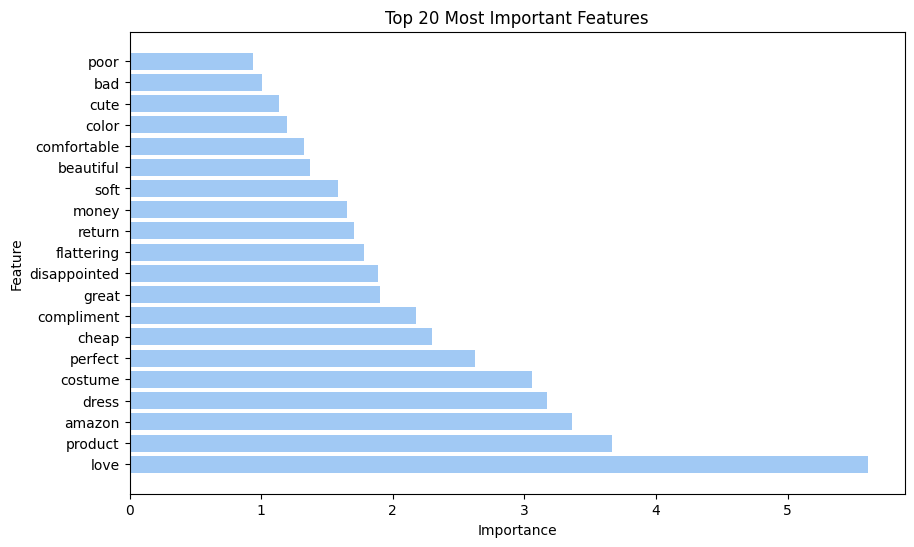

In [192]:
# Extract feature importances from the model
feature_importances_default = default_cb.feature_importances_

# Create a dataframe with feature names and importances
default_cb_fi = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_default})

# Sort the dataframe by importance in descending order
default_cb_fi = default_cb_fi.sort_values(by='Importance', ascending=False)

# Plot 20 most important features
plt.figure(figsize=(10, 6))
plt.barh(default_cb_fi['Feature'][:20], default_cb_fi['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.savefig('feat_imp_cb_default.png', bbox_inches='tight')
plt.show()

In [193]:
# Implement random forest classifier
rf = RandomForestClassifier(random_state=16)

# Create a grid for random search specifying number of trees, functions measuring the quality of a split,
# tree depth, maximal number of features at each split
param_dist = {
    'n_estimators': randint(50, 500), 
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'max_depth': randint(1,15), 
    'max_features': ['sqrt', 'log2'] 
}

# Initialize randomized search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5, n_iter=10, n_jobs=-1)
random_search.fit(X_train_vectorized, y_train)

# Save the best parameters
best_params = random_search.best_params_

In [194]:
# Implement random forest classifier with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=16)
best_rf.fit(X_train_vectorized, y_train)

# Obtain predictions on the test set
predictions_rf = best_rf.predict(X_test_vectorized)

In [195]:
# Check the accuracy of random forest classifier
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'Accuracy: {accuracy_rf:.2f}')
# See the classification report for random forest classifier
report_rf = classification_report(y_test, predictions_rf)
print(report_rf)

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1889
           1       0.86      0.92      0.89      1854

    accuracy                           0.89      3743
   macro avg       0.89      0.89      0.89      3743
weighted avg       0.89      0.89      0.89      3743



In [196]:
# See the confusion matrix for random forest classifier
cm_rf = confusion_matrix(y_test, predictions_rf)
print(cm_rf)

[[1620  269]
 [ 153 1701]]


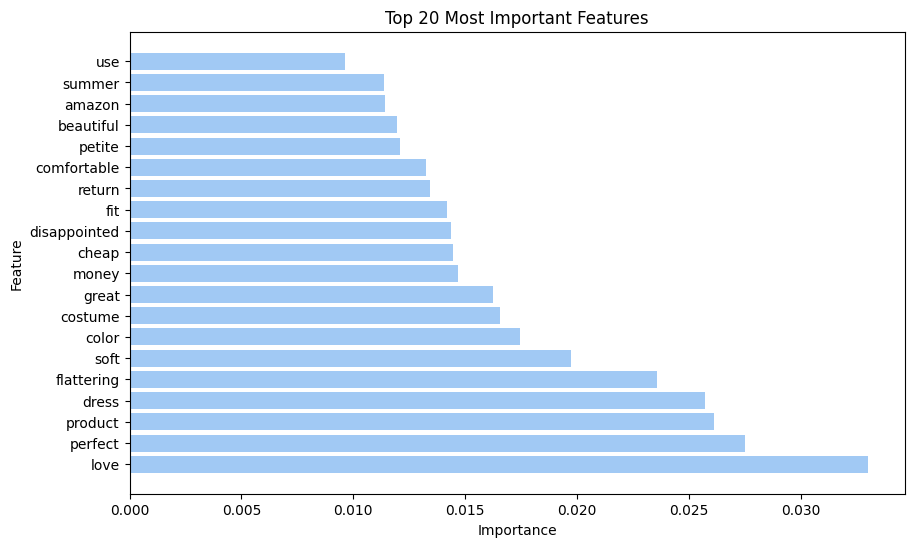

In [197]:
# Extract feature importances from random forest classifier
feature_importances_rf = best_rf.feature_importances_

# Create a dataframe with feature names and importances
rf_fi = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})

# Sort the dataframe by importance in descending order
rf_fi = rf_fi.sort_values(by='Importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(10, 6))
plt.barh(rf_fi['Feature'][:20], rf_fi['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.savefig('feat_imp_rf.png', bbox_inches='tight')
plt.show()

In [198]:
# Implement random forest classifier with default parameters
rf.fit(X_train_vectorized, y_train)

# Obtain predictions on the test set
predictions_rf_default = rf.predict(X_test_vectorized) 

In [199]:
# Check the accuracy of default random forest classifier
accuracy_rf_default = accuracy_score(y_test, predictions_rf_default)
print(f'Accuracy: {accuracy_rf_default:.2f}')

# See the classification report for default random forest classifier
report_rf_default = classification_report(y_test, predictions_rf_default)
print(report_rf_default)

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1889
           1       0.85      0.96      0.90      1854

    accuracy                           0.90      3743
   macro avg       0.90      0.90      0.90      3743
weighted avg       0.91      0.90      0.90      3743



In [200]:
# See the confusion matrix for default random forest classifier
cm_rf_default = confusion_matrix(y_test, predictions_rf_default)
print(cm_rf_default)

[[1585  304]
 [  74 1780]]


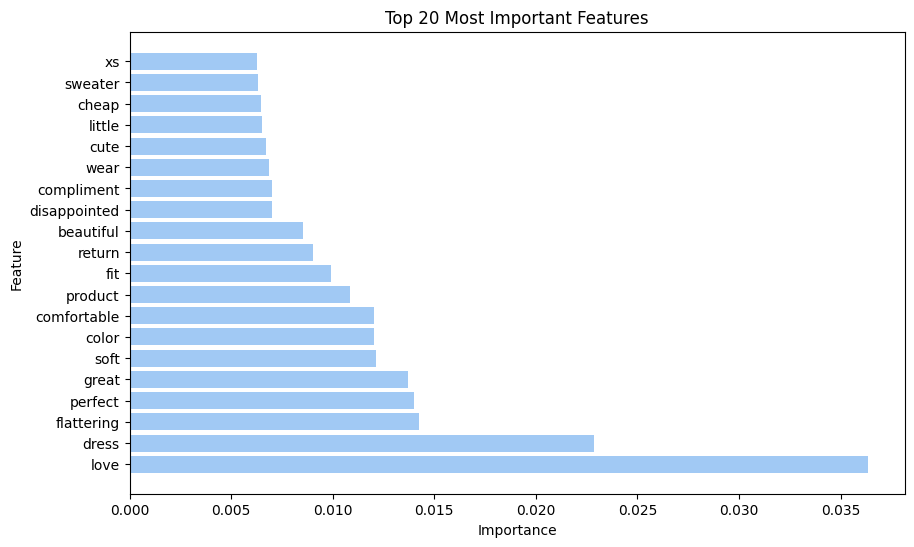

In [201]:
# Extract feature importances from default random forest classifier
feature_importances_rf_default = rf.feature_importances_

# Create a dataframe with feature names and importances
rf_default_fi = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf_default})

# Sort the dataframe by importance in descending order
rf_default_fi = rf_default_fi.sort_values(by='Importance', ascending=False)


# Plot the top 20 most important features
plt.figure(figsize=(10, 6))
plt.barh(rf_default_fi['Feature'][:20], rf_default_fi['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features')
plt.savefig('feat_imp_rf_default.png', bbox_inches='tight')
plt.show()

In [211]:
# Implement support vector classifier
svc = SVC(random_state=16).fit(X_train_vectorized, y_train)

# Obtain predictions on the test set
predictions_svc = svc.predict(X_test_vectorized)

In [212]:
# Check the accuracy of support vector classifier
accuracy_svc = accuracy_score(y_test, predictions_svc)
print(f'Accuracy: {accuracy_svc:.2f}')

# See the classification report for support vector classifier
report_svc = classification_report(y_test, predictions_svc)
print(report_svc)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1889
           1       0.90      0.93      0.91      1854

    accuracy                           0.91      3743
   macro avg       0.91      0.91      0.91      3743
weighted avg       0.91      0.91      0.91      3743



In [213]:
# See the confusion matrix for support vector classifier
cm_svc = confusion_matrix(y_test, predictions_svc)
print(cm_svc)

[[1698  191]
 [ 134 1720]]


In [219]:
# Split the train set into train and validation sets
train_set, dev_set, train_labels, dev_labels = train_test_split(
    X_train, y_train, test_size=0.15, random_state=16)

In [220]:
'''
Convert current train, evaluation and test data into format for training textcat model
IN: data, labels
OUT: list of dictionaries with appropriate structure
'''
def reformat(texts, labels):
    data = {}

    for i, (text, sentiment) in enumerate(zip(texts, labels)):
        if sentiment == 0:
            data[i] = {'text': text, 'label': {'positive': 0.0, 'negative': 1.0}}
        else:
            data[i] = {'text': text, 'label': {'positive': 1.0, 'negative': 0.0}}

    reformatted_data = list(data.values())
    return reformatted_data

In [221]:
annot_data = reformat(train_set, train_labels)
dev_data = reformat(dev_set, dev_labels)
test_data = reformat(X_test, y_test)

In [222]:
# Print the first 5 instances of training data
annot_data[:5]

[{'text': 'find dress delightful wear numerous time long girl fit complaint wind blow tend fly open clasp breast fabric light comfortable wear costa rica feel refreshing lb cup suggest large size girl small fit',
  'label': {'positive': 1.0, 'negative': 0.0}},
 {'text': 'purchase store today normally small try x small try regular size x small fit perfectly lb wide hip petite dress fit slightly hug like thing draw attention outward tug stretchy material dress fit perfectly sweater dress tend bulky make sense size definitely nice addition closet',
  'label': {'positive': 1.0, 'negative': 0.0}},
 {'text': 'ideal easy breezy sweater throw legging feel like comfy cozy stylish love',
  'label': {'positive': 1.0, 'negative': 0.0}},
 {'text': 'see sunglass think okay pretty cheap order get completely wrong think awesome start flimsy uncomfortable dark thing bad day mirror lense start come big giant splotch lense mirror recommend save buck cost include shipping buy candy bar satisfaction',
  'l

In [223]:
# Initialize blank English model
nlp = spacy.blank("en")

'''
Convert train, evaluation and test sets into DocBin() format
IN: data, path to store output file in
OUT: nothing
''' 
def convert(data, output_path):
    db = DocBin()
    for line in data:
        doc = nlp.make_doc(line['text'])
        doc.cats = line['label']
        db.add(doc)
    db.to_disk(output_path)

    
# Save train, evaluation and test sets
convert(annot_data, r"C:\Users\Anna\Desktop\1 term 2 year\train.spacy")
convert(dev_data, r"C:\Users\Anna\Desktop\1 term 2 year\dev.spacy")
convert(test_data, r"C:\Users\Anna\Desktop\1 term 2 year\test.spacy")

In [224]:
# Load TextCat model
!python -m spacy init fill-config base_config.cfg config.cfg

[+] Auto-filled config with all values
[+] Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [225]:
# Train and evaluate TextCat on train and dev sets
!python -m spacy train config.cfg --paths.train "C:\Users\Anna\Desktop\1 term 2 year\train.spacy" --paths.dev "C:\Users\Anna\Desktop\1 term 2 year\dev.spacy" --output model --verbose

[+] Created output directory: model
[i] Saving to output directory: model
[i] Using CPU
[i] To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['textcat']
[i] Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.25       60.12    0.60
  0     200         33.94       87.16    0.87
  0     400         20.82       88.89    0.89
  0     600         18.32       90.04    0.90
  0     800         15.11       90.00    0.90
  0    1000         14.94       90.40    0.90
  0    1200         14.10       90.82    0.91
  0    1400         13.23       90.87    0.91
  0    1600         13.18       91.09    0.91
  0    1800         14.34       91.45    0.91
  0    2000         13.49       91.63    0.92
  1    2200         11.9

[2024-02-03 17:29:50,700] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
[2024-02-03 17:29:52,627] [INFO] Set up nlp object from config
[2024-02-03 17:29:52,635] [DEBUG] Loading corpus from path: C:\Users\Anna\Desktop\1 term 2 year\dev.spacy
[2024-02-03 17:29:52,636] [DEBUG] Loading corpus from path: C:\Users\Anna\Desktop\1 term 2 year\train.spacy
[2024-02-03 17:29:52,636] [INFO] Pipeline: ['textcat']
[2024-02-03 17:29:52,638] [INFO] Created vocabulary
[2024-02-03 17:29:52,638] [INFO] Finished initializing nlp object
[2024-02-03 17:29:59,711] [INFO] Initialized pipeline components: ['textcat']
[2024-02-03 17:29:59,729] [DEBUG] Loading corpus from path: C:\Users\Anna\Desktop\1 term 2 year\dev.spacy
[2024-02-03 17:29:59,730] [DEBUG] Loading corpus from path: C:\Users\Anna\Desktop\1 term 2 year\train.spacy


In [226]:
# Test the model on test data
!python -m spacy evaluate ./model/model-best/ "C:\Users\Anna\Desktop\1 term 2 year\test.spacy"

[i] Using CPU
[i] To switch to GPU 0, use the option: --gpu-id 0

================================== Results ==================================

TOK                 100.00
TEXTCAT (macro F)   91.96 
SPEED               565523


=========================== Textcat F (per label) ===========================

               P       R       F
positive   90.93   93.04   91.98
negative   93.01   90.89   91.94


======================== Textcat ROC AUC (per label) ========================

           ROC AUC
positive      0.97
negative      0.97



In [227]:
# Load the trained TextCat model
trained_tc = spacy.load('model/model-best/')

In [228]:
# Convert Series into lists
test_texts = X_test.tolist()
true_labels = y_test.tolist()
# Initialise empty list to store labels in
predicted_labels = []

# Generate predictions using the trained TextCat model
predictions_tc = [trained_tc(text).cats for text in test_texts]
# Convert probabilities into class labels
for prediction in predictions_tc:
    if prediction['positive'] > 0.5:
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)

In [229]:
# See the confusion matrix for trained TextCat model
cm_tc = confusion_matrix(true_labels, predicted_labels)
print(cm_tc)

[[1717  172]
 [ 129 1725]]


In [230]:
# Compute the accuracy
accuracy_tc = (1686 + 1755) / (1686 + 1755 + 159 + 124)
round(accuracy_tc, 2)

0.92

In [231]:
# Split the raw text data into train and test sets
train_raw, test_raw, y_train_raw, y_test_raw = train_test_split(
    df['text'], df['sentiment'], test_size=0.1, random_state=16)

In [232]:
# Split the raw train set into train and validation sets
train_raw, dev_raw, y_train_raw, y_dev_raw = train_test_split(
    train_raw, y_train_raw, test_size=0.15, random_state=16)

In [233]:
# Reformat raw data
raw_train_data = reformat(train_raw, y_train_raw)
raw_dev_data = reformat(dev_raw, y_dev_raw)
raw_test_data = reformat(test_raw, y_test_raw)

In [234]:
# Print the first 5 instances of raw training data
raw_train_data[:5]

[{'text': 'I found this dress delightful! i have worn it numerous times and though quite long (for some girls) fits me well. my only complaint is that if the wind blows it tends to fly open as there is only on clasp at the breast. the fabric is light and comfortable, i wore it in costa rica and it felt refreshing. i am 5\'9", 155 lbs and a 34a cup; i would suggest a larger size for girls as the small fit me very well.',
  'label': {'positive': 1.0, 'negative': 0.0}},
 {'text': 'Purchased this in-store today. i\'m normally a small, but tried on x-small before trying on my regular size. the x-small fit perfectly. i\'m 5"5, 135 lbs, with wide hips and petite derriã¨re. the dress fit well, slightly hugging my bottom. while i don\'t like things that draw attention to my bottom, with an outward tug or two of the stretchy material of the dress, it fit perfectly. sweater dresses tend to be bulky, so it makes sense to down size. definitely a nice addition to my closet.',
  'label': {'positive':

In [235]:
# Save raw train, evaluation and test sets
convert(raw_train_data, r"C:\Users\Anna\Desktop\1 term 2 year\raw_train.spacy")
convert(raw_dev_data, r"C:\Users\Anna\Desktop\1 term 2 year\raw_dev.spacy")
convert(raw_test_data, r"C:\Users\Anna\Desktop\1 term 2 year\raw_test.spacy")

In [236]:
# Train and evaluate TextCat on raw train and dev sets
!python -m spacy train config.cfg --paths.train "C:\Users\Anna\Desktop\1 term 2 year\raw_train.spacy" --paths.dev "C:\Users\Anna\Desktop\1 term 2 year\raw_dev.spacy" --output model_raw --verbose

[2024-02-03 17:33:30,077] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
[2024-02-03 17:33:32,300] [INFO] Set up nlp object from config
[2024-02-03 17:33:32,310] [DEBUG] Loading corpus from path: C:\Users\Anna\Desktop\1 term 2 year\raw_dev.spacy
[2024-02-03 17:33:32,312] [DEBUG] Loading corpus from path: C:\Users\Anna\Desktop\1 term 2 year\raw_train.spacy
[2024-02-03 17:33:32,312] [INFO] Pipeline: ['textcat']
[2024-02-03 17:33:32,314] [INFO] Created vocabulary
[2024-02-03 17:33:32,314] [INFO] Finished initializing nlp object
[2024-02-03 17:33:49,831] [INFO] Initialized pipeline components: ['textcat']
[2024-02-03 17:33:49,840] [DEBUG] Loading corpus from path: C:\Users\Anna\Desktop\1 term 2 year\raw_dev.spacy
[2024-02-03 17:33:49,841] [DEBUG] Loading corpus from path: C:\Users\Anna\Desktop\1 term 2 year\raw_train.spacy


[+] Created output directory: model_raw
[i] Saving to output directory: model_raw
[i] Using CPU
[i] To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['textcat']
[i] Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.25       33.10    0.33
  0     200         29.22       87.86    0.88
  0     400         18.67       88.74    0.89
  0     600         16.55       89.01    0.89
  0     800         20.71       89.37    0.89
  0    1000         12.94       90.03    0.90
  0    1200         14.71       90.41    0.90
  0    1400         13.84       90.79    0.91
  0    1600         12.23       91.13    0.91
  0    1800         12.45       91.23    0.91
  0    2000         11.61       91.64    0.92
  0    2200     

In [237]:
# Test the model on raw test data
!python -m spacy evaluate ./model_raw/model-best/ "C:\Users\Anna\Desktop\1 term 2 year\raw_test.spacy"

[i] Using CPU
[i] To switch to GPU 0, use the option: --gpu-id 0

================================== Results ==================================

TOK                 100.00
TEXTCAT (macro F)   93.59 
SPEED               677446


=========================== Textcat F (per label) ===========================

               P       R       F
positive   92.52   94.71   93.60
negative   94.69   92.48   93.57


======================== Textcat ROC AUC (per label) ========================

           ROC AUC
positive      0.98
negative      0.98



In [238]:
# Load the TextCat model trained on raw data
trained_raw_tc = spacy.load('model_raw/model-best/')

In [239]:
# Convert Series into lists
raw_test_texts = test_raw.tolist()
raw_true_labels = y_test_raw.tolist()
# Initialise empty list to store labels in
predicted_labels_raw = []

# Generate predictions using the TextCat model trained on raw data
predictions_tc_raw = [trained_raw_tc(text).cats for text in raw_test_texts]
# Convert probabilities into class labels
for prediction in predictions_tc_raw:
    if prediction['positive'] > 0.5:
        predicted_labels_raw.append(1)
    else:
        predicted_labels_raw.append(0)

In [240]:
# See the confusion matrix for the TextCat model trained on raw data
cm_tc_raw = confusion_matrix(raw_true_labels, predicted_labels_raw)
print(cm_tc_raw)

[[1747  142]
 [  98 1756]]


In [241]:
# Compute the accuracy
accuracy_tc_raw = (1685 + 1805) / (1685 + 1805 + 160 + 74)
round(accuracy_tc_raw, 2)

0.94